In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
pd.options.display.max_columns=999
pd.options.display.max_rows=999
pd.options.display.max_colwidth=150

In [3]:
!dir "../data/processed_raw/sentinel_bands"

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: CAD2-CEC1

 Directorio de C:\Users\camil\codes\tesis\data\processed_raw\sentinel_bands

30/04/2021  12:28 a.ÿm.    <DIR>          .
30/04/2021  12:28 a.ÿm.    <DIR>          ..
30/04/2021  07:59 a.ÿm.    <DIR>          .ipynb_checkpoints
25/04/2021  10:38 p.ÿm.    <DIR>          PixEx
30/04/2021  12:18 a.ÿm.         2.886.387 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_processed.csv
30/04/2021  12:28 a.ÿm.         2.886.387 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_PROCESSED_SOIL.csv
30/04/2021  12:28 a.ÿm.            80.409 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_PROCESSED_VEGETATION.csv
               3 archivos      5.853.183 bytes
               4 dirs  586.434.207.744 bytes libres


In [4]:
sat_sentinel_data_unprocessed = r'../data/processed_raw/sentinel_bands/S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_processed.csv'
df_temp = pd.read_csv(sat_sentinel_data_unprocessed, sep=';')
print(df_temp.shape)
df_temp.head()

(653, 325)


X     Y        lon       lat departamento municipio   cultivo  \
0  2071  3162 -73.513627  5.914703       BOYACA     TOGUI  PRADERAS   
1  2141  3162 -73.507327  5.914703       BOYACA     TOGUI   PRADERA   
2  2211  3162 -73.501027  5.914703       BOYACA     TOGUI  PRADERAS   
3  2002  3092 -73.519927  5.921003       BOYACA     TOGUI   PRADERA   
4  2071  3092 -73.513627  5.921003       BOYACA     TOGUI      CAÑA   

  topografia    pH         OM        Ca        Mg         K        Na  \
0  PENDIENTE  4.70   3.011138  0.481978  0.213796  0.171674  0.146597   
1   ONDULADO  5.00  12.271341  1.287727  0.418722  0.421729  0.201236   
2  PENDIENTE  5.07   5.326189  3.592768  0.533857  0.213425  0.176261   
3  PENDIENTE  4.55   7.198116  1.198907  0.452394  0.428312  0.220661   
4  PENDIENTE  4.44   4.643188  2.353349  0.526435  0.336426  0.173677   

        400     408.5       417     425.5       434     442.5       451  \
0  0.864947  0.875096  0.874840  0.865835  0.851385  0.838967  0.833089   
1  1.069311  1.083294  1.088555  1.088504  1.085334  1.083149  1.082783   
2  0.877127  0.886268  0.886303  0.879617  0.869511  0.860241  0.855032   
3  1.052266  1.061579  1.063576  1.059229  1.051809  1.045210  1.041014   
4  0.908724  0.922303  0.925949  0.922642  0.915262  0.907996  0.903691   

      459.5       468     476.5       485     493.5       502     510.5  \
0  0.831834  0.829409  0.821083  0.804732  0.781411  0.754565  0.726855   
1  1.083112  1.081964  1.076658  1.066428  1.051789  1.034754  1.016701   
2  0.852350  0.848925  0.842054  0.829852  0.812868  0.793225  0.772665   
3  1.038498  1.035626  1.029633  1.018893  1.003829  0.986159  0.967215   
4  0.901126  0.897690  0.890796  0.878603  0.861210  0.840475  0.817862   

        519     527.5       536     544.5       553     561.5       570  \
0  0.699120  0.671711  0.645430  0.620700  0.597969  0.578164  0.561325   
1  0.998321  0.980104  0.962534  0.945646  0.929548  0.914562  0.900663   
2  0.751851  0.731388  0.712039  0.693998  0.677440  0.662717  0.649682   
3  0.947658  0.928154  0.909437  0.891614  0.874809  0.859553  0.845837   
4  0.794340  0.770628  0.747546  0.725419  0.704433  0.685423  0.668302   

      578.5       587     595.5       604     612.5       621     629.5  \
0  0.547276  0.535821  0.526254  0.517484  0.508804  0.500029  0.490974   
1  0.887977  0.876891  0.866976  0.856959  0.846021  0.834071  0.821366   
2  0.638070  0.627858  0.618654  0.609739  0.600563  0.591058  0.581309   
3  0.833644  0.823037  0.813537  0.804248  0.794578  0.784506  0.774178   
4  0.652799  0.638854  0.626298  0.614638  0.603423  0.592386  0.581148   

        638     646.5       655     663.5       672     680.5       689  \
0  0.481710  0.472552  0.463779  0.455267  0.446919  0.438797  0.430990   
1  0.808295  0.795461  0.783328  0.771584  0.759787  0.748108  0.736988   
2  0.571450  0.561756  0.552484  0.543373  0.534041  0.524660  0.515670   
3  0.763846  0.753718  0.744099  0.734745  0.725192  0.715618  0.706465   
4  0.569675  0.558338  0.547423  0.536721  0.526042  0.515504  0.505360   

      697.5       706     714.5       723     731.5       740     748.5  \
0  0.423477  0.416262  0.409397  0.402926  0.396867  0.391249  0.386078   
1  0.726427  0.716299  0.706607  0.697281  0.688294  0.679613  0.671239   
2  0.507153  0.499010  0.491231  0.483808  0.476694  0.469876  0.463342   
3  0.697826  0.689650  0.681940  0.674678  0.667789  0.661245  0.655072   
4  0.495637  0.486326  0.477467  0.469093  0.461192  0.453767  0.446832   

        757     765.5       774     782.5       791     799.5       808  \
0  0.381368  0.377009  0.372938  0.369263  0.365900  0.362648  0.359597   
1  0.663101  0.655054  0.647190  0.639686  0.632433  0.625190  0.618099   
2  0.457099  0.451096  0.445325  0.439916  0.434844  0.429944  0.425345   
3  0.649251  0.643567  0.638045  0.632857  0.627918  0.623029  0.618234   
4  0.440348  0.434165  0.428308  0.422947  0.417941  0.4130

In [5]:
df_temp[df_temp['quality_classification'] == 'NOT_VEGETATION'][['pH', 'OM', 'Ca', 'Mg', 'K', 'Na']]

pH         OM         Ca        Mg         K        Na
88   6.65   9.539340  34.552011  1.283865  0.319940  0.088900
137  4.84   3.277188   5.268932  0.860074  0.236551  0.218843
152  6.81   4.491411  22.106216  1.298166  0.276951  0.329939
251  6.56   3.996831  17.073114  1.058844  0.119232  0.161812
271  4.42   6.835504   1.179035  0.132695  0.169423  0.108512
291  6.01   8.122747  21.061016  0.877271  0.395283  0.518735
293  5.07   6.591004   1.015667  0.683207  0.717473  0.482947
306  6.83  10.804155  11.566047  2.540575  0.719893  0.440652
350  4.55   7.414472   1.834701  0.477195  0.212412  0.604856
400  4.59   5.388757   1.682642  0.685199  0.219220  0.216546
429  7.72   9.906719  31.919796  1.715440  1.167674  0.167553
444  6.97   7.885051   2.650880  1.514316  0.576916  0.263913
461  4.61   4.535881   1.853585  0.385413  0.235538  0.089700
491  7.29   6.914197  19.941816  1.639227  0.683094  0.073700
505  7.56   7.966686  35.124017  1.032233  0.774810  0.067400
593  5.83  12.905376  19.579180  1.957839  0.399784  1.007042
597  5.05   4.376798   1.730510  0.679768  0.182421  0.105546
599  5.22   3.944377   2.673606  0.487876  0.147085  0.132052
605  5.36   4.064494   4.595809  0.868944  0.176625  0.170711

In [6]:
sat_sentinel_data = r'../data/interim_raw/sentinel2/satellite_sentinel2.csv'
sat_sim_sentinel_data = r'../data/interim_raw/sentinel2_simulated/satellite_sentinel2_simulated.csv'

In [7]:
df_sentinel = pd.read_csv(sat_sentinel_data, sep=';')
print(df_sentinel.shape)
df_sentinel.head()

(607, 18)


pH         OM        Ca        Mg         K        Na  B1_442.3  \
0  4.70   3.011138  0.481978  0.213796  0.171674  0.146597    0.0034   
1  5.00  12.271341  1.287727  0.418722  0.421729  0.201236    0.0001   
2  5.07   5.326189  3.592768  0.533857  0.213425  0.176261    0.0029   
3  4.55   7.198116  1.198907  0.452394  0.428312  0.220661    0.0063   
4  4.44   4.643188  2.353349  0.526435  0.336426  0.173677    0.0010   

   B2_492.1  B3_559.0  B4_665.0  B5_703.8  B6_739.1  B7_779.7  B8_833.0  \
0    0.0099    0.0324    0.0249    0.0632    0.1954    0.2388    0.2854   
1    0.0109    0.0413    0.0331    0.0947    0.2397    0.2881    0.2968   
2    0.0114    0.0404    0.0312    0.0795    0.2079    0.2486    0.2629   
3    0.0146    0.0531    0.0318    0.0891    0.2742    0.3251    0.3946   
4    0.0020    0.0178    0.0157    0.0476    0.1580    0.1912    0.1848   

   B8A_864.0  B9_943.2  B11_1610.4  B12_2202.4  
0     0.2777    0.2969      0.1356      0.0579  
1     0.3334    0.3025      0.1763      0.0828  
2     0.2728    0.2971      0.1621      0.0833  
3     0.3670    0.2933      0.1736      0.0795  
4     0.2066    0.2519      0.0977      0.0480

In [8]:
df_sim_sentinel = pd.read_csv(sat_sim_sentinel_data, sep=';')
print(df_sim_sentinel.shape)
df_sim_sentinel.head()

(653, 19)


pH         OM        Ca        Mg         K        Na  B1_442.3  \
0  4.70   3.011138  0.481978  0.213796  0.171674  0.146597  0.841147   
1  5.00  12.271341  1.287727  0.418722  0.421729  0.201236  1.083756   
2  5.07   5.326189  3.592768  0.533857  0.213425  0.176261  0.861595   
3  4.55   7.198116  1.198907  0.452394  0.428312  0.220661  1.046011   
4  4.44   4.643188  2.353349  0.526435  0.336426  0.173677  0.908983   

   B2_492.1  B3_559.0  B4_665.0  B5_703.8  B6_739.1  B7_779.7  B8_833.0  \
0  0.773882  0.589539  0.455322  0.419869  0.391249  0.371100  0.354143   
1  1.046659  0.922605  0.771566  0.721363  0.679613  0.643438  0.600894   
2  0.807348  0.670959  0.543299  0.503081  0.469876  0.442621  0.416026   
3  0.998430  0.867953  0.734678  0.693738  0.661245  0.635451  0.607402   
4  0.854425  0.695894  0.536729  0.490981  0.453767  0.425628  0.399016   

   B8A_864.0  B9_943.2  B10_1376.9  B11_1610.4  B12_2202.4  
0   0.346971  0.329421    0.247432    0.233701    0.312968  
1   0.579853  0.531693    0.369908    0.345258    0.427153  
2   0.404120  0.377288    0.271587    0.251068    0.299480  
3   0.593978  0.563215    0.451539    0.433071    0.472209  
4   0.386989  0.361303    0.262104    0.247129    0.293715

In [9]:
df_merge = pd.merge(
    df_sentinel.round(6), df_sim_sentinel.round(6),
    on=['pH', 'OM', 'Ca', 'Mg', 'K', 'Na'],
    how='left', suffixes=['_sen', '_simsen']
)

In [10]:
df_merge.columns

Index(['pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1_442.3_sen', 'B2_492.1_sen',
       'B3_559.0_sen', 'B4_665.0_sen', 'B5_703.8_sen', 'B6_739.1_sen',
       'B7_779.7_sen', 'B8_833.0_sen', 'B8A_864.0_sen', 'B9_943.2_sen',
       'B11_1610.4_sen', 'B12_2202.4_sen', 'B1_442.3_simsen',
       'B2_492.1_simsen', 'B3_559.0_simsen', 'B4_665.0_simsen',
       'B5_703.8_simsen', 'B6_739.1_simsen', 'B7_779.7_simsen',
       'B8_833.0_simsen', 'B8A_864.0_simsen', 'B9_943.2_simsen', 'B10_1376.9',
       'B11_1610.4_simsen', 'B12_2202.4_simsen'],
      dtype='object')

In [11]:
df_merge.head(10)

pH         OM         Ca        Mg         K        Na  B1_442.3_sen  \
0  4.70   3.011138   0.481978  0.213796  0.171674  0.146597        0.0034   
1  5.00  12.271341   1.287727  0.418722  0.421729  0.201236        0.0001   
2  5.07   5.326189   3.592768  0.533857  0.213425  0.176261        0.0029   
3  4.55   7.198116   1.198907  0.452394  0.428312  0.220661        0.0063   
4  4.44   4.643188   2.353349  0.526435  0.336426  0.173677        0.0010   
5  6.28   4.415522  12.635731  0.875099  0.240546  0.230039        0.0092   
6  6.26   4.668485  13.176117  0.722310  0.305985  0.154539        0.0119   
7  4.69   8.108783   1.606228  0.475566  0.530551  0.132435        0.0087   
8  4.96   8.842376   4.406531  0.582374  0.450707  0.229273        0.0206   
9  4.66   3.125410   2.570184  0.470678  0.281509  0.148607        0.0046   

   B2_492.1_sen  B3_559.0_sen  B4_665.0_sen  B5_703.8_sen  B6_739.1_sen  \
0        0.0099        0.0324        0.0249        0.0632        0.1954   
1        0.0109        0.0413        0.0331        0.0947        0.2397   
2        0.0114        0.0404        0.0312        0.0795        0.2079   
3        0.0146        0.0531        0.0318        0.0891        0.2742   
4        0.0020        0.0178        0.0157        0.0476        0.1580   
5        0.0165        0.0431        0.0362        0.0770        0.1462   
6        0.0253        0.0623        0.0570        0.1161        0.2396   
7        0.0174        0.0499        0.0342        0.0864        0.2314   
8        0.0231        0.0532        0.0431        0.1008        0.2307   
9        0.0172        0.0344        0.0380        0.0952        0.1775   

   B7_779.7_sen  B8_833.0_sen  B8A_864.0_sen  B9_943.2_sen  B11_1610.4_sen  \
0        0.2388        0.2854         0.2777        0.2969          0.1356   
1        0.2881        0.2968         0.3334        0.3025          0.1763   
2        0.2486        0.2629         0.2728        0.2971          0.1621   
3        0.3251        0.3946         0.3670        0.2933          0.1736   
4        0.1912        0.1848         0.2066        0.2519          0.0977   
5        0.1836        0.2464         0.1911        0.2503          0.1416   
6        0.2699        0.2849         0.3139        0.3378          0.2501   
7        0.2791        0.3369         0.3077        0.2781          0.1739   
8        0.2754        0.2940         0.3074        0.3111          0.2229   
9        0.2285        0.1987         0.2526        0.2537          0.1677   

   B12_2202.4_sen  B1_442.3_simsen  B2_492.1_simsen  B3_559.0_simsen  \
0          0.0579         0.841147         0.773882         0.589539   
1          0.0828         1.083756         1.046659         0.922605   
2          0.0833         0.861595         0.807348         0.670959   
3          0.0795         1.046011         0.998430         0.867953   
4          0.0480         0.908983         0.854425         0.695894   
5          0.0829         0.796024         0.745113         0.626912   
6          0.1344         0.897109         0.838037         0.669009   
7          0.0837         1.001609         0.953105         0.800089   
8          0.1157         0.980318         0.939183         0.803231   
9          0.0916         0.927401         0.877729         0.726872   

   B4_665.0_simsen  B5_703.8_simsen  B6_739.1_simsen  B7_779.7_simsen  \
0         0.455322         0.419869         0.391249         0.371100   
1         0.771566         0.721363         0.679613         0.643438   
2         0.543299         0.503081         0.469876         0.442621   
3         0.734678         0.693738         0.661245         0.635451   
4         0.536729         0.490981         0.453767         0.425628   
5         0.521279         0.488371         0.460497         0.438149   
6         0.542549         0.503738         0.470745         0.447708   
7         0.649879         0.601558         0.561918         0.530841   
8         0.651390    

In [55]:
df_merge.shape

(607, 43)

In [12]:
df_sentinel.describe()

pH          OM          Ca          Mg           K          Na  \
count  607.000000  607.000000  607.000000  607.000000  607.000000  607.000000   
mean     5.737068    6.731000   11.121205    0.928782    0.315210    0.260423   
std      1.162935    2.947969   13.602598    0.680463    0.214787    0.224106   
min      4.080000    0.686549    0.171492    0.006336    0.018343    0.005650   
25%      4.765000    4.545622    2.116038    0.401706    0.191705    0.113967   
50%      5.370000    6.250623    4.674529    0.757067    0.260296    0.188605   
75%      6.585000    8.215144   16.294208    1.283141    0.356120    0.313241   
max      8.410000   19.461802   93.542837    5.928189    2.003028    1.409322   

         B1_442.3    B2_492.1    B3_559.0    B4_665.0    B5_703.8    B6_739.1  \
count  607.000000  607.000000  607.000000  607.000000  607.000000  607.000000   
mean     0.021620    0.027451    0.055036    0.046115    0.091539    0.219164   
std      0.022067    0.018812    0.020922    0.025433    0.026541    0.040572   
min      0.000100    0.000700    0.014800    0.013700    0.032300    0.066100   
25%      0.010150    0.016500    0.042600    0.030100    0.075300    0.194550   
50%      0.017200    0.024000    0.051600    0.039500    0.088000    0.217900   
75%      0.026400    0.032050    0.062550    0.052500    0.103700    0.244850   
max      0.240500    0.215900    0.199600    0.191700    0.255700    0.365500   

         B7_779.7    B8_833.0   B8A_864.0    B9_943.2  B11_1610.4  B12_2202.4  
count  607.000000  607.000000  607.000000  607.000000  607.000000  607.000000  
mean     0.263474    0.277531    0.293859    0.292674    0.183273    0.095430  
std      0.048696    0.055657    0.053503    0.050529    0.051270    0.038852  
min      0.078000    0.091200    0.086600    0.084700    0.051200    0.023700  
25%      0.234300    0.246450    0.262950    0.264450    0.150350    0.070100  
50%      0.262600    0.275900    0.293800    0.293600    0.176500    0.087200  
75%      0.295500    0.312200    0.326550    0.323200    0.207300    0.108450  
max      0.404400    0.445800    0.460600    0.462000    0.421300    0.281900

In [13]:
df_sim_sentinel.describe()

pH          OM          Ca          Mg           K          Na  \
count  653.000000  653.000000  653.000000  653.000000  653.000000  653.000000   
mean     5.753369    6.675486   11.373962    0.922545    0.312264    0.253987   
std      1.175435    2.926594   13.736514    0.673077    0.209984    0.218945   
min      4.020000    0.414698    0.171492    0.006336    0.018343    0.005650   
25%      4.760000    4.535881    2.115763    0.401706    0.191986    0.111766   
50%      5.380000    6.168676    4.761043    0.749283    0.259677    0.183342   
75%      6.640000    8.184672   17.143160    1.279701    0.351619    0.306495   
max      8.410000   19.461802   93.542837    5.928189    2.003028    1.409322   

         B1_442.3    B2_492.1    B3_559.0    B4_665.0    B5_703.8    B6_739.1  \
count  653.000000  653.000000  653.000000  653.000000  653.000000  653.000000   
mean     1.047410    1.010609    0.884396    0.748275    0.700884    0.658449   
std      0.090103    0.099492    0.116548    0.119680    0.118082    0.115542   
min      0.731644    0.678059    0.567547    0.451738    0.415271    0.384493   
25%      0.983004    0.941730    0.799445    0.657835    0.610454    0.569217   
50%      1.046011    1.007879    0.878806    0.742090    0.696279    0.652043   
75%      1.110576    1.079890    0.963831    0.834069    0.787529    0.743230   
max      1.369475    1.371412    1.269033    1.111164    1.060444    1.011941   

         B7_779.7    B8_833.0   B8A_864.0    B9_943.2  B10_1376.9  B11_1610.4  \
count  653.000000  653.000000  653.000000  653.000000  653.000000  653.000000   
mean     0.621877    0.581191    0.561530    0.515573    0.357118    0.326863   
std      0.111302    0.102785    0.098192    0.087330    0.064021    0.061233   
min      0.363125    0.351609    0.346971    0.329421    0.226642    0.205819   
25%      0.535778    0.504085    0.488363    0.447929    0.312942    0.286074   
50%      0.616316    0.576897    0.555623    0.508544    0.349065    0.318938   
75%      0.700765    0.652412    0.627014    0.570785    0.391400    0.357872   
max      0.964230    0.904918    0.892812    0.860995    0.728901    0.692561   

       B12_2202.4  
count  653.000000  
mean     0.387975  
std      0.054043  
min      0.252339  
25%      0.350168  
50%      0.381558  
75%      0.418390  
max      0.653067

In [14]:
cols = [
    'B1_442.3', 'B2_492.1', 'B3_559.0',
    'B4_665.0', 'B5_703.8', 'B6_739.1',
    'B7_779.7', 'B8_833.0', 'B8A_864.0',
    'B9_943.2', 'B11_1610.4', 'B12_2202.4'
]

In [15]:
for col in cols:
    col1 = f"{col}_sen"
    col2 = f"{col}_simsen"
    col3 = f"{col}_diff"
    
    df_merge[col3] = np.sqrt((df_merge[col1] - df_merge[col2])**2)

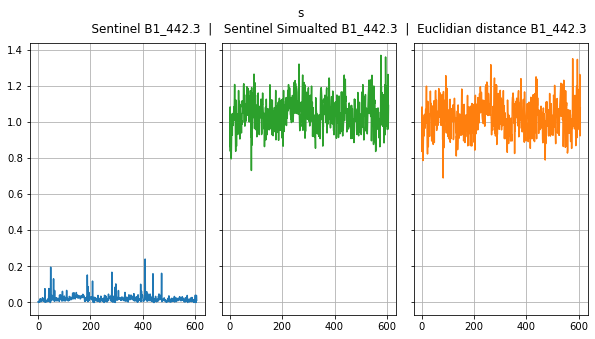

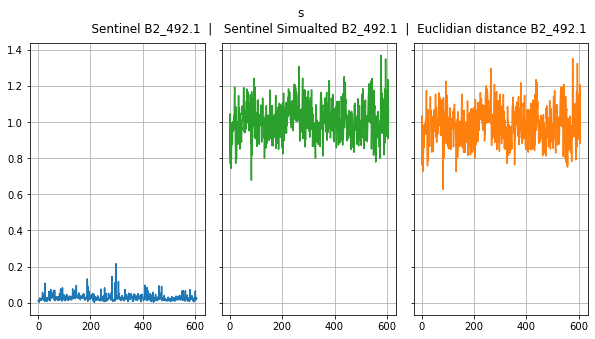

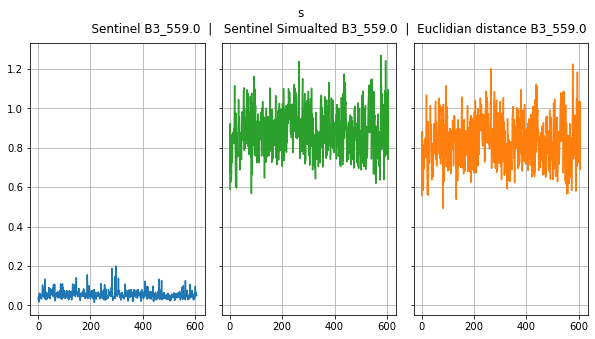

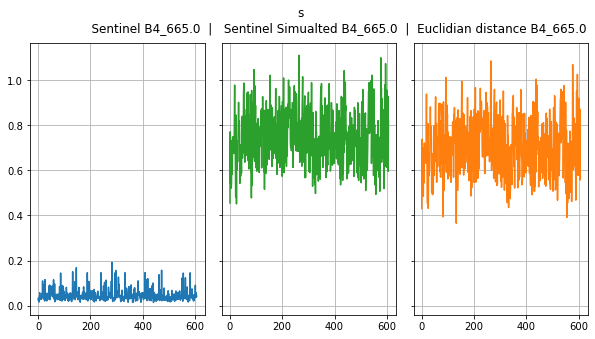

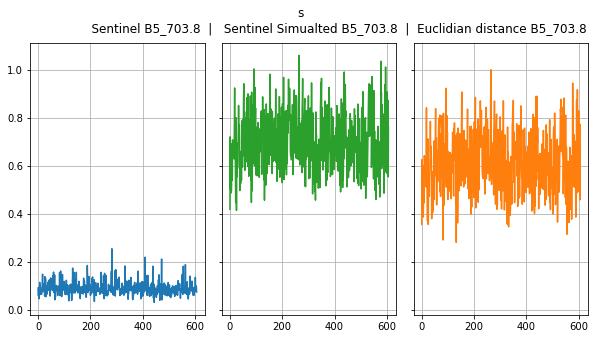

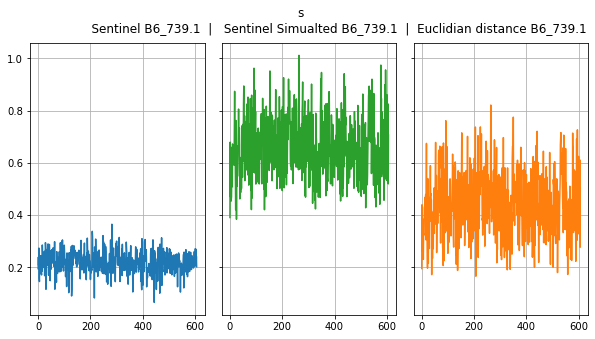

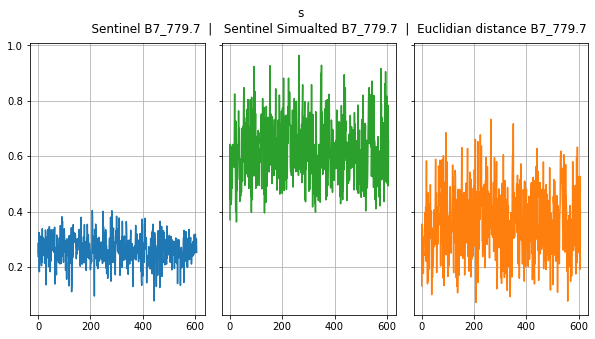

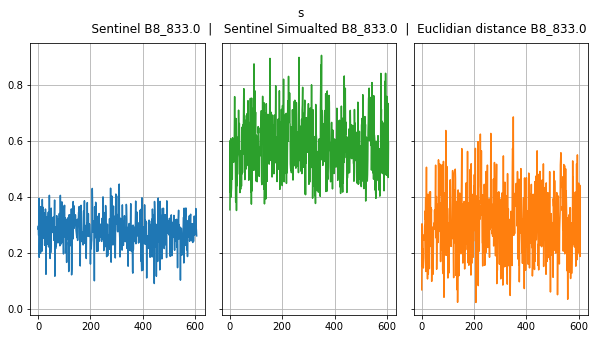

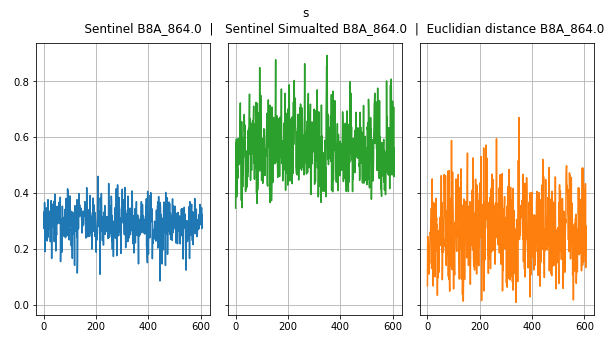

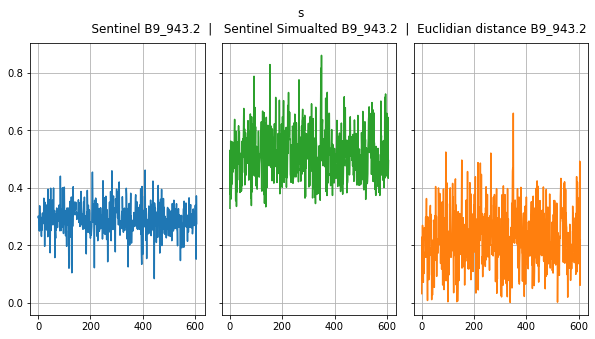

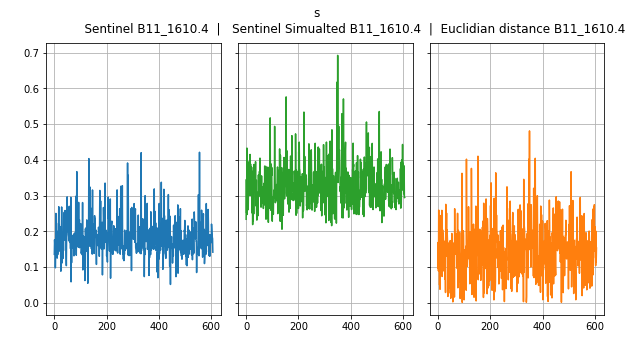

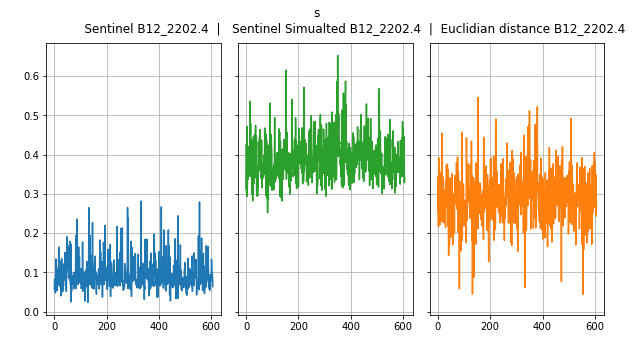

In [16]:
for col in cols:

    fig = plt.figure(figsize=(10, 5))
    gs = fig.add_gridspec(1, 3, hspace=.2, wspace=.1)
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')
    
    fig.suptitle(f's\n                    Sentinel {col}  |   Sentinel Simualted {col}  |  Euclidian distance {col}')
    
    ax1.plot(df_merge[f"{col}_sen"].index, df_merge[f"{col}_sen"], 'tab:blue')
    ax2.plot(df_merge[f"{col}_simsen"].index, df_merge[f"{col}_simsen"], 'tab:green')
    ax3.plot(df_merge[f"{col}_diff"].index, df_merge[f"{col}_diff"], 'tab:orange')
    
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    plt.show()

In [17]:
df_soil_data = pd.merge(df_merge.round(6), df_temp[df_temp['quality_classification'] == 'NOT_VEGETATION'][['pH', 'OM', 'Ca', 'Mg', 'K', 'Na']].round(6), on=['pH', 'OM', 'Ca', 'Mg', 'K', 'Na'])
print(df_soil_data.shape)
df_soil_data.head()

(19, 43)


pH        OM         Ca        Mg         K        Na  B1_442.3_sen  \
0  6.65  9.539340  34.552011  1.283865  0.319940  0.088900        0.0421   
1  4.84  3.277188   5.268932  0.860074  0.236551  0.218843        0.0518   
2  6.81  4.491411  22.106216  1.298166  0.276951  0.329939        0.0551   
3  6.56  3.996831  17.073114  1.058844  0.119232  0.161812        0.0348   
4  4.42  6.835504   1.179035  0.132695  0.169423  0.108512        0.0295   

   B2_492.1_sen  B3_559.0_sen  B4_665.0_sen  B5_703.8_sen  B6_739.1_sen  \
0        0.0759        0.1091        0.1443        0.1631        0.2350   
1        0.0760        0.1086        0.1504        0.1753        0.2088   
2        0.0948        0.1405        0.1678        0.1578        0.2233   
3        0.0751        0.1103        0.1457        0.1577        0.2125   
4        0.0511        0.0787        0.1130        0.1442        0.1729   

   B7_779.7_sen  B8_833.0_sen  B8A_864.0_sen  B9_943.2_sen  B11_1610.4_sen  \
0        0.2630        0.3007         0.3067        0.3244          0.3671   
1        0.2338        0.2549         0.2729        0.2665          0.4036   
2        0.2305        0.2727         0.2578        0.3075          0.3157   
3        0.2377        0.2573         0.2699        0.3001          0.3159   
4        0.1959        0.2219         0.2275        0.2409          0.3278   

   B12_2202.4_sen  B1_442.3_simsen  B2_492.1_simsen  B3_559.0_simsen  \
0          0.2359         1.162352         1.133889         1.026011   
1          0.2650         0.863661         0.801731         0.646432   
2          0.2272         1.030976         0.991950         0.874833   
3          0.2170         1.022990         0.970705         0.838002   
4          0.2137         1.116147         1.084661         0.956242   

   B4_665.0_simsen  B5_703.8_simsen  B6_739.1_simsen  B7_779.7_simsen  \
0         0.901255         0.855786         0.811226         0.769020   
1         0.515991         0.457715         0.420917         0.395554   
2         0.751234         0.697151         0.652043         0.613218   
3         0.744878         0.715250         0.688876         0.666833   
4         0.806800         0.752430         0.703705         0.661489   

   B8_833.0_simsen  B8A_864.0_simsen  B9_943.2_simsen  B10_1376.9  \
0         0.715420          0.688210         0.620991    0.387132   
1         0.375215          0.366833         0.346740    0.256896   
2         0.569001          0.547554         0.499821    0.347280   
3         0.645644          0.636251         0.610174    0.480361   
4         0.614670          0.592248         0.543687    0.382631   

   B11_1610.4_simsen  B12_2202.4_simsen  B1_442.3_diff  B2_492.1_diff  \
0           0.334365           0.404744       1.120252       1.057989   
1           0.229135           0.310196       0.811861       0.725731   
2           0.310599           0.399232       0.975876       0.897150   
3           0.444879           0.459917       0.988190       0.895605   
4           0.367341           0.484316       1.086647       1.033561   

   B3_559.0_diff  B4_665.0_diff  B5_703.8_diff  B6_739.1_diff  B7_779.7_diff  \
0       0.916911       0.756955       0.692686       0.576226       0.506020   
1       0.537832       0.365591       0.282415       0.212117       0.161754   
2       0.734333       0.583434       0.539351       0.428743       0.382718   
3       0.727702       0.599178       0.557550       0.476376       0.429133   
4       0.877542       0.693800       0.608230       0.530805       0.465589   

   B8_833.0_diff  B8A_864.0_diff  B9_943.2_diff  B11_1610.4_diff  \
0       0.414720        0.381510       0.296591         0.032735   
1       0.120315        0.093933       0.080240         0.174465   
2       0.296301        0.289754       0.192321         0.005101   
3       0.388344        0.366351       0.310074         0.128979   
4       0.392770        0.364748       0.302787         0.039541   

   B12_2202.

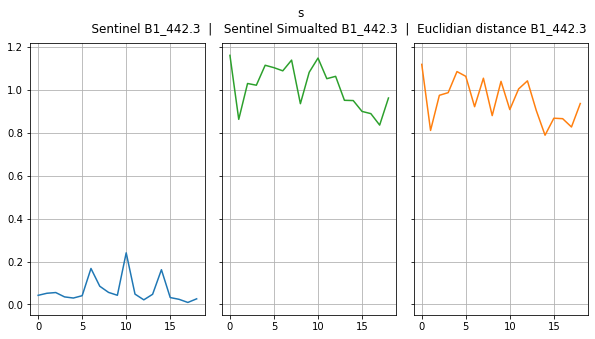

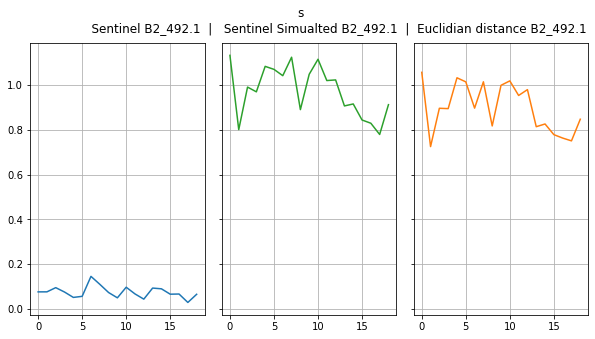

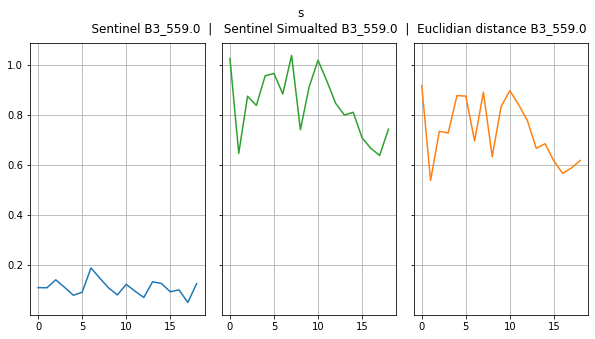

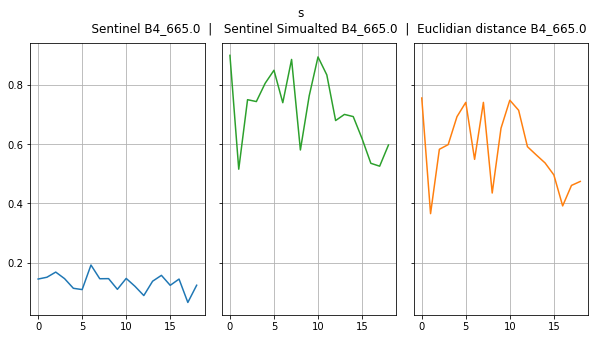

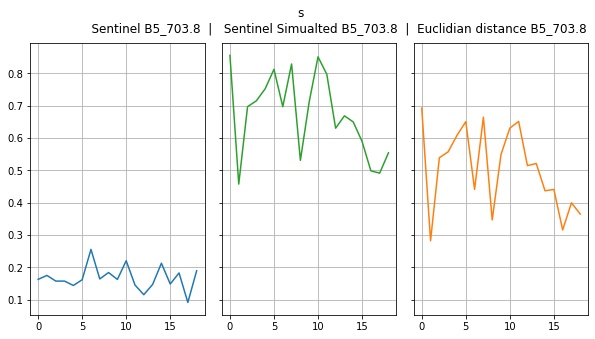

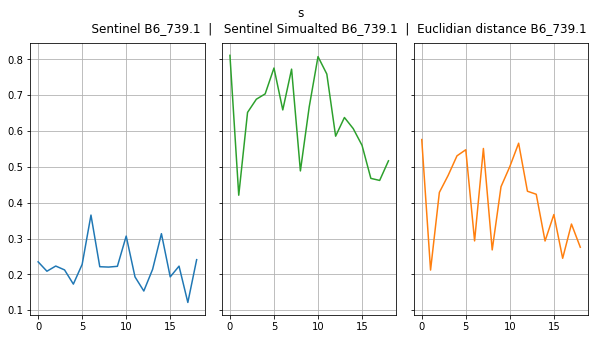

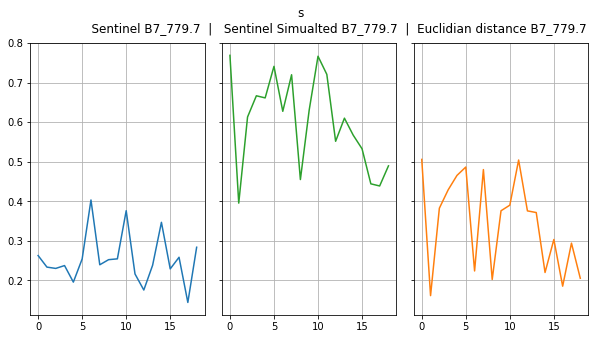

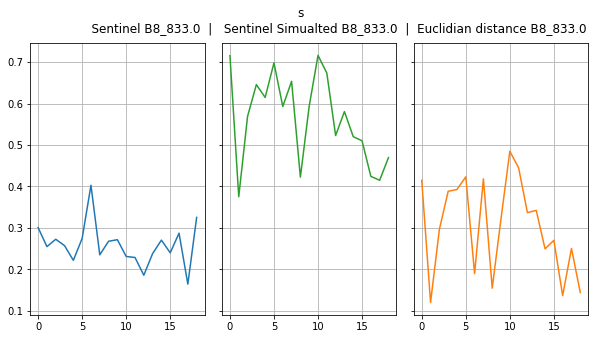

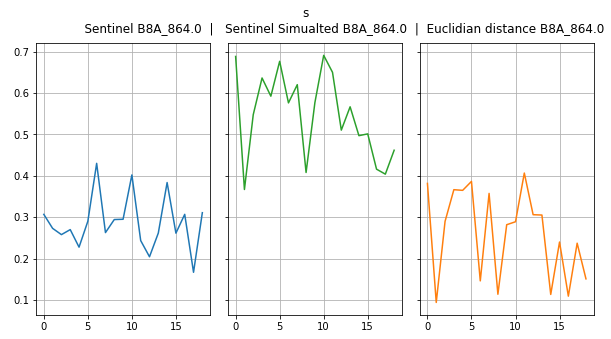

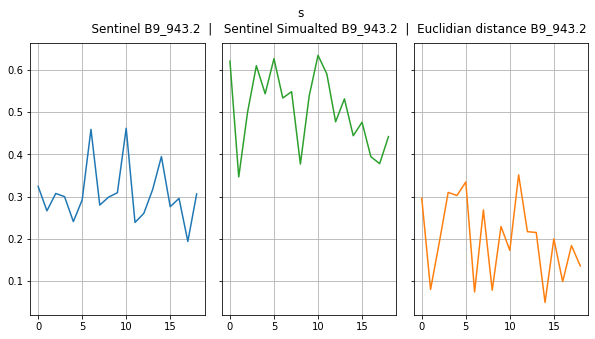

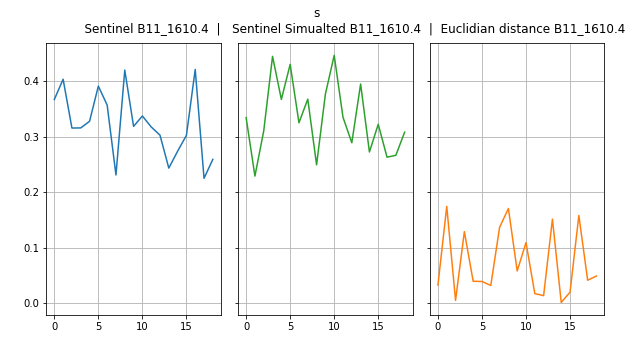

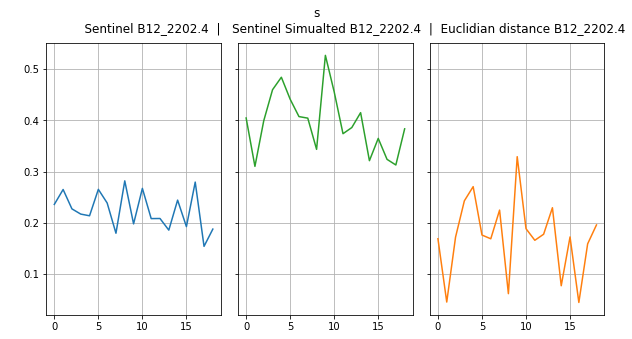

In [18]:
for col in cols:
   
    fig = plt.figure(figsize=(10, 5))
    gs = fig.add_gridspec(1, 3, hspace=.2, wspace=.1)
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')

    fig.suptitle(f's\n                    Sentinel {col}  |   Sentinel Simualted {col}  |  Euclidian distance {col}')
    
    ax1.plot(df_soil_data[f"{col}_sen"].index, df_soil_data[f"{col}_sen"], 'tab:blue')
    ax2.plot(df_soil_data[f"{col}_simsen"].index, df_soil_data[f"{col}_simsen"], 'tab:green')
    ax3.plot(df_soil_data[f"{col}_diff"].index, df_soil_data[f"{col}_diff"], 'tab:orange')
    
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    plt.show()

## Testing models

In [72]:
def check_path(path):
    files = path.split('/')
    tmp_path = ''
    
    for file in files:
        tmp_path += f"{file}/"
        if not os.path.exists(tmp_path):
            os.mkdir(tmp_path)
        else:
            print(f'File: **{file}** exists')

sentinel2_bands = {  
    'B1': [432.3, 452.3],  
    'B2': [459.6, 524.6],  
    'B3': [541.5, 576.5],  
    'B4': [650, 680],  
    'B5': [696.3, 711.3],  
    'B6': [731.6, 746.6],  
    'B7': [769.7, 789.7],  
    'B8': [775.5, 890.5],  
    'B8A': [854, 874],  
    'B9': [933.2, 953.2],  
    'B10': [1361.9, 1391.9],  
    'B11': [1565.4, 1655.4],  
    'B12': [2112.4, 2292.4]  
}  

In [73]:
sat_sentinel_data_unprocessed = r'../data/processed_raw/sentinel_bands/S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_processed.csv'
df_temp_ = pd.read_csv(sat_sentinel_data_unprocessed, sep=';')#
df_temp_ = df_temp_[df_temp_['quality_classification'] == 'NOT_VEGETATION'][
    [
        'pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1', 'B2', 'B3', 'B4',
        'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'
    ]
]
df_temp_ = df_temp_.rename(
        columns={
            i: f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_temp_.columns if (len(i) > 1) and (i[1].isnumeric())
        }
    )
print(df_temp_.shape)
df_temp_.head()
# df_temp
# 

(19, 18)


pH        OM         Ca        Mg         K        Na  B1_442.3  \
88   6.65  9.539340  34.552011  1.283865  0.319940  0.088900    0.0421   
137  4.84  3.277188   5.268932  0.860074  0.236551  0.218843    0.0518   
152  6.81  4.491411  22.106216  1.298166  0.276951  0.329939    0.0551   
251  6.56  3.996831  17.073114  1.058844  0.119232  0.161812    0.0348   
271  4.42  6.835504   1.179035  0.132695  0.169423  0.108512    0.0295   

     B2_492.1  B3_559.0  B4_665.0  B5_703.8  B6_739.1  B7_779.7  B8_833.0  \
88     0.0759    0.1091    0.1443    0.1631    0.2350    0.2630    0.3007   
137    0.0760    0.1086    0.1504    0.1753    0.2088    0.2338    0.2549   
152    0.0948    0.1405    0.1678    0.1578    0.2233    0.2305    0.2727   
251    0.0751    0.1103    0.1457    0.1577    0.2125    0.2377    0.2573   
271    0.0511    0.0787    0.1130    0.1442    0.1729    0.1959    0.2219   

     B8A_864.0  B9_943.2  B11_1610.4  B12_2202.4  
88      0.3067    0.3244      0.3671      0.2359  
137     0.2729    0.2665      0.4036      0.2650  
152     0.2578    0.3075      0.3157      0.2272  
251     0.2699    0.3001      0.3159      0.2170  
271     0.2275    0.2409      0.3278      0.2137

In [75]:
key = 'sentinel_soil'
check_path(f'../data/interim_raw/{key}')
df_temp_.to_csv(
    f'../data/interim_raw/{key}/satellite_{key}.csv',
    index=False,
    header=True,
    sep = ';',
    decimal = '.'
)

File: **..** exists
File: **data** exists
File: **interim_raw** exists
File: **sentinel_soil** exists


In [48]:
# Loading libraries
#####################################################################

# Standard libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import six
import os

# Datasets
from sklearn import datasets

# Models
from sklearn.cross_decomposition import PLSRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Extra libraries
from IPython.display import display 
from sklearn.utils import resample
from itertools import cycle
from scipy import interp
from pickle import dump
import joblib

#####################################################################

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 999
pd.options.display.max_columns = 999


# Properties, models and normalization methods used
#####################################################################

properties = [
    'pH',
    'OM',
    'Ca',
    'Mg',
    'K',
#     'Na'
]

models = [
    'LR',
    'SVR',
    'LASSO',
    'PLSR2',
    'PLSR6',
    'RF'
]

model_funct = {
    'LR': LinearRegression(),
    'SVR': SVR(kernel='linear'),
    'LASSO': LassoCV(
        cv=5, random_state=0, max_iter = 30000,
        verbose = 0, n_jobs = -1 # verbose = 10
    ),
    'PLSR2': PLSRegression(n_components=2),
    'PLSR6': PLSRegression(n_components=6),
    'RF': RandomForestRegressor(
            bootstrap=True,
            max_depth=4,
            max_features='auto',
            min_samples_leaf=2,
            min_samples_split=5,
            n_estimators=72,
            verbose = 0
        )
}

scalers = [
    'wo_norm',
    'minmax',
    'standard'
]

satellites = [
#     'landsat_simulated',
#     'landsat_simulated_indices',
#     'sentinel2_simulated',
#     'sentinel2_simulated_indices',
    'sentinel2',
#     'sentinel2_indices',
#     'sentinel2_veggi',
#     'sentinel2_veggi_indices'
#     'desis_simulated',
#     'vis_nir'
]

satellites_with_indices = [
    'landsat_simulated_indices',
    'sentinel2_simulated_indices',
    'sentinel2_indices'
]

transformations = {
    'scE_d1_d2_': ['scE_', 'd1_', 'd2_'],
    'scE_d1_d2_fft_': ['scE_', 'd1_', 'd2_', 'fft_'],
    'scE_d1_d2_fft_cr_': ['scE_', 'd1_', 'd2_', 'fft_', 'cr_']
}

indices_ = [
    'SIPI', 'ARVI', 'NDSI', 'NDWI',
    'BSI', 'NBR', 'GCI', 'MSI', 'NDMI',
    'SAVI', 'AVI', 'EVI', 'GNDVI', 'NDVI',
    'NDGI'
]

In [49]:
def create_band_metrics():
    band_metrics = [
        'Satellite', 'Scaler', 'Features', 'Property' ,'Model', 
        'CC Train All', 'CC Test All',
        'MSE Train All', 'MSE CV All', 'MSE Test All',
        'R2 Train All', 'R2 CV All', 'R2 Test All',
        'EV Train All', 'EV CV All', 'EV Test All'
    ]

    metrics_df = pd.DataFrame(columns=band_metrics)
    return metrics_df


def calculate_metrics(metrics_df, y_train, y_prd_train_, satellite,
                      scaler, transformation, property_, model_text, scores):
 
    corr_train = round(np.corrcoef(y_train, y_prd_train_)[0, 1], 3)
    corr_test = round(np.corrcoef(y_test, y_prd_test_)[0, 1], 3)

    current_property_metrics = [
        satellite,
        scaler,
        transformation,
        property_,
        model_text,

        corr_train,
        corr_test,

        mean_squared_error(y_train, y_prd_train).round(3),
        np.mean(scores['test_mean_squared_error']).round(3),
        mean_squared_error(y_test, y_prd_test).round(3),

        r2_score(y_train, y_prd_train).round(3),
        np.mean(scores['test_r2']).round(3),
        r2_score(y_test, y_prd_test).round(3),

        explained_variance_score(y_train, y_prd_train).round(3),
        np.mean(scores['test_explained_variance']).round(3),
        explained_variance_score(y_test, y_prd_test).round(3)
    ]

    metrics_df.loc[metrics_df.shape[0]] = current_property_metrics

In [91]:
for satellite in satellites:
    print(f"satellite: {satellite}")

    for scaler in scalers:
        print(f"scaler: {scaler}")

        for transformation in transformations:
#             print(f"transformation: {transformation}")

            for property_ in properties:
                print(f"property_: {property_}")
            
                metrics_df = create_band_metrics()
                
                path = (
                    f'../data/models/predictions/{satellite}/{scaler}/' +
                    f"/{transformation}/{property_}/train_prediction.csv"
                )

                df_temp = pd.read_csv(path, sep = ';', decimal = '.')
                y_test = df_temp['y_train'] 
#                 display(df_temp.head())
                
                path2 = (
                    f'../data/models/input/sentinel_soil/{scaler}/' +
                    f"/All_{scaler}_d1d2_fft_feature_{property_}_.csv"
                )

                df_temp2 = pd.read_csv(path2, sep = ';', decimal = '.')
                df_temp2 = df_temp2[df_temp2.columns[3:]]
                X_test = df_temp2[df_temp.columns[:-2]]
                y_test = df_temp2[df_temp2.columns[0]]
                
#                 display(X_test.head())
#                 display(X_test.head())
#                 display(y_test.head())
    
                for model_text in models:
                    print(f"model: {model_text}")

                    scoring = {
                        'mean_squared_error': make_scorer(mean_squared_error),
                        'r2': 'r2',
                        'explained_variance': 'explained_variance'
                    }
                    
                    
                    model_path = (
                        f'../models/{satellite}/{scaler}/' +
                        f"/{property_}/{transformation}"
                    )

                    loaded_model = joblib.load(f"{model_path}/{model_text}_model.joblib")
#                     print(loaded_model.get_params())
                    
                    y_prd_test = loaded_model.predict(X_test)
                    
                    scores = cross_validate(loaded_model, X_test, y_test, scoring=scoring)

                    y_prd_test_ = (
                        y_prd_test if model_text not in ['PLSR2', 'PLSR6']
                        else y_prd_test[:, 0]
                    )
                    
                    calculate_metrics(
                        metrics_df, y_test, y_prd_test_,
                        satellite, scaler, transformation,
                        property_, model_text, scores
                    )
                    
                    display(metrics_df)

satellite: sentinel2
scaler: wo_norm
property_: pH
model: LR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       pH    LR          0.43         0.43   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          1.333       3.675         1.333        -0.124    -17.527   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.124         0.017     -9.161        0.017

model: SVR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       pH    LR         0.430        0.430   
1  sentinel2  wo_norm  scE_d1_d2_       pH   SVR         0.527        0.527   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          1.333       3.675         1.333        -0.124    -17.527   
1          1.333       1.501         1.217        -0.124    -14.629   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.124         0.017     -9.161        0.017  
1       -0.026         0.017      0.107        0.093

model: LASSO


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       pH     LR         0.430        0.430   
1  sentinel2  wo_norm  scE_d1_d2_       pH    SVR         0.527        0.527   
2  sentinel2  wo_norm  scE_d1_d2_       pH  LASSO         0.513        0.513   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          1.333       3.675         1.333        -0.124    -17.527   
1          1.333       1.501         1.217        -0.124    -14.629   
2          1.333       2.463         0.877        -0.124     -8.593   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.124         0.017     -9.161        0.017  
1       -0.026         0.017      0.107        0.093  
2        0.260         0.017     -7.277        0.263

model: PLSR2


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       pH     LR         0.430        0.430   
1  sentinel2  wo_norm  scE_d1_d2_       pH    SVR         0.527        0.527   
2  sentinel2  wo_norm  scE_d1_d2_       pH  LASSO         0.513        0.513   
3  sentinel2  wo_norm  scE_d1_d2_       pH  PLSR2         0.542        0.542   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          1.333       3.675         1.333        -0.124    -17.527   
1          1.333       1.501         1.217        -0.124    -14.629   
2          1.333       2.463         0.877        -0.124     -8.593   
3          1.333       0.987         1.099        -0.124     -4.236   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.124         0.017     -9.161        0.017  
1       -0.026         0.017      0.107        0.093  
2        0.260         0.017     -7.277        0.263  
3        0.073         0.017     -3.641        0.106

model: PLSR6


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       pH     LR         0.430        0.430   
1  sentinel2  wo_norm  scE_d1_d2_       pH    SVR         0.527        0.527   
2  sentinel2  wo_norm  scE_d1_d2_       pH  LASSO         0.513        0.513   
3  sentinel2  wo_norm  scE_d1_d2_       pH  PLSR2         0.542        0.542   
4  sentinel2  wo_norm  scE_d1_d2_       pH  PLSR6         0.430        0.430   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          1.333       3.675         1.333        -0.124    -17.527   
1          1.333       1.501         1.217        -0.124    -14.629   
2          1.333       2.463         0.877        -0.124     -8.593   
3          1.333       0.987         1.099        -0.124     -4.236   
4          1.333       2.596         1.284        -0.124    -34.739   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.124         0.017     -9.161        0.017  
1       -0.026         0.017      0.107        0.093  
2        0.260         0.017     -7.277        0.263  
3        0.073         0.017     -3.641        0.106  
4       -0.082         0.017    -22.320        0.082

model: RF


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       pH     LR         0.430        0.430   
1  sentinel2  wo_norm  scE_d1_d2_       pH    SVR         0.527        0.527   
2  sentinel2  wo_norm  scE_d1_d2_       pH  LASSO         0.513        0.513   
3  sentinel2  wo_norm  scE_d1_d2_       pH  PLSR2         0.542        0.542   
4  sentinel2  wo_norm  scE_d1_d2_       pH  PLSR6         0.430        0.430   
5  sentinel2  wo_norm  scE_d1_d2_       pH     RF         0.821        0.821   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          1.333       3.675         1.333        -0.124    -17.527   
1          1.333       1.501         1.217        -0.124    -14.629   
2          1.333       2.463         0.877        -0.124     -8.593   
3          1.333       0.987         1.099        -0.124     -4.236   
4          1.333       2.596         1.284        -0.124    -34.739   
5          1.333       0.736         0.726        -0.124     -0.094   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.124         0.017     -9.161        0.017  
1       -0.026         0.017      0.107        0.093  
2        0.260         0.017     -7.277        0.263  
3        0.073         0.017     -3.641        0.106  
4       -0.082         0.017    -22.320        0.082  
5        0.388         0.017      0.125        0.395

property_: OM
model: LR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       OM    LR         0.082        0.082   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          7.627     425.463         7.481         -0.12  -4054.555   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.098          0.13  -1210.215       -0.098

model: SVR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       OM    LR         0.082        0.082   
1  sentinel2  wo_norm  scE_d1_d2_       OM   SVR         0.193        0.193   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          7.627     425.463         7.481         -0.12  -4054.555   
1          7.627       8.750         7.048         -0.12    -55.153   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.098          0.13  -1210.215       -0.098  
1       -0.035          0.13      0.069        0.023

model: LASSO


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       OM     LR         0.082        0.082   
1  sentinel2  wo_norm  scE_d1_d2_       OM    SVR         0.193        0.193   
2  sentinel2  wo_norm  scE_d1_d2_       OM  LASSO        -0.081       -0.081   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          7.627     425.463         7.481         -0.12  -4054.555   
1          7.627       8.750         7.048         -0.12    -55.153   
2          7.627       8.406         7.358         -0.12    -60.541   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.098          0.13  -1210.215       -0.098  
1       -0.035          0.13      0.069        0.023  
2       -0.080          0.13     -0.122       -0.066

model: PLSR2


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       OM     LR         0.082        0.082   
1  sentinel2  wo_norm  scE_d1_d2_       OM    SVR         0.193        0.193   
2  sentinel2  wo_norm  scE_d1_d2_       OM  LASSO        -0.081       -0.081   
3  sentinel2  wo_norm  scE_d1_d2_       OM  PLSR2        -0.022       -0.022   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          7.627     425.463         7.481         -0.12  -4054.555   
1          7.627       8.750         7.048         -0.12    -55.153   
2          7.627       8.406         7.358         -0.12    -60.541   
3          7.627      10.460         7.349         -0.12    -94.174   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.098          0.13  -1210.215       -0.098  
1       -0.035          0.13      0.069        0.023  
2       -0.080          0.13     -0.122       -0.066  
3       -0.079          0.13    -12.321       -0.049

model: PLSR6


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       OM     LR         0.082        0.082   
1  sentinel2  wo_norm  scE_d1_d2_       OM    SVR         0.193        0.193   
2  sentinel2  wo_norm  scE_d1_d2_       OM  LASSO        -0.081       -0.081   
3  sentinel2  wo_norm  scE_d1_d2_       OM  PLSR2        -0.022       -0.022   
4  sentinel2  wo_norm  scE_d1_d2_       OM  PLSR6        -0.121       -0.121   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          7.627     425.463         7.481         -0.12  -4054.555   
1          7.627       8.750         7.048         -0.12    -55.153   
2          7.627       8.406         7.358         -0.12    -60.541   
3          7.627      10.460         7.349         -0.12    -94.174   
4          7.627      14.676         8.234         -0.12    -73.077   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.098          0.13  -1210.215       -0.098  
1       -0.035          0.13      0.069        0.023  
2       -0.080          0.13     -0.122       -0.066  
3       -0.079          0.13    -12.321       -0.049  
4       -0.209          0.13     -9.163       -0.209

model: RF


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       OM     LR         0.082        0.082   
1  sentinel2  wo_norm  scE_d1_d2_       OM    SVR         0.193        0.193   
2  sentinel2  wo_norm  scE_d1_d2_       OM  LASSO        -0.081       -0.081   
3  sentinel2  wo_norm  scE_d1_d2_       OM  PLSR2        -0.022       -0.022   
4  sentinel2  wo_norm  scE_d1_d2_       OM  PLSR6        -0.121       -0.121   
5  sentinel2  wo_norm  scE_d1_d2_       OM     RF         0.160        0.160   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          7.627     425.463         7.481         -0.12  -4054.555   
1          7.627       8.750         7.048         -0.12    -55.153   
2          7.627       8.406         7.358         -0.12    -60.541   
3          7.627      10.460         7.349         -0.12    -94.174   
4          7.627      14.676         8.234         -0.12    -73.077   
5          7.627       8.707         6.740         -0.12    -69.074   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.098          0.13  -1210.215       -0.098  
1       -0.035          0.13      0.069        0.023  
2       -0.080          0.13     -0.122       -0.066  
3       -0.079          0.13    -12.321       -0.049  
4       -0.209          0.13     -9.163       -0.209  
5        0.010          0.13     -0.539        0.013

property_: Ca
model: LR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Ca    LR         0.302        0.302   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0        187.358    2312.543       162.439         -0.32   -203.911   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.145         0.026    -40.191       -0.089

model: SVR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Ca    LR         0.302        0.302   
1  sentinel2  wo_norm  scE_d1_d2_       Ca   SVR        -0.214       -0.214   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0        187.358    2312.543       162.439         -0.32   -203.911   
1        187.358     225.445       202.968         -0.32    -18.789   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.145         0.026    -40.191       -0.089  
1       -0.430         0.026      0.008       -0.009

model: LASSO


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Ca     LR         0.302        0.302   
1  sentinel2  wo_norm  scE_d1_d2_       Ca    SVR        -0.214       -0.214   
2  sentinel2  wo_norm  scE_d1_d2_       Ca  LASSO         0.434        0.434   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0        187.358    2312.543       162.439         -0.32   -203.911   
1        187.358     225.445       202.968         -0.32    -18.789   
2        187.358     231.949       119.676         -0.32    -19.092   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.145         0.026    -40.191       -0.089  
1       -0.430         0.026      0.008       -0.009  
2        0.157         0.026     -0.646        0.184

model: PLSR2


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Ca     LR         0.302        0.302   
1  sentinel2  wo_norm  scE_d1_d2_       Ca    SVR        -0.214       -0.214   
2  sentinel2  wo_norm  scE_d1_d2_       Ca  LASSO         0.434        0.434   
3  sentinel2  wo_norm  scE_d1_d2_       Ca  PLSR2         0.384        0.384   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0        187.358    2312.543       162.439         -0.32   -203.911   
1        187.358     225.445       202.968         -0.32    -18.789   
2        187.358     231.949       119.676         -0.32    -19.092   
3        187.358     186.428       165.390         -0.32    -10.682   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.145         0.026    -40.191       -0.089  
1       -0.430         0.026      0.008       -0.009  
2        0.157         0.026     -0.646        0.184  
3       -0.165         0.026    -10.028       -0.165

model: PLSR6


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Ca     LR         0.302        0.302   
1  sentinel2  wo_norm  scE_d1_d2_       Ca    SVR        -0.214       -0.214   
2  sentinel2  wo_norm  scE_d1_d2_       Ca  LASSO         0.434        0.434   
3  sentinel2  wo_norm  scE_d1_d2_       Ca  PLSR2         0.384        0.384   
4  sentinel2  wo_norm  scE_d1_d2_       Ca  PLSR6         0.257        0.257   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0        187.358    2312.543       162.439         -0.32   -203.911   
1        187.358     225.445       202.968         -0.32    -18.789   
2        187.358     231.949       119.676         -0.32    -19.092   
3        187.358     186.428       165.390         -0.32    -10.682   
4        187.358     301.175       183.039         -0.32    -39.535   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.145         0.026    -40.191       -0.089  
1       -0.430         0.026      0.008       -0.009  
2        0.157         0.026     -0.646        0.184  
3       -0.165         0.026    -10.028       -0.165  
4       -0.290         0.026    -34.263       -0.227

model: RF


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Ca     LR         0.302        0.302   
1  sentinel2  wo_norm  scE_d1_d2_       Ca    SVR        -0.214       -0.214   
2  sentinel2  wo_norm  scE_d1_d2_       Ca  LASSO         0.434        0.434   
3  sentinel2  wo_norm  scE_d1_d2_       Ca  PLSR2         0.384        0.384   
4  sentinel2  wo_norm  scE_d1_d2_       Ca  PLSR6         0.257        0.257   
5  sentinel2  wo_norm  scE_d1_d2_       Ca     RF         0.697        0.697   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0        187.358    2312.543       162.439         -0.32   -203.911   
1        187.358     225.445       202.968         -0.32    -18.789   
2        187.358     231.949       119.676         -0.32    -19.092   
3        187.358     186.428       165.390         -0.32    -10.682   
4        187.358     301.175       183.039         -0.32    -39.535   
5        187.358     150.662        98.077         -0.32     -9.875   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.145         0.026    -40.191       -0.089  
1       -0.430         0.026      0.008       -0.009  
2        0.157         0.026     -0.646        0.184  
3       -0.165         0.026    -10.028       -0.165  
4       -0.290         0.026    -34.263       -0.227  
5        0.309         0.026     -0.033        0.323

property_: Mg
model: LR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Mg    LR          0.34         0.34   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         20.254       2.393         0.429        -57.34    -51.107   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.237        -1.046    -19.788        0.071

model: SVR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Mg    LR         0.340        0.340   
1  sentinel2  wo_norm  scE_d1_d2_       Mg   SVR         0.546        0.546   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         20.254       2.393         0.429        -57.34    -51.107   
1         20.254       0.378         0.366        -57.34     -1.915   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.237        -1.046    -19.788        0.071  
1       -0.054        -1.046      0.006        0.089

model: LASSO


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Mg     LR         0.340        0.340   
1  sentinel2  wo_norm  scE_d1_d2_       Mg    SVR         0.546        0.546   
2  sentinel2  wo_norm  scE_d1_d2_       Mg  LASSO         0.361        0.361   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         20.254       2.393         0.429        -57.34    -51.107   
1         20.254       0.378         0.366        -57.34     -1.915   
2         20.254       0.704         0.384        -57.34     -4.723   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.237        -1.046    -19.788        0.071  
1       -0.054        -1.046      0.006        0.089  
2       -0.107        -1.046     -2.179        0.117

model: PLSR2


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Mg     LR         0.340        0.340   
1  sentinel2  wo_norm  scE_d1_d2_       Mg    SVR         0.546        0.546   
2  sentinel2  wo_norm  scE_d1_d2_       Mg  LASSO         0.361        0.361   
3  sentinel2  wo_norm  scE_d1_d2_       Mg  PLSR2         0.442        0.442   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         20.254       2.393         0.429        -57.34    -51.107   
1         20.254       0.378         0.366        -57.34     -1.915   
2         20.254       0.704         0.384        -57.34     -4.723   
3         20.254       0.435         0.368        -57.34     -3.445   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.237        -1.046    -19.788        0.071  
1       -0.054        -1.046      0.006        0.089  
2       -0.107        -1.046     -2.179        0.117  
3       -0.059        -1.046     -2.144        0.069

model: PLSR6


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Mg     LR         0.340        0.340   
1  sentinel2  wo_norm  scE_d1_d2_       Mg    SVR         0.546        0.546   
2  sentinel2  wo_norm  scE_d1_d2_       Mg  LASSO         0.361        0.361   
3  sentinel2  wo_norm  scE_d1_d2_       Mg  PLSR2         0.442        0.442   
4  sentinel2  wo_norm  scE_d1_d2_       Mg  PLSR6         0.250        0.250   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         20.254       2.393         0.429        -57.34    -51.107   
1         20.254       0.378         0.366        -57.34     -1.915   
2         20.254       0.704         0.384        -57.34     -4.723   
3         20.254       0.435         0.368        -57.34     -3.445   
4         20.254       0.917         0.496        -57.34     -5.618   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.237        -1.046    -19.788        0.071  
1       -0.054        -1.046      0.006        0.089  
2       -0.107        -1.046     -2.179        0.117  
3       -0.059        -1.046     -2.144        0.069  
4       -0.428        -1.046     -4.067       -0.069

model: RF


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_       Mg     LR         0.340        0.340   
1  sentinel2  wo_norm  scE_d1_d2_       Mg    SVR         0.546        0.546   
2  sentinel2  wo_norm  scE_d1_d2_       Mg  LASSO         0.361        0.361   
3  sentinel2  wo_norm  scE_d1_d2_       Mg  PLSR2         0.442        0.442   
4  sentinel2  wo_norm  scE_d1_d2_       Mg  PLSR6         0.250        0.250   
5  sentinel2  wo_norm  scE_d1_d2_       Mg     RF         0.710        0.710   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         20.254       2.393         0.429        -57.34    -51.107   
1         20.254       0.378         0.366        -57.34     -1.915   
2         20.254       0.704         0.384        -57.34     -4.723   
3         20.254       0.435         0.368        -57.34     -3.445   
4         20.254       0.917         0.496        -57.34     -5.618   
5         20.254       0.259         0.278        -57.34     -1.532   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.237        -1.046    -19.788        0.071  
1       -0.054        -1.046      0.006        0.089  
2       -0.107        -1.046     -2.179        0.117  
3       -0.059        -1.046     -2.144        0.069  
4       -0.428        -1.046     -4.067       -0.069  
5        0.198        -1.046     -0.198        0.225

property_: K
model: LR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_        K    LR          0.85         0.85   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.246       0.296         0.027      -335.966    -56.005   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.653        -5.173    -31.784        0.659

model: SVR


Satellite   Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_        K    LR         0.850        0.850   
1  sentinel2  wo_norm  scE_d1_d2_        K   SVR         0.842        0.842   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.246       0.296         0.027      -335.966    -56.005   
1         26.246       0.057         0.059      -335.966    -27.689   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.653        -5.173    -31.784        0.659  
1        0.242        -5.173     -2.023        0.318

model: LASSO


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_        K     LR         0.850        0.850   
1  sentinel2  wo_norm  scE_d1_d2_        K    SVR         0.842        0.842   
2  sentinel2  wo_norm  scE_d1_d2_        K  LASSO         0.862        0.862   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.246       0.296         0.027      -335.966    -56.005   
1         26.246       0.057         0.059      -335.966    -27.689   
2         26.246       0.040         0.031      -335.966    -19.998   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.653        -5.173    -31.784        0.659  
1        0.242        -5.173     -2.023        0.318  
2        0.601        -5.173    -14.420        0.606

model: PLSR2


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_        K     LR         0.850        0.850   
1  sentinel2  wo_norm  scE_d1_d2_        K    SVR         0.842        0.842   
2  sentinel2  wo_norm  scE_d1_d2_        K  LASSO         0.862        0.862   
3  sentinel2  wo_norm  scE_d1_d2_        K  PLSR2         0.859        0.859   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.246       0.296         0.027      -335.966    -56.005   
1         26.246       0.057         0.059      -335.966    -27.689   
2         26.246       0.040         0.031      -335.966    -19.998   
3         26.246       0.033         0.032      -335.966    -48.871   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.653        -5.173    -31.784        0.659  
1        0.242        -5.173     -2.023        0.318  
2        0.601        -5.173    -14.420        0.606  
3        0.584        -5.173    -21.584        0.592

model: PLSR6


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_        K     LR         0.850        0.850   
1  sentinel2  wo_norm  scE_d1_d2_        K    SVR         0.842        0.842   
2  sentinel2  wo_norm  scE_d1_d2_        K  LASSO         0.862        0.862   
3  sentinel2  wo_norm  scE_d1_d2_        K  PLSR2         0.859        0.859   
4  sentinel2  wo_norm  scE_d1_d2_        K  PLSR6         0.919        0.919   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.246       0.296         0.027      -335.966    -56.005   
1         26.246       0.057         0.059      -335.966    -27.689   
2         26.246       0.040         0.031      -335.966    -19.998   
3         26.246       0.033         0.032      -335.966    -48.871   
4         26.246       0.034         0.027      -335.966    -13.274   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.653        -5.173    -31.784        0.659  
1        0.242        -5.173     -2.023        0.318  
2        0.601        -5.173    -14.420        0.606  
3        0.584        -5.173    -21.584        0.592  
4        0.657        -5.173    -11.707        0.657

model: RF


Satellite   Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  wo_norm  scE_d1_d2_        K     LR         0.850        0.850   
1  sentinel2  wo_norm  scE_d1_d2_        K    SVR         0.842        0.842   
2  sentinel2  wo_norm  scE_d1_d2_        K  LASSO         0.862        0.862   
3  sentinel2  wo_norm  scE_d1_d2_        K  PLSR2         0.859        0.859   
4  sentinel2  wo_norm  scE_d1_d2_        K  PLSR6         0.919        0.919   
5  sentinel2  wo_norm  scE_d1_d2_        K     RF         0.869        0.869   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.246       0.296         0.027      -335.966    -56.005   
1         26.246       0.057         0.059      -335.966    -27.689   
2         26.246       0.040         0.031      -335.966    -19.998   
3         26.246       0.033         0.032      -335.966    -48.871   
4         26.246       0.034         0.027      -335.966    -13.274   
5         26.246       0.052         0.026      -335.966    -37.373   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.653        -5.173    -31.784        0.659  
1        0.242        -5.173     -2.023        0.318  
2        0.601        -5.173    -14.420        0.606  
3        0.584        -5.173    -21.584        0.592  
4        0.657        -5.173    -11.707        0.657  
5        0.661        -5.173     -5.541        0.669

property_: pH
model: LR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       pH    LR         0.404   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.404          1.333       3.435         1.338        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0     -17.24       -0.128         0.017     -9.009        0.039

model: SVR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       pH    LR         0.404   
1  sentinel2  wo_norm  scE_d1_d2_fft_       pH   SVR         0.492   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.404          1.333       3.435         1.338        -0.124   
1        0.492          1.333       1.477         0.927        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -17.240       -0.128         0.017     -9.009        0.039  
1    -10.454        0.218         0.017     -0.968        0.223

model: LASSO


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       pH     LR         0.404   
1  sentinel2  wo_norm  scE_d1_d2_fft_       pH    SVR         0.492   
2  sentinel2  wo_norm  scE_d1_d2_fft_       pH  LASSO         0.361   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.404          1.333       3.435         1.338        -0.124   
1        0.492          1.333       1.477         0.927        -0.124   
2        0.361          1.333       1.300         1.082        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -17.240       -0.128         0.017     -9.009        0.039  
1    -10.454        0.218         0.017     -0.968        0.223  
2     -3.816        0.088         0.017     -0.038        0.094

model: PLSR2


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       pH     LR         0.404   
1  sentinel2  wo_norm  scE_d1_d2_fft_       pH    SVR         0.492   
2  sentinel2  wo_norm  scE_d1_d2_fft_       pH  LASSO         0.361   
3  sentinel2  wo_norm  scE_d1_d2_fft_       pH  PLSR2         0.498   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.404          1.333       3.435         1.338        -0.124   
1        0.492          1.333       1.477         0.927        -0.124   
2        0.361          1.333       1.300         1.082        -0.124   
3        0.498          1.333       1.227         1.143        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -17.240       -0.128         0.017     -9.009        0.039  
1    -10.454        0.218         0.017     -0.968        0.223  
2     -3.816        0.088         0.017     -0.038        0.094  
3     -4.925        0.036         0.017     -3.580        0.127

model: PLSR6


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       pH     LR         0.404   
1  sentinel2  wo_norm  scE_d1_d2_fft_       pH    SVR         0.492   
2  sentinel2  wo_norm  scE_d1_d2_fft_       pH  LASSO         0.361   
3  sentinel2  wo_norm  scE_d1_d2_fft_       pH  PLSR2         0.498   
4  sentinel2  wo_norm  scE_d1_d2_fft_       pH  PLSR6         0.397   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.404          1.333       3.435         1.338        -0.124   
1        0.492          1.333       1.477         0.927        -0.124   
2        0.361          1.333       1.300         1.082        -0.124   
3        0.498          1.333       1.227         1.143        -0.124   
4        0.397          1.333       3.424         1.374        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -17.240       -0.128         0.017     -9.009        0.039  
1    -10.454        0.218         0.017     -0.968        0.223  
2     -3.816        0.088         0.017     -0.038        0.094  
3     -4.925        0.036         0.017     -3.580        0.127  
4    -48.805       -0.158         0.017    -32.660        0.004

model: RF


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       pH     LR         0.404   
1  sentinel2  wo_norm  scE_d1_d2_fft_       pH    SVR         0.492   
2  sentinel2  wo_norm  scE_d1_d2_fft_       pH  LASSO         0.361   
3  sentinel2  wo_norm  scE_d1_d2_fft_       pH  PLSR2         0.498   
4  sentinel2  wo_norm  scE_d1_d2_fft_       pH  PLSR6         0.397   
5  sentinel2  wo_norm  scE_d1_d2_fft_       pH     RF         0.724   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.404          1.333       3.435         1.338        -0.124   
1        0.492          1.333       1.477         0.927        -0.124   
2        0.361          1.333       1.300         1.082        -0.124   
3        0.498          1.333       1.227         1.143        -0.124   
4        0.397          1.333       3.424         1.374        -0.124   
5        0.724          1.333       0.786         0.875        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -17.240       -0.128         0.017     -9.009        0.039  
1    -10.454        0.218         0.017     -0.968        0.223  
2     -3.816        0.088         0.017     -0.038        0.094  
3     -4.925        0.036         0.017     -3.580        0.127  
4    -48.805       -0.158         0.017    -32.660        0.004  
5     -0.918        0.262         0.017     -0.115        0.271

property_: OM
model: LR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       OM    LR         0.105   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.105          7.627     559.647         6.913         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -4102.527       -0.015          0.13  -1237.583         -0.0

model: SVR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       OM    LR         0.105   
1  sentinel2  wo_norm  scE_d1_d2_fft_       OM   SVR         0.228   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.105          7.627     559.647         6.913         -0.12   
1        0.228          7.627       9.791         6.601         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -4102.527       -0.015          0.13  -1237.583       -0.000  
1    -51.301        0.031          0.13     -0.179        0.039

model: LASSO


C:\Users\camil\miniconda3\envs\Tesis\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\camil\miniconda3\envs\Tesis\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       OM     LR         0.105   
1  sentinel2  wo_norm  scE_d1_d2_fft_       OM    SVR         0.228   
2  sentinel2  wo_norm  scE_d1_d2_fft_       OM  LASSO           NaN   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.105          7.627     559.647         6.913         -0.12   
1        0.228          7.627       9.791         6.601         -0.12   
2          NaN          7.627       8.492         6.811         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -4102.527       -0.015          0.13  -1237.583       -0.000  
1    -51.301        0.031          0.13     -0.179        0.039  
2    -60.566       -0.000          0.13     -0.141        0.000

model: PLSR2


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       OM     LR         0.105   
1  sentinel2  wo_norm  scE_d1_d2_fft_       OM    SVR         0.228   
2  sentinel2  wo_norm  scE_d1_d2_fft_       OM  LASSO           NaN   
3  sentinel2  wo_norm  scE_d1_d2_fft_       OM  PLSR2         0.340   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.105          7.627     559.647         6.913         -0.12   
1        0.228          7.627       9.791         6.601         -0.12   
2          NaN          7.627       8.492         6.811         -0.12   
3        0.340          7.627      10.047         6.368         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -4102.527       -0.015          0.13  -1237.583       -0.000  
1    -51.301        0.031          0.13     -0.179        0.039  
2    -60.566       -0.000          0.13     -0.141        0.000  
3    -90.999        0.065          0.13     -9.198        0.074

model: PLSR6


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       OM     LR         0.105   
1  sentinel2  wo_norm  scE_d1_d2_fft_       OM    SVR         0.228   
2  sentinel2  wo_norm  scE_d1_d2_fft_       OM  LASSO           NaN   
3  sentinel2  wo_norm  scE_d1_d2_fft_       OM  PLSR2         0.340   
4  sentinel2  wo_norm  scE_d1_d2_fft_       OM  PLSR6         0.099   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.105          7.627     559.647         6.913         -0.12   
1        0.228          7.627       9.791         6.601         -0.12   
2          NaN          7.627       8.492         6.811         -0.12   
3        0.340          7.627      10.047         6.368         -0.12   
4        0.099          7.627      15.311         6.891         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -4102.527       -0.015          0.13  -1237.583       -0.000  
1    -51.301        0.031          0.13     -0.179        0.039  
2    -60.566       -0.000          0.13     -0.141        0.000  
3    -90.999        0.065          0.13     -9.198        0.074  
4    -81.073       -0.012          0.13     -6.062        0.000

model: RF


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       OM     LR         0.105   
1  sentinel2  wo_norm  scE_d1_d2_fft_       OM    SVR         0.228   
2  sentinel2  wo_norm  scE_d1_d2_fft_       OM  LASSO           NaN   
3  sentinel2  wo_norm  scE_d1_d2_fft_       OM  PLSR2         0.340   
4  sentinel2  wo_norm  scE_d1_d2_fft_       OM  PLSR6         0.099   
5  sentinel2  wo_norm  scE_d1_d2_fft_       OM     RF         0.498   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.105          7.627     559.647         6.913         -0.12   
1        0.228          7.627       9.791         6.601         -0.12   
2          NaN          7.627       8.492         6.811         -0.12   
3        0.340          7.627      10.047         6.368         -0.12   
4        0.099          7.627      15.311         6.891         -0.12   
5        0.498          7.627       9.298         5.564         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -4102.527       -0.015          0.13  -1237.583       -0.000  
1    -51.301        0.031          0.13     -0.179        0.039  
2    -60.566       -0.000          0.13     -0.141        0.000  
3    -90.999        0.065          0.13     -9.198        0.074  
4    -81.073       -0.012          0.13     -6.062        0.000  
5    -81.826        0.183          0.13     -0.625        0.225

property_: Ca
model: LR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Ca    LR         0.122   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.122        187.358    1727.221       196.688         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -195.447       -0.386         0.026    -36.359       -0.277

model: SVR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Ca    LR         0.122   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Ca   SVR         0.417   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.122        187.358    1727.221       196.688         -0.32   
1        0.417        187.358     217.870       160.402         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -195.447       -0.386         0.026    -36.359       -0.277  
1    -17.910       -0.130         0.026     -0.003        0.061

model: LASSO


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Ca     LR         0.122   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Ca    SVR         0.417   
2  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  LASSO         0.188   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.122        187.358    1727.221       196.688         -0.32   
1        0.417        187.358     217.870       160.402         -0.32   
2        0.188        187.358     232.122       161.531         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -195.447       -0.386         0.026    -36.359       -0.277  
1    -17.910       -0.130         0.026     -0.003        0.061  
2    -19.217       -0.138         0.026     -0.826       -0.138

model: PLSR2


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Ca     LR         0.122   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Ca    SVR         0.417   
2  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  LASSO         0.188   
3  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  PLSR2         0.394   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.122        187.358    1727.221       196.688         -0.32   
1        0.417        187.358     217.870       160.402         -0.32   
2        0.188        187.358     232.122       161.531         -0.32   
3        0.394        187.358     211.613       149.146         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -195.447       -0.386         0.026    -36.359       -0.277  
1    -17.910       -0.130         0.026     -0.003        0.061  
2    -19.217       -0.138         0.026     -0.826       -0.138  
3     -6.186       -0.051         0.026     -4.466       -0.047

model: PLSR6


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Ca     LR         0.122   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Ca    SVR         0.417   
2  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  LASSO         0.188   
3  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  PLSR2         0.394   
4  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  PLSR6         0.179   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.122        187.358    1727.221       196.688         -0.32   
1        0.417        187.358     217.870       160.402         -0.32   
2        0.188        187.358     232.122       161.531         -0.32   
3        0.394        187.358     211.613       149.146         -0.32   
4        0.179        187.358     395.870       193.437         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -195.447       -0.386         0.026    -36.359       -0.277  
1    -17.910       -0.130         0.026     -0.003        0.061  
2    -19.217       -0.138         0.026     -0.826       -0.138  
3     -6.186       -0.051         0.026     -4.466       -0.047  
4    -52.389       -0.363         0.026    -44.644       -0.286

model: RF


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Ca     LR         0.122   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Ca    SVR         0.417   
2  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  LASSO         0.188   
3  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  PLSR2         0.394   
4  sentinel2  wo_norm  scE_d1_d2_fft_       Ca  PLSR6         0.179   
5  sentinel2  wo_norm  scE_d1_d2_fft_       Ca     RF         0.616   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.122        187.358    1727.221       196.688         -0.32   
1        0.417        187.358     217.870       160.402         -0.32   
2        0.188        187.358     232.122       161.531         -0.32   
3        0.394        187.358     211.613       149.146         -0.32   
4        0.179        187.358     395.870       193.437         -0.32   
5        0.616        187.358     142.801       109.108         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -195.447       -0.386         0.026    -36.359       -0.277  
1    -17.910       -0.130         0.026     -0.003        0.061  
2    -19.217       -0.138         0.026     -0.826       -0.138  
3     -6.186       -0.051         0.026     -4.466       -0.047  
4    -52.389       -0.363         0.026    -44.644       -0.286  
5     -9.325        0.231         0.026     -0.390        0.260

property_: Mg
model: LR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Mg    LR          0.49   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0         0.49         20.254       2.398         0.403        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.114        -0.16        -1.046    -19.789        0.209

model: SVR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Mg    LR         0.490   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Mg   SVR         0.376   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.490         20.254       2.398         0.403        -57.34   
1        0.376         20.254       0.437         0.310        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.114       -0.160        -1.046    -19.789        0.209  
1     -3.859        0.107        -1.046     -1.107        0.141

model: LASSO


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Mg     LR         0.490   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Mg    SVR         0.376   
2  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  LASSO         0.561   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.490         20.254       2.398         0.403        -57.34   
1        0.376         20.254       0.437         0.310        -57.34   
2        0.561         20.254       0.449         0.314        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.114       -0.160        -1.046    -19.789        0.209  
1     -3.859        0.107        -1.046     -1.107        0.141  
2     -2.606        0.096        -1.046     -0.642        0.315

model: PLSR2


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Mg     LR         0.490   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Mg    SVR         0.376   
2  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  LASSO         0.561   
3  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  PLSR2         0.597   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.490         20.254       2.398         0.403        -57.34   
1        0.376         20.254       0.437         0.310        -57.34   
2        0.561         20.254       0.449         0.314        -57.34   
3        0.597         20.254       0.459         0.242        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.114       -0.160        -1.046    -19.789        0.209  
1     -3.859        0.107        -1.046     -1.107        0.141  
2     -2.606        0.096        -1.046     -0.642        0.315  
3     -3.623        0.303        -1.046     -2.203        0.329

model: PLSR6


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Mg     LR         0.490   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Mg    SVR         0.376   
2  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  LASSO         0.561   
3  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  PLSR2         0.597   
4  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  PLSR6         0.454   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.490         20.254       2.398         0.403        -57.34   
1        0.376         20.254       0.437         0.310        -57.34   
2        0.561         20.254       0.449         0.314        -57.34   
3        0.597         20.254       0.459         0.242        -57.34   
4        0.454         20.254       0.926         0.448        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.114       -0.160        -1.046    -19.789        0.209  
1     -3.859        0.107        -1.046     -1.107        0.141  
2     -2.606        0.096        -1.046     -0.642        0.315  
3     -3.623        0.303        -1.046     -2.203        0.329  
4     -4.496       -0.291        -1.046     -3.451        0.155

model: RF


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_       Mg     LR         0.490   
1  sentinel2  wo_norm  scE_d1_d2_fft_       Mg    SVR         0.376   
2  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  LASSO         0.561   
3  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  PLSR2         0.597   
4  sentinel2  wo_norm  scE_d1_d2_fft_       Mg  PLSR6         0.454   
5  sentinel2  wo_norm  scE_d1_d2_fft_       Mg     RF         0.681   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.490         20.254       2.398         0.403        -57.34   
1        0.376         20.254       0.437         0.310        -57.34   
2        0.561         20.254       0.449         0.314        -57.34   
3        0.597         20.254       0.459         0.242        -57.34   
4        0.454         20.254       0.926         0.448        -57.34   
5        0.681         20.254       0.258         0.245        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.114       -0.160        -1.046    -19.789        0.209  
1     -3.859        0.107        -1.046     -1.107        0.141  
2     -2.606        0.096        -1.046     -0.642        0.315  
3     -3.623        0.303        -1.046     -2.203        0.329  
4     -4.496       -0.291        -1.046     -3.451        0.155  
5     -1.581        0.294        -1.046      0.009        0.294

property_: K
model: LR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_        K    LR         0.841   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.841         26.246        0.25         0.033      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -55.158        0.577        -5.173    -31.358        0.596

model: SVR


Satellite   Scaler        Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_        K    LR         0.841   
1  sentinel2  wo_norm  scE_d1_d2_fft_        K   SVR         0.880   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.841         26.246       0.250         0.033      -335.966   
1        0.880         26.246       0.028         0.033      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -55.158        0.577        -5.173    -31.358        0.596  
1    -18.304        0.576        -5.173     -3.342        0.592

model: LASSO


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_        K     LR         0.841   
1  sentinel2  wo_norm  scE_d1_d2_fft_        K    SVR         0.880   
2  sentinel2  wo_norm  scE_d1_d2_fft_        K  LASSO         0.886   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.841         26.246       0.250         0.033      -335.966   
1        0.880         26.246       0.028         0.033      -335.966   
2        0.886         26.246       0.038         0.035      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -55.158        0.577        -5.173    -31.358        0.596  
1    -18.304        0.576        -5.173     -3.342        0.592  
2    -37.844        0.552        -5.173    -22.445        0.572

model: PLSR2


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_        K     LR         0.841   
1  sentinel2  wo_norm  scE_d1_d2_fft_        K    SVR         0.880   
2  sentinel2  wo_norm  scE_d1_d2_fft_        K  LASSO         0.886   
3  sentinel2  wo_norm  scE_d1_d2_fft_        K  PLSR2         0.882   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.841         26.246       0.250         0.033      -335.966   
1        0.880         26.246       0.028         0.033      -335.966   
2        0.886         26.246       0.038         0.035      -335.966   
3        0.882         26.246       0.032         0.026      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -55.158        0.577        -5.173    -31.358        0.596  
1    -18.304        0.576        -5.173     -3.342        0.592  
2    -37.844        0.552        -5.173    -22.445        0.572  
3    -51.073        0.662        -5.173    -22.756        0.663

model: PLSR6


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_        K     LR         0.841   
1  sentinel2  wo_norm  scE_d1_d2_fft_        K    SVR         0.880   
2  sentinel2  wo_norm  scE_d1_d2_fft_        K  LASSO         0.886   
3  sentinel2  wo_norm  scE_d1_d2_fft_        K  PLSR2         0.882   
4  sentinel2  wo_norm  scE_d1_d2_fft_        K  PLSR6         0.881   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.841         26.246       0.250         0.033      -335.966   
1        0.880         26.246       0.028         0.033      -335.966   
2        0.886         26.246       0.038         0.035      -335.966   
3        0.882         26.246       0.032         0.026      -335.966   
4        0.881         26.246       0.041         0.034      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -55.158        0.577        -5.173    -31.358        0.596  
1    -18.304        0.576        -5.173     -3.342        0.592  
2    -37.844        0.552        -5.173    -22.445        0.572  
3    -51.073        0.662        -5.173    -22.756        0.663  
4    -20.199        0.563        -5.173    -16.280        0.579

model: RF


Satellite   Scaler        Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_        K     LR         0.841   
1  sentinel2  wo_norm  scE_d1_d2_fft_        K    SVR         0.880   
2  sentinel2  wo_norm  scE_d1_d2_fft_        K  LASSO         0.886   
3  sentinel2  wo_norm  scE_d1_d2_fft_        K  PLSR2         0.882   
4  sentinel2  wo_norm  scE_d1_d2_fft_        K  PLSR6         0.881   
5  sentinel2  wo_norm  scE_d1_d2_fft_        K     RF         0.818   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.841         26.246       0.250         0.033      -335.966   
1        0.880         26.246       0.028         0.033      -335.966   
2        0.886         26.246       0.038         0.035      -335.966   
3        0.882         26.246       0.032         0.026      -335.966   
4        0.881         26.246       0.041         0.034      -335.966   
5        0.818         26.246       0.047         0.036      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -55.158        0.577        -5.173    -31.358        0.596  
1    -18.304        0.576        -5.173     -3.342        0.592  
2    -37.844        0.552        -5.173    -22.445        0.572  
3    -51.073        0.662        -5.173    -22.756        0.663  
4    -20.199        0.563        -5.173    -16.280        0.579  
5    -55.373        0.534        -5.173     -8.302        0.561

property_: pH
model: LR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH    LR         0.524   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.524          1.333      11.367          1.44        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -117.048       -0.214         0.017   -109.492        -0.21

model: SVR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH    LR         0.524   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH   SVR         0.413   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.524          1.333      11.367         1.440        -0.124   
1        0.413          1.333       1.472         1.269        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -117.048       -0.214         0.017   -109.492        -0.21  
1    -10.756       -0.070         0.017     -0.887         0.17

model: LASSO


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH     LR         0.524   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH    SVR         0.413   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  LASSO         0.225   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.524          1.333      11.367         1.440        -0.124   
1        0.413          1.333       1.472         1.269        -0.124   
2        0.225          1.333       1.566         1.251        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -117.048       -0.214         0.017   -109.492       -0.210  
1    -10.756       -0.070         0.017     -0.887        0.170  
2     -4.133       -0.055         0.017     -0.276       -0.055

model: PLSR2


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH     LR         0.524   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH    SVR         0.413   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  LASSO         0.225   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  PLSR2         0.346   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.524          1.333      11.367         1.440        -0.124   
1        0.413          1.333       1.472         1.269        -0.124   
2        0.225          1.333       1.566         1.251        -0.124   
3        0.346          1.333       1.106         1.277        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -117.048       -0.214         0.017   -109.492       -0.210  
1    -10.756       -0.070         0.017     -0.887        0.170  
2     -4.133       -0.055         0.017     -0.276       -0.055  
3     -4.200       -0.077         0.017     -1.931        0.059

model: PLSR6


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH     LR         0.524   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH    SVR         0.413   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  LASSO         0.225   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  PLSR2         0.346   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  PLSR6         0.247   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.524          1.333      11.367         1.440        -0.124   
1        0.413          1.333       1.472         1.269        -0.124   
2        0.225          1.333       1.566         1.251        -0.124   
3        0.346          1.333       1.106         1.277        -0.124   
4        0.247          1.333       2.106         1.432        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -117.048       -0.214         0.017   -109.492       -0.210  
1    -10.756       -0.070         0.017     -0.887        0.170  
2     -4.133       -0.055         0.017     -0.276       -0.055  
3     -4.200       -0.077         0.017     -1.931        0.059  
4    -11.608       -0.207         0.017     -9.889       -0.166

model: RF


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH     LR         0.524   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH    SVR         0.413   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  LASSO         0.225   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  PLSR2         0.346   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH  PLSR6         0.247   
5  sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH     RF         0.782   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.524          1.333      11.367         1.440        -0.124   
1        0.413          1.333       1.472         1.269        -0.124   
2        0.225          1.333       1.566         1.251        -0.124   
3        0.346          1.333       1.106         1.277        -0.124   
4        0.247          1.333       2.106         1.432        -0.124   
5        0.782          1.333       0.824         0.835        -0.124   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -117.048       -0.214         0.017   -109.492       -0.210  
1    -10.756       -0.070         0.017     -0.887        0.170  
2     -4.133       -0.055         0.017     -0.276       -0.055  
3     -4.200       -0.077         0.017     -1.931        0.059  
4    -11.608       -0.207         0.017     -9.889       -0.166  
5     -1.525        0.296         0.017     -0.209        0.353

property_: OM
model: LR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM    LR        -0.202   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.202          7.627    1270.353        13.631         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -7885.982       -1.001          0.13  -3913.439       -0.997

model: SVR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM    LR        -0.202   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM   SVR         0.170   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.202          7.627    1270.353        13.631         -0.12   
1        0.170          7.627       9.792         7.474         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -7885.982       -1.001          0.13  -3913.439       -0.997  
1    -51.243       -0.097          0.13     -0.172        0.028

model: LASSO


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM     LR        -0.202   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM    SVR         0.170   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  LASSO         0.084   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.202          7.627    1270.353        13.631         -0.12   
1        0.170          7.627       9.792         7.474         -0.12   
2        0.084          7.627       8.492         7.015         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -7885.982       -1.001          0.13  -3913.439       -0.997  
1    -51.243       -0.097          0.13     -0.172        0.028  
2    -60.566       -0.030          0.13     -0.141        0.007

model: PLSR2


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM     LR        -0.202   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM    SVR         0.170   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  LASSO         0.084   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  PLSR2        -0.297   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.202          7.627    1270.353        13.631         -0.12   
1        0.170          7.627       9.792         7.474         -0.12   
2        0.084          7.627       8.492         7.015         -0.12   
3       -0.297          7.627       9.561         9.613         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -7885.982       -1.001          0.13  -3913.439       -0.997  
1    -51.243       -0.097          0.13     -0.172        0.028  
2    -60.566       -0.030          0.13     -0.141        0.007  
3    -84.892       -0.411          0.13    -11.496       -0.316

model: PLSR6


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM     LR        -0.202   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM    SVR         0.170   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  LASSO         0.084   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  PLSR2        -0.297   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  PLSR6        -0.197   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.202          7.627    1270.353        13.631         -0.12   
1        0.170          7.627       9.792         7.474         -0.12   
2        0.084          7.627       8.492         7.015         -0.12   
3       -0.297          7.627       9.561         9.613         -0.12   
4       -0.197          7.627      16.644         8.421         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -7885.982       -1.001          0.13  -3913.439       -0.997  
1    -51.243       -0.097          0.13     -0.172        0.028  
2    -60.566       -0.030          0.13     -0.141        0.007  
3    -84.892       -0.411          0.13    -11.496       -0.316  
4   -147.537       -0.236          0.13     -3.860       -0.184

model: RF


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM     LR        -0.202   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM    SVR         0.170   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  LASSO         0.084   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  PLSR2        -0.297   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  PLSR6        -0.197   
5  sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM     RF         0.089   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.202          7.627    1270.353        13.631         -0.12   
1        0.170          7.627       9.792         7.474         -0.12   
2        0.084          7.627       8.492         7.015         -0.12   
3       -0.297          7.627       9.561         9.613         -0.12   
4       -0.197          7.627      16.644         8.421         -0.12   
5        0.089          7.627       9.598         6.968         -0.12   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -7885.982       -1.001          0.13  -3913.439       -0.997  
1    -51.243       -0.097          0.13     -0.172        0.028  
2    -60.566       -0.030          0.13     -0.141        0.007  
3    -84.892       -0.411          0.13    -11.496       -0.316  
4   -147.537       -0.236          0.13     -3.860       -0.184  
5    -64.606       -0.023          0.13     -0.911       -0.021

property_: Ca
model: LR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca    LR         0.275   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.275        187.358   21072.235       211.697         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -635.943       -0.492         0.026   -522.249       -0.488

model: SVR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca    LR         0.275   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca   SVR         0.308   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.275        187.358   21072.235       211.697         -0.32   
1        0.308        187.358     217.756       156.622         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -635.943       -0.492         0.026   -522.249       -0.488  
1    -17.919       -0.104         0.026     -0.002        0.044

model: LASSO


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca     LR         0.275   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca    SVR         0.308   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  LASSO         0.024   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.275        187.358   21072.235       211.697         -0.32   
1        0.308        187.358     217.756       156.622         -0.32   
2        0.024        187.358     274.705       247.967         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -635.943       -0.492         0.026   -522.249       -0.488  
1    -17.919       -0.104         0.026     -0.002        0.044  
2    -49.172       -0.747         0.026    -12.167       -0.745

model: PLSR2


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca     LR         0.275   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca    SVR         0.308   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  LASSO         0.024   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  PLSR2         0.239   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.275        187.358   21072.235       211.697         -0.32   
1        0.308        187.358     217.756       156.622         -0.32   
2        0.024        187.358     274.705       247.967         -0.32   
3        0.239        187.358     202.418       188.705         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -635.943       -0.492         0.026   -522.249       -0.488  
1    -17.919       -0.104         0.026     -0.002        0.044  
2    -49.172       -0.747         0.026    -12.167       -0.745  
3    -10.662       -0.330         0.026     -2.992       -0.316

model: PLSR6


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca     LR         0.275   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca    SVR         0.308   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  LASSO         0.024   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  PLSR2         0.239   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  PLSR6        -0.012   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.275        187.358   21072.235       211.697         -0.32   
1        0.308        187.358     217.756       156.622         -0.32   
2        0.024        187.358     274.705       247.967         -0.32   
3        0.239        187.358     202.418       188.705         -0.32   
4       -0.012        187.358     302.466       280.702         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -635.943       -0.492         0.026   -522.249       -0.488  
1    -17.919       -0.104         0.026     -0.002        0.044  
2    -49.172       -0.747         0.026    -12.167       -0.745  
3    -10.662       -0.330         0.026     -2.992       -0.316  
4    -24.284       -0.978         0.026    -22.970       -0.960

model: RF


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca     LR         0.275   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca    SVR         0.308   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  LASSO         0.024   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  PLSR2         0.239   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca  PLSR6        -0.012   
5  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca     RF         0.664   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.275        187.358   21072.235       211.697         -0.32   
1        0.308        187.358     217.756       156.622         -0.32   
2        0.024        187.358     274.705       247.967         -0.32   
3        0.239        187.358     202.418       188.705         -0.32   
4       -0.012        187.358     302.466       280.702         -0.32   
5        0.664        187.358     163.936       113.874         -0.32   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -635.943       -0.492         0.026   -522.249       -0.488  
1    -17.919       -0.104         0.026     -0.002        0.044  
2    -49.172       -0.747         0.026    -12.167       -0.745  
3    -10.662       -0.330         0.026     -2.992       -0.316  
4    -24.284       -0.978         0.026    -22.970       -0.960  
5    -18.396        0.198         0.026     -1.933        0.250

property_: Mg
model: LR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg    LR         0.369   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.369         20.254      13.693         0.721        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -159.09       -1.076        -1.046   -103.195       -1.075

model: SVR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg    LR         0.369   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg   SVR         0.343   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.369         20.254      13.693         0.721        -57.34   
1        0.343         20.254       0.436         0.421        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -159.090       -1.076        -1.046   -103.195       -1.075  
1     -3.822       -0.212        -1.046     -1.082       -0.180

model: LASSO


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg     LR         0.369   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg    SVR         0.343   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  LASSO         0.351   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.369         20.254      13.693         0.721        -57.34   
1        0.343         20.254       0.436         0.421        -57.34   
2        0.351         20.254       0.441         0.349        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -159.090       -1.076        -1.046   -103.195       -1.075  
1     -3.822       -0.212        -1.046     -1.082       -0.180  
2     -2.597       -0.007        -1.046     -0.632        0.050

model: PLSR2


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg     LR         0.369   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg    SVR         0.343   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  LASSO         0.351   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  PLSR2         0.425   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.369         20.254      13.693         0.721        -57.34   
1        0.343         20.254       0.436         0.421        -57.34   
2        0.351         20.254       0.441         0.349        -57.34   
3        0.425         20.254       0.412         0.336        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -159.090       -1.076        -1.046   -103.195       -1.075  
1     -3.822       -0.212        -1.046     -1.082       -0.180  
2     -2.597       -0.007        -1.046     -0.632        0.050  
3     -3.127        0.033        -1.046     -1.757        0.050

model: PLSR6


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg     LR         0.369   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg    SVR         0.343   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  LASSO         0.351   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  PLSR2         0.425   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  PLSR6         0.206   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.369         20.254      13.693         0.721        -57.34   
1        0.343         20.254       0.436         0.421        -57.34   
2        0.351         20.254       0.441         0.349        -57.34   
3        0.425         20.254       0.412         0.336        -57.34   
4        0.206         20.254       0.707         0.459        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -159.090       -1.076        -1.046   -103.195       -1.075  
1     -3.822       -0.212        -1.046     -1.082       -0.180  
2     -2.597       -0.007        -1.046     -0.632        0.050  
3     -3.127        0.033        -1.046     -1.757        0.050  
4     -4.485       -0.323        -1.046     -1.398       -0.185

model: RF


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg     LR         0.369   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg    SVR         0.343   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  LASSO         0.351   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  PLSR2         0.425   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  PLSR6         0.206   
5  sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg     RF         0.641   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.369         20.254      13.693         0.721        -57.34   
1        0.343         20.254       0.436         0.421        -57.34   
2        0.351         20.254       0.441         0.349        -57.34   
3        0.425         20.254       0.412         0.336        -57.34   
4        0.206         20.254       0.707         0.459        -57.34   
5        0.641         20.254       0.265         0.279        -57.34   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -159.090       -1.076        -1.046   -103.195       -1.075  
1     -3.822       -0.212        -1.046     -1.082       -0.180  
2     -2.597       -0.007        -1.046     -0.632        0.050  
3     -3.127        0.033        -1.046     -1.757        0.050  
4     -4.485       -0.323        -1.046     -1.398       -0.185  
5     -1.195        0.196        -1.046     -0.099        0.203

property_: K
model: LR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K    LR         0.873   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.873         26.246       3.107         0.021      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1733.918        0.726        -5.173   -541.587        0.735

model: SVR


Satellite   Scaler           Features Property Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K    LR         0.873   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K   SVR         0.842   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.873         26.246       3.107         0.021      -335.966   
1        0.842         26.246       0.028         0.060      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1733.918        0.726        -5.173   -541.587        0.735  
1    -19.183        0.227        -5.173     -3.743        0.298

model: LASSO


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K     LR         0.873   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K    SVR         0.842   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  LASSO         0.853   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.873         26.246       3.107         0.021      -335.966   
1        0.842         26.246       0.028         0.060      -335.966   
2        0.853         26.246       0.038         0.047      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1733.918        0.726        -5.173   -541.587        0.735  
1    -19.183        0.227        -5.173     -3.743        0.298  
2    -37.844        0.391        -5.173    -22.445        0.409

model: PLSR2


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K     LR         0.873   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K    SVR         0.842   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  LASSO         0.853   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  PLSR2         0.734   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.873         26.246       3.107         0.021      -335.966   
1        0.842         26.246       0.028         0.060      -335.966   
2        0.853         26.246       0.038         0.047      -335.966   
3        0.734         26.246       0.029         0.053      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1733.918        0.726        -5.173   -541.587        0.735  
1    -19.183        0.227        -5.173     -3.743        0.298  
2    -37.844        0.391        -5.173    -22.445        0.409  
3    -45.132        0.323        -5.173    -24.261        0.334

model: PLSR6


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K     LR         0.873   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K    SVR         0.842   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  LASSO         0.853   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  PLSR2         0.734   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  PLSR6         0.877   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.873         26.246       3.107         0.021      -335.966   
1        0.842         26.246       0.028         0.060      -335.966   
2        0.853         26.246       0.038         0.047      -335.966   
3        0.734         26.246       0.029         0.053      -335.966   
4        0.877         26.246       0.043         0.050      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1733.918        0.726        -5.173   -541.587        0.735  
1    -19.183        0.227        -5.173     -3.743        0.298  
2    -37.844        0.391        -5.173    -22.445        0.409  
3    -45.132        0.323        -5.173    -24.261        0.334  
4    -25.764        0.362        -5.173     -9.578        0.371

model: RF


Satellite   Scaler           Features Property  Model  CC Train All  \
0  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K     LR         0.873   
1  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K    SVR         0.842   
2  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  LASSO         0.853   
3  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  PLSR2         0.734   
4  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K  PLSR6         0.877   
5  sentinel2  wo_norm  scE_d1_d2_fft_cr_        K     RF         0.779   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.873         26.246       3.107         0.021      -335.966   
1        0.842         26.246       0.028         0.060      -335.966   
2        0.853         26.246       0.038         0.047      -335.966   
3        0.734         26.246       0.029         0.053      -335.966   
4        0.877         26.246       0.043         0.050      -335.966   
5        0.779         26.246       0.056         0.051      -335.966   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1733.918        0.726        -5.173   -541.587        0.735  
1    -19.183        0.227        -5.173     -3.743        0.298  
2    -37.844        0.391        -5.173    -22.445        0.409  
3    -45.132        0.323        -5.173    -24.261        0.334  
4    -25.764        0.362        -5.173     -9.578        0.371  
5    -73.834        0.339        -5.173    -14.206        0.347

scaler: minmax
property_: pH
model: LR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       pH    LR        -0.217       -0.217   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.055       0.309  4.241676e+21      -238.237    -17.158   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.894785e+22        -5.288     -8.958 -3.391631e+22

model: SVR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       pH    LR        -0.217       -0.217   
1  sentinel2  minmax  scE_d1_d2_       pH   SVR         0.412        0.412   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.055       0.309  4.241676e+21      -238.237    -17.158   
1         26.055       0.138  2.030000e-01      -238.237    -10.132   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.894785e+22        -5.288     -8.958 -3.391631e+22  
1 -8.650000e-01        -5.288     -7.050 -2.390000e-01

model: LASSO


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       pH     LR        -0.217       -0.217   
1  sentinel2  minmax  scE_d1_d2_       pH    SVR         0.412        0.412   
2  sentinel2  minmax  scE_d1_d2_       pH  LASSO         0.446        0.446   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.055       0.309  4.241676e+21      -238.237    -17.158   
1         26.055       0.138  2.030000e-01      -238.237    -10.132   
2         26.055       0.163  8.900000e-02      -238.237    -16.060   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.894785e+22        -5.288     -8.958 -3.391631e+22  
1 -8.650000e-01        -5.288     -7.050 -2.390000e-01  
2  1.840000e-01        -5.288    -10.533  1.850000e-01

model: PLSR2


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       pH     LR        -0.217       -0.217   
1  sentinel2  minmax  scE_d1_d2_       pH    SVR         0.412        0.412   
2  sentinel2  minmax  scE_d1_d2_       pH  LASSO         0.446        0.446   
3  sentinel2  minmax  scE_d1_d2_       pH  PLSR2         0.546        0.546   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.055       0.309  4.241676e+21      -238.237    -17.158   
1         26.055       0.138  2.030000e-01      -238.237    -10.132   
2         26.055       0.163  8.900000e-02      -238.237    -16.060   
3         26.055       0.091  8.500000e-02      -238.237     -4.236   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.894785e+22        -5.288     -8.958 -3.391631e+22  
1 -8.650000e-01        -5.288     -7.050 -2.390000e-01  
2  1.840000e-01        -5.288    -10.533  1.850000e-01  
3  2.190000e-01        -5.288     -3.641  2.320000e-01

model: PLSR6


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       pH     LR        -0.217       -0.217   
1  sentinel2  minmax  scE_d1_d2_       pH    SVR         0.412        0.412   
2  sentinel2  minmax  scE_d1_d2_       pH  LASSO         0.446        0.446   
3  sentinel2  minmax  scE_d1_d2_       pH  PLSR2         0.546        0.546   
4  sentinel2  minmax  scE_d1_d2_       pH  PLSR6         0.367        0.367   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.055       0.309  4.241676e+21      -238.237    -17.158   
1         26.055       0.138  2.030000e-01      -238.237    -10.132   
2         26.055       0.163  8.900000e-02      -238.237    -16.060   
3         26.055       0.091  8.500000e-02      -238.237     -4.236   
4         26.055       0.238  1.150000e-01      -238.237    -34.739   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.894785e+22        -5.288     -8.958 -3.391631e+22  
1 -8.650000e-01        -5.288     -7.050 -2.390000e-01  
2  1.840000e-01        -5.288    -10.533  1.850000e-01  
3  2.190000e-01        -5.288     -3.641  2.320000e-01  
4 -5.700000e-02        -5.288    -22.320 -5.700000e-02

model: RF


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       pH     LR        -0.217       -0.217   
1  sentinel2  minmax  scE_d1_d2_       pH    SVR         0.412        0.412   
2  sentinel2  minmax  scE_d1_d2_       pH  LASSO         0.446        0.446   
3  sentinel2  minmax  scE_d1_d2_       pH  PLSR2         0.546        0.546   
4  sentinel2  minmax  scE_d1_d2_       pH  PLSR6         0.367        0.367   
5  sentinel2  minmax  scE_d1_d2_       pH     RF         0.580        0.580   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.055       0.309  4.241676e+21      -238.237    -17.158   
1         26.055       0.138  2.030000e-01      -238.237    -10.132   
2         26.055       0.163  8.900000e-02      -238.237    -16.060   
3         26.055       0.091  8.500000e-02      -238.237     -4.236   
4         26.055       0.238  1.150000e-01      -238.237    -34.739   
5         26.055       0.071  8.800000e-02      -238.237     -0.514   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.894785e+22        -5.288     -8.958 -3.391631e+22  
1 -8.650000e-01        -5.288     -7.050 -2.390000e-01  
2  1.840000e-01        -5.288    -10.533  1.850000e-01  
3  2.190000e-01        -5.288     -3.641  2.320000e-01  
4 -5.700000e-02        -5.288    -22.320 -5.700000e-02  
5  1.920000e-01        -5.288     -0.031  1.980000e-01

property_: OM
model: LR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       OM    LR         0.025        0.025   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.926       6.257  7.823773e+23      -365.473  -4109.801   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.064856e+25        -8.933  -1241.372 -6.543886e+24

model: SVR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       OM    LR         0.025        0.025   
1  sentinel2  minmax  scE_d1_d2_       OM   SVR        -0.300       -0.300   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.926       6.257  7.823773e+23      -365.473  -4109.801   
1         26.926       0.120  1.190000e-01      -365.473    -78.302   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.064856e+25        -8.933  -1241.372 -6.543886e+24  
1 -6.260000e-01        -8.933     -4.818 -6.010000e-01

model: LASSO


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       OM     LR         0.025        0.025   
1  sentinel2  minmax  scE_d1_d2_       OM    SVR        -0.300       -0.300   
2  sentinel2  minmax  scE_d1_d2_       OM  LASSO        -0.177       -0.177   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.926       6.257  7.823773e+23      -365.473  -4109.801   
1         26.926       0.120  1.190000e-01      -365.473    -78.302   
2         26.926       0.092  7.600000e-02      -365.473    -60.611   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.064856e+25        -8.933  -1241.372 -6.543886e+24  
1 -6.260000e-01        -8.933     -4.818 -6.010000e-01  
2 -3.500000e-02        -8.933     -0.132 -9.000000e-03

model: PLSR2


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       OM     LR         0.025        0.025   
1  sentinel2  minmax  scE_d1_d2_       OM    SVR        -0.300       -0.300   
2  sentinel2  minmax  scE_d1_d2_       OM  LASSO        -0.177       -0.177   
3  sentinel2  minmax  scE_d1_d2_       OM  PLSR2        -0.338       -0.338   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.926       6.257  7.823773e+23      -365.473  -4109.801   
1         26.926       0.120  1.190000e-01      -365.473    -78.302   
2         26.926       0.092  7.600000e-02      -365.473    -60.611   
3         26.926       0.113  1.260000e-01      -365.473    -94.174   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.064856e+25        -8.933  -1241.372 -6.543886e+24  
1 -6.260000e-01        -8.933     -4.818 -6.010000e-01  
2 -3.500000e-02        -8.933     -0.132 -9.000000e-03  
3 -7.090000e-01        -8.933    -12.321 -7.080000e-01

model: PLSR6


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       OM     LR         0.025        0.025   
1  sentinel2  minmax  scE_d1_d2_       OM    SVR        -0.300       -0.300   
2  sentinel2  minmax  scE_d1_d2_       OM  LASSO        -0.177       -0.177   
3  sentinel2  minmax  scE_d1_d2_       OM  PLSR2        -0.338       -0.338   
4  sentinel2  minmax  scE_d1_d2_       OM  PLSR6        -0.334       -0.334   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.926       6.257  7.823773e+23      -365.473  -4109.801   
1         26.926       0.120  1.190000e-01      -365.473    -78.302   
2         26.926       0.092  7.600000e-02      -365.473    -60.611   
3         26.926       0.113  1.260000e-01      -365.473    -94.174   
4         26.926       0.158  1.200000e-01      -365.473    -73.077   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.064856e+25        -8.933  -1241.372 -6.543886e+24  
1 -6.260000e-01        -8.933     -4.818 -6.010000e-01  
2 -3.500000e-02        -8.933     -0.132 -9.000000e-03  
3 -7.090000e-01        -8.933    -12.321 -7.080000e-01  
4 -6.360000e-01        -8.933     -9.163 -6.350000e-01

model: RF


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       OM     LR         0.025        0.025   
1  sentinel2  minmax  scE_d1_d2_       OM    SVR        -0.300       -0.300   
2  sentinel2  minmax  scE_d1_d2_       OM  LASSO        -0.177       -0.177   
3  sentinel2  minmax  scE_d1_d2_       OM  PLSR2        -0.338       -0.338   
4  sentinel2  minmax  scE_d1_d2_       OM  PLSR6        -0.334       -0.334   
5  sentinel2  minmax  scE_d1_d2_       OM     RF        -0.208       -0.208   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.926       6.257  7.823773e+23      -365.473  -4109.801   
1         26.926       0.120  1.190000e-01      -365.473    -78.302   
2         26.926       0.092  7.600000e-02      -365.473    -60.611   
3         26.926       0.113  1.260000e-01      -365.473    -94.174   
4         26.926       0.158  1.200000e-01      -365.473    -73.077   
5         26.926       0.094  8.000000e-02      -365.473    -54.780   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.064856e+25        -8.933  -1241.372 -6.543886e+24  
1 -6.260000e-01        -8.933     -4.818 -6.010000e-01  
2 -3.500000e-02        -8.933     -0.132 -9.000000e-03  
3 -7.090000e-01        -8.933    -12.321 -7.080000e-01  
4 -6.360000e-01        -8.933     -9.163 -6.350000e-01  
5 -8.300000e-02        -8.933     -0.205 -6.100000e-02

property_: Ca
model: LR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Ca    LR         0.292        0.292   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.306        1.46  4.731599e+24      -222.833   -195.038   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.878537e+25        -5.745    -36.168 -2.907618e+25

model: SVR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Ca    LR         0.292        0.292   
1  sentinel2  minmax  scE_d1_d2_       Ca   SVR         0.058        0.058   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.306       1.460  4.731599e+24      -222.833   -195.038   
1         27.306       0.188  1.530000e-01      -222.833    -20.767   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.878537e+25        -5.745    -36.168 -2.907618e+25  
1 -2.560000e-01        -5.745    -18.419 -1.400000e-02

model: LASSO


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Ca     LR         0.292        0.292   
1  sentinel2  minmax  scE_d1_d2_       Ca    SVR         0.058        0.058   
2  sentinel2  minmax  scE_d1_d2_       Ca  LASSO         0.255        0.255   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.306       1.460  4.731599e+24      -222.833   -195.038   
1         27.306       0.188  1.530000e-01      -222.833    -20.767   
2         27.306       0.190  1.450000e-01      -222.833    -19.020   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.878537e+25        -5.745    -36.168 -2.907618e+25  
1 -2.560000e-01        -5.745    -18.419 -1.400000e-02  
2 -1.910000e-01        -5.745     -0.562  6.500000e-02

model: PLSR2


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Ca     LR         0.292        0.292   
1  sentinel2  minmax  scE_d1_d2_       Ca    SVR         0.058        0.058   
2  sentinel2  minmax  scE_d1_d2_       Ca  LASSO         0.255        0.255   
3  sentinel2  minmax  scE_d1_d2_       Ca  PLSR2         0.299        0.299   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.306       1.460  4.731599e+24      -222.833   -195.038   
1         27.306       0.188  1.530000e-01      -222.833    -20.767   
2         27.306       0.190  1.450000e-01      -222.833    -19.020   
3         27.306       0.160  1.500000e-01      -222.833    -10.682   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.878537e+25        -5.745    -36.168 -2.907618e+25  
1 -2.560000e-01        -5.745    -18.419 -1.400000e-02  
2 -1.910000e-01        -5.745     -0.562  6.500000e-02  
3 -2.340000e-01        -5.745    -10.028  6.600000e-02

model: PLSR6


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Ca     LR         0.292        0.292   
1  sentinel2  minmax  scE_d1_d2_       Ca    SVR         0.058        0.058   
2  sentinel2  minmax  scE_d1_d2_       Ca  LASSO         0.255        0.255   
3  sentinel2  minmax  scE_d1_d2_       Ca  PLSR2         0.299        0.299   
4  sentinel2  minmax  scE_d1_d2_       Ca  PLSR6         0.089        0.089   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.306       1.460  4.731599e+24      -222.833   -195.038   
1         27.306       0.188  1.530000e-01      -222.833    -20.767   
2         27.306       0.190  1.450000e-01      -222.833    -19.020   
3         27.306       0.160  1.500000e-01      -222.833    -10.682   
4         27.306       0.259  1.580000e-01      -222.833    -39.535   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.878537e+25        -5.745    -36.168 -2.907618e+25  
1 -2.560000e-01        -5.745    -18.419 -1.400000e-02  
2 -1.910000e-01        -5.745     -0.562  6.500000e-02  
3 -2.340000e-01        -5.745    -10.028  6.600000e-02  
4 -2.970000e-01        -5.745    -34.263 -7.700000e-02

model: RF


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Ca     LR         0.292        0.292   
1  sentinel2  minmax  scE_d1_d2_       Ca    SVR         0.058        0.058   
2  sentinel2  minmax  scE_d1_d2_       Ca  LASSO         0.255        0.255   
3  sentinel2  minmax  scE_d1_d2_       Ca  PLSR2         0.299        0.299   
4  sentinel2  minmax  scE_d1_d2_       Ca  PLSR6         0.089        0.089   
5  sentinel2  minmax  scE_d1_d2_       Ca     RF         0.337        0.337   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.306       1.460  4.731599e+24      -222.833   -195.038   
1         27.306       0.188  1.530000e-01      -222.833    -20.767   
2         27.306       0.190  1.450000e-01      -222.833    -19.020   
3         27.306       0.160  1.500000e-01      -222.833    -10.682   
4         27.306       0.259  1.580000e-01      -222.833    -39.535   
5         27.306       0.119  1.290000e-01      -222.833     -8.466   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.878537e+25        -5.745    -36.168 -2.907618e+25  
1 -2.560000e-01        -5.745    -18.419 -1.400000e-02  
2 -1.910000e-01        -5.745     -0.562  6.500000e-02  
3 -2.340000e-01        -5.745    -10.028  6.600000e-02  
4 -2.970000e-01        -5.745    -34.263 -7.700000e-02  
5 -5.900000e-02        -5.745     -0.255  8.500000e-02

property_: Mg
model: LR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Mg    LR         0.331        0.331   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.677       0.426  1.906915e+24       -444.52      -51.2   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.184692e+25       -10.673    -19.846 -1.054191e+25

model: SVR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Mg    LR         0.331        0.331   
1  sentinel2  minmax  scE_d1_d2_       Mg   SVR         0.597        0.597   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.677       0.426  1.906915e+24       -444.52    -51.200   
1         26.677       0.099  6.400000e-02       -444.52     -3.114   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.184692e+25       -10.673    -19.846 -1.054191e+25  
1 -7.500000e-02       -10.673     -1.084  2.670000e-01

model: LASSO


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Mg     LR         0.331        0.331   
1  sentinel2  minmax  scE_d1_d2_       Mg    SVR         0.597        0.597   
2  sentinel2  minmax  scE_d1_d2_       Mg  LASSO         0.522        0.522   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.677       0.426  1.906915e+24       -444.52    -51.200   
1         26.677       0.099  6.400000e-02       -444.52     -3.114   
2         26.677       0.109  8.100000e-02       -444.52     -2.446   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.184692e+25       -10.673    -19.846 -1.054191e+25  
1 -7.500000e-02       -10.673     -1.084  2.670000e-01  
2 -3.490000e-01       -10.673     -0.587  1.520000e-01

model: PLSR2


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Mg     LR         0.331        0.331   
1  sentinel2  minmax  scE_d1_d2_       Mg    SVR         0.597        0.597   
2  sentinel2  minmax  scE_d1_d2_       Mg  LASSO         0.522        0.522   
3  sentinel2  minmax  scE_d1_d2_       Mg  PLSR2         0.594        0.594   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.677       0.426  1.906915e+24       -444.52    -51.200   
1         26.677       0.099  6.400000e-02       -444.52     -3.114   
2         26.677       0.109  8.100000e-02       -444.52     -2.446   
3         26.677       0.075  6.800000e-02       -444.52     -3.445   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.184692e+25       -10.673    -19.846 -1.054191e+25  
1 -7.500000e-02       -10.673     -1.084  2.670000e-01  
2 -3.490000e-01       -10.673     -0.587  1.520000e-01  
3 -1.430000e-01       -10.673     -2.144  2.890000e-01

model: PLSR6


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Mg     LR         0.331        0.331   
1  sentinel2  minmax  scE_d1_d2_       Mg    SVR         0.597        0.597   
2  sentinel2  minmax  scE_d1_d2_       Mg  LASSO         0.522        0.522   
3  sentinel2  minmax  scE_d1_d2_       Mg  PLSR2         0.594        0.594   
4  sentinel2  minmax  scE_d1_d2_       Mg  PLSR6         0.483        0.483   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.677       0.426  1.906915e+24       -444.52    -51.200   
1         26.677       0.099  6.400000e-02       -444.52     -3.114   
2         26.677       0.109  8.100000e-02       -444.52     -2.446   
3         26.677       0.075  6.800000e-02       -444.52     -3.445   
4         26.677       0.158  6.400000e-02       -444.52     -5.618   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.184692e+25       -10.673    -19.846 -1.054191e+25  
1 -7.500000e-02       -10.673     -1.084  2.670000e-01  
2 -3.490000e-01       -10.673     -0.587  1.520000e-01  
3 -1.430000e-01       -10.673     -2.144  2.890000e-01  
4 -6.300000e-02       -10.673     -4.067  2.140000e-01

model: RF


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_       Mg     LR         0.331        0.331   
1  sentinel2  minmax  scE_d1_d2_       Mg    SVR         0.597        0.597   
2  sentinel2  minmax  scE_d1_d2_       Mg  LASSO         0.522        0.522   
3  sentinel2  minmax  scE_d1_d2_       Mg  PLSR2         0.594        0.594   
4  sentinel2  minmax  scE_d1_d2_       Mg  PLSR6         0.483        0.483   
5  sentinel2  minmax  scE_d1_d2_       Mg     RF         0.566        0.566   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         26.677       0.426  1.906915e+24       -444.52    -51.200   
1         26.677       0.099  6.400000e-02       -444.52     -3.114   
2         26.677       0.109  8.100000e-02       -444.52     -2.446   
3         26.677       0.075  6.800000e-02       -444.52     -3.445   
4         26.677       0.158  6.400000e-02       -444.52     -5.618   
5         26.677       0.045  9.000000e-02       -444.52     -1.878   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -3.184692e+25       -10.673    -19.846 -1.054191e+25  
1 -7.500000e-02       -10.673     -1.084  2.670000e-01  
2 -3.490000e-01       -10.673     -0.587  1.520000e-01  
3 -1.430000e-01       -10.673     -2.144  2.890000e-01  
4 -6.300000e-02       -10.673     -4.067  2.140000e-01  
5 -4.990000e-01       -10.673     -0.166  1.100000e-01

property_: K
model: LR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_        K    LR        -0.521       -0.521   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.622       0.236  1.320568e+23       -388.82    -55.327   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.863701e+24        -5.968    -31.447 -6.059216e+23

model: SVR


Satellite  Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_        K    LR        -0.521       -0.521   
1  sentinel2  minmax  scE_d1_d2_        K   SVR         0.920        0.920   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.622       0.236  1.320568e+23       -388.82    -55.327   
1         27.622       0.036  4.500000e-02       -388.82    -68.697   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.863701e+24        -5.968    -31.447 -6.059216e+23  
1  3.590000e-01        -5.968    -26.519  3.920000e-01

model: LASSO


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_        K     LR        -0.521       -0.521   
1  sentinel2  minmax  scE_d1_d2_        K    SVR         0.920        0.920   
2  sentinel2  minmax  scE_d1_d2_        K  LASSO         0.905        0.905   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.622       0.236  1.320568e+23       -388.82    -55.327   
1         27.622       0.036  4.500000e-02       -388.82    -68.697   
2         27.622       0.046  4.000000e-02       -388.82    -37.361   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.863701e+24        -5.968    -31.447 -6.059216e+23  
1  3.590000e-01        -5.968    -26.519  3.920000e-01  
2  4.310000e-01        -5.968    -15.368  4.530000e-01

model: PLSR2


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_        K     LR        -0.521       -0.521   
1  sentinel2  minmax  scE_d1_d2_        K    SVR         0.920        0.920   
2  sentinel2  minmax  scE_d1_d2_        K  LASSO         0.905        0.905   
3  sentinel2  minmax  scE_d1_d2_        K  PLSR2         0.889        0.889   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.622       0.236  1.320568e+23       -388.82    -55.327   
1         27.622       0.036  4.500000e-02       -388.82    -68.697   
2         27.622       0.046  4.000000e-02       -388.82    -37.361   
3         27.622       0.030  4.200000e-02       -388.82    -48.871   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.863701e+24        -5.968    -31.447 -6.059216e+23  
1  3.590000e-01        -5.968    -26.519  3.920000e-01  
2  4.310000e-01        -5.968    -15.368  4.530000e-01  
3  4.010000e-01        -5.968    -21.584  4.850000e-01

model: PLSR6


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_        K     LR        -0.521       -0.521   
1  sentinel2  minmax  scE_d1_d2_        K    SVR         0.920        0.920   
2  sentinel2  minmax  scE_d1_d2_        K  LASSO         0.905        0.905   
3  sentinel2  minmax  scE_d1_d2_        K  PLSR2         0.889        0.889   
4  sentinel2  minmax  scE_d1_d2_        K  PLSR6         0.922        0.922   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.622       0.236  1.320568e+23       -388.82    -55.327   
1         27.622       0.036  4.500000e-02       -388.82    -68.697   
2         27.622       0.046  4.000000e-02       -388.82    -37.361   
3         27.622       0.030  4.200000e-02       -388.82    -48.871   
4         27.622       0.031  4.100000e-02       -388.82    -13.274   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.863701e+24        -5.968    -31.447 -6.059216e+23  
1  3.590000e-01        -5.968    -26.519  3.920000e-01  
2  4.310000e-01        -5.968    -15.368  4.530000e-01  
3  4.010000e-01        -5.968    -21.584  4.850000e-01  
4  4.210000e-01        -5.968    -11.707  4.450000e-01

model: RF


Satellite  Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  minmax  scE_d1_d2_        K     LR        -0.521       -0.521   
1  sentinel2  minmax  scE_d1_d2_        K    SVR         0.920        0.920   
2  sentinel2  minmax  scE_d1_d2_        K  LASSO         0.905        0.905   
3  sentinel2  minmax  scE_d1_d2_        K  PLSR2         0.889        0.889   
4  sentinel2  minmax  scE_d1_d2_        K  PLSR6         0.922        0.922   
5  sentinel2  minmax  scE_d1_d2_        K     RF         0.301        0.301   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         27.622       0.236  1.320568e+23       -388.82    -55.327   
1         27.622       0.036  4.500000e-02       -388.82    -68.697   
2         27.622       0.046  4.000000e-02       -388.82    -37.361   
3         27.622       0.030  4.200000e-02       -388.82    -48.871   
4         27.622       0.031  4.100000e-02       -388.82    -13.274   
5         27.622       0.044  6.500000e-02       -388.82    -39.253   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.863701e+24        -5.968    -31.447 -6.059216e+23  
1  3.590000e-01        -5.968    -26.519  3.920000e-01  
2  4.310000e-01        -5.968    -15.368  4.530000e-01  
3  4.010000e-01        -5.968    -21.584  4.850000e-01  
4  4.210000e-01        -5.968    -11.707  4.450000e-01  
5  8.700000e-02        -5.968     -6.774  8.900000e-02

property_: pH
model: LR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       pH    LR         0.588   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.588         26.055       0.525  1.075135e+24      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -57.186 -9.872091e+24        -5.288    -31.025 -5.765471e+24

model: SVR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       pH    LR         0.588   
1  sentinel2  minmax  scE_d1_d2_fft_       pH   SVR         0.333   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.588         26.055       0.525  1.075135e+24      -238.237   
1        0.333         26.055       0.137  1.440000e-01      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -57.186 -9.872091e+24        -5.288    -31.025 -5.765471e+24  
1    -10.117 -3.230000e-01        -5.288     -7.033 -2.840000e-01

model: LASSO


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       pH     LR         0.588   
1  sentinel2  minmax  scE_d1_d2_fft_       pH    SVR         0.333   
2  sentinel2  minmax  scE_d1_d2_fft_       pH  LASSO         0.437   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.588         26.055       0.525  1.075135e+24      -238.237   
1        0.333         26.055       0.137  1.440000e-01      -238.237   
2        0.437         26.055       0.163  8.800000e-02      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -57.186 -9.872091e+24        -5.288    -31.025 -5.765471e+24  
1    -10.117 -3.230000e-01        -5.288     -7.033 -2.840000e-01  
2    -16.060  1.880000e-01        -5.288    -10.533  1.900000e-01

model: PLSR2


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       pH     LR         0.588   
1  sentinel2  minmax  scE_d1_d2_fft_       pH    SVR         0.333   
2  sentinel2  minmax  scE_d1_d2_fft_       pH  LASSO         0.437   
3  sentinel2  minmax  scE_d1_d2_fft_       pH  PLSR2         0.543   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.588         26.055       0.525  1.075135e+24      -238.237   
1        0.333         26.055       0.137  1.440000e-01      -238.237   
2        0.437         26.055       0.163  8.800000e-02      -238.237   
3        0.543         26.055       0.092  9.000000e-02      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -57.186 -9.872091e+24        -5.288    -31.025 -5.765471e+24  
1    -10.117 -3.230000e-01        -5.288     -7.033 -2.840000e-01  
2    -16.060  1.880000e-01        -5.288    -10.533  1.900000e-01  
3     -6.699  1.760000e-01        -5.288     -5.739  2.690000e-01

model: PLSR6


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       pH     LR         0.588   
1  sentinel2  minmax  scE_d1_d2_fft_       pH    SVR         0.333   
2  sentinel2  minmax  scE_d1_d2_fft_       pH  LASSO         0.437   
3  sentinel2  minmax  scE_d1_d2_fft_       pH  PLSR2         0.543   
4  sentinel2  minmax  scE_d1_d2_fft_       pH  PLSR6         0.335   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.588         26.055       0.525  1.075135e+24      -238.237   
1        0.333         26.055       0.137  1.440000e-01      -238.237   
2        0.437         26.055       0.163  8.800000e-02      -238.237   
3        0.543         26.055       0.092  9.000000e-02      -238.237   
4        0.335         26.055       0.119  1.300000e-01      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -57.186 -9.872091e+24        -5.288    -31.025 -5.765471e+24  
1    -10.117 -3.230000e-01        -5.288     -7.033 -2.840000e-01  
2    -16.060  1.880000e-01        -5.288    -10.533  1.900000e-01  
3     -6.699  1.760000e-01        -5.288     -5.739  2.690000e-01  
4     -5.147 -1.910000e-01        -5.288     -4.832 -1.440000e-01

model: RF


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       pH     LR         0.588   
1  sentinel2  minmax  scE_d1_d2_fft_       pH    SVR         0.333   
2  sentinel2  minmax  scE_d1_d2_fft_       pH  LASSO         0.437   
3  sentinel2  minmax  scE_d1_d2_fft_       pH  PLSR2         0.543   
4  sentinel2  minmax  scE_d1_d2_fft_       pH  PLSR6         0.335   
5  sentinel2  minmax  scE_d1_d2_fft_       pH     RF         0.712   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.588         26.055       0.525  1.075135e+24      -238.237   
1        0.333         26.055       0.137  1.440000e-01      -238.237   
2        0.437         26.055       0.163  8.800000e-02      -238.237   
3        0.543         26.055       0.092  9.000000e-02      -238.237   
4        0.335         26.055       0.119  1.300000e-01      -238.237   
5        0.712         26.055       0.076  8.500000e-02      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -57.186 -9.872091e+24        -5.288    -31.025 -5.765471e+24  
1    -10.117 -3.230000e-01        -5.288     -7.033 -2.840000e-01  
2    -16.060  1.880000e-01        -5.288    -10.533  1.900000e-01  
3     -6.699  1.760000e-01        -5.288     -5.739  2.690000e-01  
4     -5.147 -1.910000e-01        -5.288     -4.832 -1.440000e-01  
5     -1.085  2.230000e-01        -5.288     -0.370  2.280000e-01

property_: OM
model: LR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       OM    LR        -0.255   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.255         26.926       7.339  1.140637e+23      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -3526.908 -1.552466e+24        -8.933  -1210.633 -5.350630e+23

model: SVR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       OM    LR        -0.255   
1  sentinel2  minmax  scE_d1_d2_fft_       OM   SVR        -0.212   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.255         26.926       7.339  1.140637e+23      -365.473   
1       -0.212         26.926       0.120  8.300000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -3526.908 -1.552466e+24        -8.933  -1210.633 -5.350630e+23  
1    -78.231 -1.270000e-01        -8.933     -4.830 -1.140000e-01

model: LASSO


C:\Users\camil\miniconda3\envs\Tesis\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\camil\miniconda3\envs\Tesis\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       OM     LR        -0.255   
1  sentinel2  minmax  scE_d1_d2_fft_       OM    SVR        -0.212   
2  sentinel2  minmax  scE_d1_d2_fft_       OM  LASSO           NaN   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.255         26.926       7.339  1.140637e+23      -365.473   
1       -0.212         26.926       0.120  8.300000e-02      -365.473   
2          NaN         26.926       0.092  7.500000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -3526.908 -1.552466e+24        -8.933  -1210.633 -5.350630e+23  
1    -78.231 -1.270000e-01        -8.933     -4.830 -1.140000e-01  
2    -60.611 -2.700000e-02        -8.933     -0.132 -0.000000e+00

model: PLSR2


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       OM     LR        -0.255   
1  sentinel2  minmax  scE_d1_d2_fft_       OM    SVR        -0.212   
2  sentinel2  minmax  scE_d1_d2_fft_       OM  LASSO           NaN   
3  sentinel2  minmax  scE_d1_d2_fft_       OM  PLSR2        -0.262   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.255         26.926       7.339  1.140637e+23      -365.473   
1       -0.212         26.926       0.120  8.300000e-02      -365.473   
2          NaN         26.926       0.092  7.500000e-02      -365.473   
3       -0.262         26.926       0.115  8.300000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -3526.908 -1.552466e+24        -8.933  -1210.633 -5.350630e+23  
1    -78.231 -1.270000e-01        -8.933     -4.830 -1.140000e-01  
2    -60.611 -2.700000e-02        -8.933     -0.132 -0.000000e+00  
3   -100.546 -1.350000e-01        -8.933    -17.498 -1.260000e-01

model: PLSR6


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       OM     LR        -0.255   
1  sentinel2  minmax  scE_d1_d2_fft_       OM    SVR        -0.212   
2  sentinel2  minmax  scE_d1_d2_fft_       OM  LASSO           NaN   
3  sentinel2  minmax  scE_d1_d2_fft_       OM  PLSR2        -0.262   
4  sentinel2  minmax  scE_d1_d2_fft_       OM  PLSR6        -0.042   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.255         26.926       7.339  1.140637e+23      -365.473   
1       -0.212         26.926       0.120  8.300000e-02      -365.473   
2          NaN         26.926       0.092  7.500000e-02      -365.473   
3       -0.262         26.926       0.115  8.300000e-02      -365.473   
4       -0.042         26.926       0.306  7.700000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -3526.908 -1.552466e+24        -8.933  -1210.633 -5.350630e+23  
1    -78.231 -1.270000e-01        -8.933     -4.830 -1.140000e-01  
2    -60.611 -2.700000e-02        -8.933     -0.132 -0.000000e+00  
3   -100.546 -1.350000e-01        -8.933    -17.498 -1.260000e-01  
4   -124.964 -5.200000e-02        -8.933    -20.968 -5.100000e-02

model: RF


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       OM     LR        -0.255   
1  sentinel2  minmax  scE_d1_d2_fft_       OM    SVR        -0.212   
2  sentinel2  minmax  scE_d1_d2_fft_       OM  LASSO           NaN   
3  sentinel2  minmax  scE_d1_d2_fft_       OM  PLSR2        -0.262   
4  sentinel2  minmax  scE_d1_d2_fft_       OM  PLSR6        -0.042   
5  sentinel2  minmax  scE_d1_d2_fft_       OM     RF         0.010   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.255         26.926       7.339  1.140637e+23      -365.473   
1       -0.212         26.926       0.120  8.300000e-02      -365.473   
2          NaN         26.926       0.092  7.500000e-02      -365.473   
3       -0.262         26.926       0.115  8.300000e-02      -365.473   
4       -0.042         26.926       0.306  7.700000e-02      -365.473   
5        0.010         26.926       0.104  7.500000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -3526.908 -1.552466e+24        -8.933  -1210.633 -5.350630e+23  
1    -78.231 -1.270000e-01        -8.933     -4.830 -1.140000e-01  
2    -60.611 -2.700000e-02        -8.933     -0.132 -0.000000e+00  
3   -100.546 -1.350000e-01        -8.933    -17.498 -1.260000e-01  
4   -124.964 -5.200000e-02        -8.933    -20.968 -5.100000e-02  
5    -72.365 -2.500000e-02        -8.933     -1.137 -2.200000e-02

property_: Ca
model: LR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Ca    LR        -0.667   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.667         27.306       7.563  4.280360e+23      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -216.545 -3.508652e+24        -5.745   -192.373 -4.985368e+23

model: SVR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Ca    LR        -0.667   
1  sentinel2  minmax  scE_d1_d2_fft_       Ca   SVR         0.208   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.667         27.306       7.563  4.280360e+23      -222.833   
1        0.208         27.306       0.188  1.530000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -216.545 -3.508652e+24        -5.745   -192.373 -4.985368e+23  
1    -20.722 -2.510000e-01        -5.745    -18.394  4.300000e-02

model: LASSO


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Ca     LR        -0.667   
1  sentinel2  minmax  scE_d1_d2_fft_       Ca    SVR         0.208   
2  sentinel2  minmax  scE_d1_d2_fft_       Ca  LASSO         0.348   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.667         27.306       7.563  4.280360e+23      -222.833   
1        0.208         27.306       0.188  1.530000e-01      -222.833   
2        0.348         27.306       0.190  1.440000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -216.545 -3.508652e+24        -5.745   -192.373 -4.985368e+23  
1    -20.722 -2.510000e-01        -5.745    -18.394  4.300000e-02  
2    -19.020 -1.810000e-01        -5.745     -0.562  1.090000e-01

model: PLSR2


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Ca     LR        -0.667   
1  sentinel2  minmax  scE_d1_d2_fft_       Ca    SVR         0.208   
2  sentinel2  minmax  scE_d1_d2_fft_       Ca  LASSO         0.348   
3  sentinel2  minmax  scE_d1_d2_fft_       Ca  PLSR2         0.290   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.667         27.306       7.563  4.280360e+23      -222.833   
1        0.208         27.306       0.188  1.530000e-01      -222.833   
2        0.348         27.306       0.190  1.440000e-01      -222.833   
3        0.290         27.306       0.164  1.790000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -216.545 -3.508652e+24        -5.745   -192.373 -4.985368e+23  
1    -20.722 -2.510000e-01        -5.745    -18.394  4.300000e-02  
2    -19.020 -1.810000e-01        -5.745     -0.562  1.090000e-01  
3     -7.440 -4.680000e-01        -5.745     -6.585  3.900000e-02

model: PLSR6


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Ca     LR        -0.667   
1  sentinel2  minmax  scE_d1_d2_fft_       Ca    SVR         0.208   
2  sentinel2  minmax  scE_d1_d2_fft_       Ca  LASSO         0.348   
3  sentinel2  minmax  scE_d1_d2_fft_       Ca  PLSR2         0.290   
4  sentinel2  minmax  scE_d1_d2_fft_       Ca  PLSR6        -0.002   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.667         27.306       7.563  4.280360e+23      -222.833   
1        0.208         27.306       0.188  1.530000e-01      -222.833   
2        0.348         27.306       0.190  1.440000e-01      -222.833   
3        0.290         27.306       0.164  1.790000e-01      -222.833   
4       -0.002         27.306       0.151  1.600000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -216.545 -3.508652e+24        -5.745   -192.373 -4.985368e+23  
1    -20.722 -2.510000e-01        -5.745    -18.394  4.300000e-02  
2    -19.020 -1.810000e-01        -5.745     -0.562  1.090000e-01  
3     -7.440 -4.680000e-01        -5.745     -6.585  3.900000e-02  
4    -11.512 -3.130000e-01        -5.745     -7.496 -1.550000e-01

model: RF


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Ca     LR        -0.667   
1  sentinel2  minmax  scE_d1_d2_fft_       Ca    SVR         0.208   
2  sentinel2  minmax  scE_d1_d2_fft_       Ca  LASSO         0.348   
3  sentinel2  minmax  scE_d1_d2_fft_       Ca  PLSR2         0.290   
4  sentinel2  minmax  scE_d1_d2_fft_       Ca  PLSR6        -0.002   
5  sentinel2  minmax  scE_d1_d2_fft_       Ca     RF         0.107   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.667         27.306       7.563  4.280360e+23      -222.833   
1        0.208         27.306       0.188  1.530000e-01      -222.833   
2        0.348         27.306       0.190  1.440000e-01      -222.833   
3        0.290         27.306       0.164  1.790000e-01      -222.833   
4       -0.002         27.306       0.151  1.600000e-01      -222.833   
5        0.107         27.306       0.133  1.390000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -216.545 -3.508652e+24        -5.745   -192.373 -4.985368e+23  
1    -20.722 -2.510000e-01        -5.745    -18.394  4.300000e-02  
2    -19.020 -1.810000e-01        -5.745     -0.562  1.090000e-01  
3     -7.440 -4.680000e-01        -5.745     -6.585  3.900000e-02  
4    -11.512 -3.130000e-01        -5.745     -7.496 -1.550000e-01  
5    -13.153 -1.430000e-01        -5.745     -0.286  1.100000e-02

property_: Mg
model: LR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Mg    LR        -0.374   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.374         26.677       0.378  8.412453e+22       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -51.073 -1.404943e+24       -10.673    -20.338 -5.222856e+23

model: SVR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Mg    LR        -0.374   
1  sentinel2  minmax  scE_d1_d2_fft_       Mg   SVR         0.522   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.374         26.677       0.378  8.412453e+22       -444.52   
1        0.522         26.677       0.099  7.200000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -51.073 -1.404943e+24       -10.673    -20.338 -5.222856e+23  
1     -3.110 -2.070000e-01       -10.673     -1.085  1.910000e-01

model: LASSO


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Mg     LR        -0.374   
1  sentinel2  minmax  scE_d1_d2_fft_       Mg    SVR         0.522   
2  sentinel2  minmax  scE_d1_d2_fft_       Mg  LASSO         0.426   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.374         26.677       0.378  8.412453e+22       -444.52   
1        0.522         26.677       0.099  7.200000e-02       -444.52   
2        0.426         26.677       0.109  8.500000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -51.073 -1.404943e+24       -10.673    -20.338 -5.222856e+23  
1     -3.110 -2.070000e-01       -10.673     -1.085  1.910000e-01  
2     -2.446 -4.180000e-01       -10.673     -0.587  1.170000e-01

model: PLSR2


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Mg     LR        -0.374   
1  sentinel2  minmax  scE_d1_d2_fft_       Mg    SVR         0.522   
2  sentinel2  minmax  scE_d1_d2_fft_       Mg  LASSO         0.426   
3  sentinel2  minmax  scE_d1_d2_fft_       Mg  PLSR2         0.500   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.374         26.677       0.378  8.412453e+22       -444.52   
1        0.522         26.677       0.099  7.200000e-02       -444.52   
2        0.426         26.677       0.109  8.500000e-02       -444.52   
3        0.500         26.677       0.079  5.800000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -51.073 -1.404943e+24       -10.673    -20.338 -5.222856e+23  
1     -3.110 -2.070000e-01       -10.673     -1.085  1.910000e-01  
2     -2.446 -4.180000e-01       -10.673     -0.587  1.170000e-01  
3     -4.618  4.000000e-02       -10.673     -3.207  1.640000e-01

model: PLSR6


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Mg     LR        -0.374   
1  sentinel2  minmax  scE_d1_d2_fft_       Mg    SVR         0.522   
2  sentinel2  minmax  scE_d1_d2_fft_       Mg  LASSO         0.426   
3  sentinel2  minmax  scE_d1_d2_fft_       Mg  PLSR2         0.500   
4  sentinel2  minmax  scE_d1_d2_fft_       Mg  PLSR6         0.035   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.374         26.677       0.378  8.412453e+22       -444.52   
1        0.522         26.677       0.099  7.200000e-02       -444.52   
2        0.426         26.677       0.109  8.500000e-02       -444.52   
3        0.500         26.677       0.079  5.800000e-02       -444.52   
4        0.035         26.677       0.211  7.400000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -51.073 -1.404943e+24       -10.673    -20.338 -5.222856e+23  
1     -3.110 -2.070000e-01       -10.673     -1.085  1.910000e-01  
2     -2.446 -4.180000e-01       -10.673     -0.587  1.170000e-01  
3     -4.618  4.000000e-02       -10.673     -3.207  1.640000e-01  
4     -5.534 -2.320000e-01       -10.673     -4.219 -1.080000e-01

model: RF


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_       Mg     LR        -0.374   
1  sentinel2  minmax  scE_d1_d2_fft_       Mg    SVR         0.522   
2  sentinel2  minmax  scE_d1_d2_fft_       Mg  LASSO         0.426   
3  sentinel2  minmax  scE_d1_d2_fft_       Mg  PLSR2         0.500   
4  sentinel2  minmax  scE_d1_d2_fft_       Mg  PLSR6         0.035   
5  sentinel2  minmax  scE_d1_d2_fft_       Mg     RF         0.483   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.374         26.677       0.378  8.412453e+22       -444.52   
1        0.522         26.677       0.099  7.200000e-02       -444.52   
2        0.426         26.677       0.109  8.500000e-02       -444.52   
3        0.500         26.677       0.079  5.800000e-02       -444.52   
4        0.035         26.677       0.211  7.400000e-02       -444.52   
5        0.483         26.677       0.047  9.300000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -51.073 -1.404943e+24       -10.673    -20.338 -5.222856e+23  
1     -3.110 -2.070000e-01       -10.673     -1.085  1.910000e-01  
2     -2.446 -4.180000e-01       -10.673     -0.587  1.170000e-01  
3     -4.618  4.000000e-02       -10.673     -3.207  1.640000e-01  
4     -5.534 -2.320000e-01       -10.673     -4.219 -1.080000e-01  
5     -1.673 -5.470000e-01       -10.673     -0.158  1.200000e-01

property_: K
model: LR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_        K    LR         0.302   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.302         27.622       0.432  1.049073e+22       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -739.393 -1.480544e+23        -5.968   -385.282 -1.284012e+23

model: SVR


Satellite  Scaler        Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_        K    LR         0.302   
1  sentinel2  minmax  scE_d1_d2_fft_        K   SVR         0.729   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.302         27.622       0.432  1.049073e+22       -388.82   
1        0.729         27.622       0.036  5.800000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -739.393 -1.480544e+23        -5.968   -385.282 -1.284012e+23  
1    -68.704  1.860000e-01        -5.968    -26.521  2.270000e-01

model: LASSO


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_        K     LR         0.302   
1  sentinel2  minmax  scE_d1_d2_fft_        K    SVR         0.729   
2  sentinel2  minmax  scE_d1_d2_fft_        K  LASSO         0.904   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.302         27.622       0.432  1.049073e+22       -388.82   
1        0.729         27.622       0.036  5.800000e-02       -388.82   
2        0.904         27.622       0.046  4.200000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -739.393 -1.480544e+23        -5.968   -385.282 -1.284012e+23  
1    -68.704  1.860000e-01        -5.968    -26.521  2.270000e-01  
2    -37.361  4.020000e-01        -5.968    -15.368  4.680000e-01

model: PLSR2


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_        K     LR         0.302   
1  sentinel2  minmax  scE_d1_d2_fft_        K    SVR         0.729   
2  sentinel2  minmax  scE_d1_d2_fft_        K  LASSO         0.904   
3  sentinel2  minmax  scE_d1_d2_fft_        K  PLSR2         0.881   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.302         27.622       0.432  1.049073e+22       -388.82   
1        0.729         27.622       0.036  5.800000e-02       -388.82   
2        0.904         27.622       0.046  4.200000e-02       -388.82   
3        0.881         27.622       0.033  4.800000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -739.393 -1.480544e+23        -5.968   -385.282 -1.284012e+23  
1    -68.704  1.860000e-01        -5.968    -26.521  2.270000e-01  
2    -37.361  4.020000e-01        -5.968    -15.368  4.680000e-01  
3    -56.161  3.240000e-01        -5.968    -23.467  4.140000e-01

model: PLSR6


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_        K     LR         0.302   
1  sentinel2  minmax  scE_d1_d2_fft_        K    SVR         0.729   
2  sentinel2  minmax  scE_d1_d2_fft_        K  LASSO         0.904   
3  sentinel2  minmax  scE_d1_d2_fft_        K  PLSR2         0.881   
4  sentinel2  minmax  scE_d1_d2_fft_        K  PLSR6         0.924   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.302         27.622       0.432  1.049073e+22       -388.82   
1        0.729         27.622       0.036  5.800000e-02       -388.82   
2        0.904         27.622       0.046  4.200000e-02       -388.82   
3        0.881         27.622       0.033  4.800000e-02       -388.82   
4        0.924         27.622       0.057  3.100000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -739.393 -1.480544e+23        -5.968   -385.282 -1.284012e+23  
1    -68.704  1.860000e-01        -5.968    -26.521  2.270000e-01  
2    -37.361  4.020000e-01        -5.968    -15.368  4.680000e-01  
3    -56.161  3.240000e-01        -5.968    -23.467  4.140000e-01  
4    -56.796  5.700000e-01        -5.968    -18.647  6.040000e-01

model: RF


Satellite  Scaler        Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_        K     LR         0.302   
1  sentinel2  minmax  scE_d1_d2_fft_        K    SVR         0.729   
2  sentinel2  minmax  scE_d1_d2_fft_        K  LASSO         0.904   
3  sentinel2  minmax  scE_d1_d2_fft_        K  PLSR2         0.881   
4  sentinel2  minmax  scE_d1_d2_fft_        K  PLSR6         0.924   
5  sentinel2  minmax  scE_d1_d2_fft_        K     RF         0.458   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.302         27.622       0.432  1.049073e+22       -388.82   
1        0.729         27.622       0.036  5.800000e-02       -388.82   
2        0.904         27.622       0.046  4.200000e-02       -388.82   
3        0.881         27.622       0.033  4.800000e-02       -388.82   
4        0.924         27.622       0.057  3.100000e-02       -388.82   
5        0.458         27.622       0.047  6.200000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -739.393 -1.480544e+23        -5.968   -385.282 -1.284012e+23  
1    -68.704  1.860000e-01        -5.968    -26.521  2.270000e-01  
2    -37.361  4.020000e-01        -5.968    -15.368  4.680000e-01  
3    -56.161  3.240000e-01        -5.968    -23.467  4.140000e-01  
4    -56.796  5.700000e-01        -5.968    -18.647  6.040000e-01  
5    -52.764  1.230000e-01        -5.968     -7.197  1.610000e-01

property_: pH
model: LR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       pH    LR        -0.548   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.548         26.055       0.979  8.771498e+24      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -52.115 -8.054152e+25        -5.288    -34.402 -2.347765e+25

model: SVR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       pH    LR        -0.548   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       pH   SVR         0.163   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.548         26.055       0.979  8.771498e+24      -238.237   
1        0.163         26.055       0.092  2.400000e-01      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -52.115 -8.054152e+25        -5.288    -34.402 -2.347765e+25  
1     -0.940 -1.208000e+00        -5.288     -0.182 -1.200000e+00

model: LASSO


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       pH     LR        -0.548   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       pH    SVR         0.163   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  LASSO         0.274   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.548         26.055       0.979  8.771498e+24      -238.237   
1        0.163         26.055       0.092  2.400000e-01      -238.237   
2        0.274         26.055       0.180  1.390000e-01      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -52.115 -8.054152e+25        -5.288    -34.402 -2.347765e+25  
1     -0.940 -1.208000e+00        -5.288     -0.182 -1.200000e+00  
2     -3.720 -2.780000e-01        -5.288     -2.807 -1.640000e-01

model: PLSR2


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       pH     LR        -0.548   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       pH    SVR         0.163   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  LASSO         0.274   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  PLSR2         0.310   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.548         26.055       0.979  8.771498e+24      -238.237   
1        0.163         26.055       0.092  2.400000e-01      -238.237   
2        0.274         26.055       0.180  1.390000e-01      -238.237   
3        0.310         26.055       0.086  1.580000e-01      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -52.115 -8.054152e+25        -5.288    -34.402 -2.347765e+25  
1     -0.940 -1.208000e+00        -5.288     -0.182 -1.200000e+00  
2     -3.720 -2.780000e-01        -5.288     -2.807 -1.640000e-01  
3     -4.906 -4.480000e-01        -5.288     -3.051 -1.640000e-01

model: PLSR6


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       pH     LR        -0.548   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       pH    SVR         0.163   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  LASSO         0.274   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  PLSR2         0.310   
4  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  PLSR6         0.103   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.548         26.055       0.979  8.771498e+24      -238.237   
1        0.163         26.055       0.092  2.400000e-01      -238.237   
2        0.274         26.055       0.180  1.390000e-01      -238.237   
3        0.310         26.055       0.086  1.580000e-01      -238.237   
4        0.103         26.055       0.102  2.250000e-01      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -52.115 -8.054152e+25        -5.288    -34.402 -2.347765e+25  
1     -0.940 -1.208000e+00        -5.288     -0.182 -1.200000e+00  
2     -3.720 -2.780000e-01        -5.288     -2.807 -1.640000e-01  
3     -4.906 -4.480000e-01        -5.288     -3.051 -1.640000e-01  
4     -2.990 -1.063000e+00        -5.288     -0.946 -9.520000e-01

model: RF


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       pH     LR        -0.548   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       pH    SVR         0.163   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  LASSO         0.274   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  PLSR2         0.310   
4  sentinel2  minmax  scE_d1_d2_fft_cr_       pH  PLSR6         0.103   
5  sentinel2  minmax  scE_d1_d2_fft_cr_       pH     RF         0.491   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.548         26.055       0.979  8.771498e+24      -238.237   
1        0.163         26.055       0.092  2.400000e-01      -238.237   
2        0.274         26.055       0.180  1.390000e-01      -238.237   
3        0.310         26.055       0.086  1.580000e-01      -238.237   
4        0.103         26.055       0.102  2.250000e-01      -238.237   
5        0.491         26.055       0.066  9.300000e-02      -238.237   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -52.115 -8.054152e+25        -5.288    -34.402 -2.347765e+25  
1     -0.940 -1.208000e+00        -5.288     -0.182 -1.200000e+00  
2     -3.720 -2.780000e-01        -5.288     -2.807 -1.640000e-01  
3     -4.906 -4.480000e-01        -5.288     -3.051 -1.640000e-01  
4     -2.990 -1.063000e+00        -5.288     -0.946 -9.520000e-01  
5     -0.929  1.500000e-01        -5.288      0.022  1.640000e-01

property_: OM
model: LR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       OM    LR         0.374   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.374         26.926      12.255  9.807875e+25      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -7549.636 -1.334902e+27        -8.933  -2705.277 -2.822138e+26

model: SVR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       OM    LR         0.374   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       OM   SVR        -0.065   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.374         26.926      12.255  9.807875e+25      -365.473   
1       -0.065         26.926       0.122  8.400000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -7549.636 -1.334902e+27        -8.933  -2705.277 -2.822138e+26  
1    -84.510 -1.390000e-01        -8.933     -2.666 -1.170000e-01

model: LASSO


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       OM     LR         0.374   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       OM    SVR        -0.065   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  LASSO        -0.125   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.374         26.926      12.255  9.807875e+25      -365.473   
1       -0.065         26.926       0.122  8.400000e-02      -365.473   
2       -0.125         26.926       0.090  7.600000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -7549.636 -1.334902e+27        -8.933  -2705.277 -2.822138e+26  
1    -84.510 -1.390000e-01        -8.933     -2.666 -1.170000e-01  
2    -60.498 -2.800000e-02        -8.933     -0.018 -0.000000e+00

model: PLSR2


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       OM     LR         0.374   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       OM    SVR        -0.065   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  LASSO        -0.125   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  PLSR2        -0.057   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.374         26.926      12.255  9.807875e+25      -365.473   
1       -0.065         26.926       0.122  8.400000e-02      -365.473   
2       -0.125         26.926       0.090  7.600000e-02      -365.473   
3       -0.057         26.926       0.108  7.600000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -7549.636 -1.334902e+27        -8.933  -2705.277 -2.822138e+26  
1    -84.510 -1.390000e-01        -8.933     -2.666 -1.170000e-01  
2    -60.498 -2.800000e-02        -8.933     -0.018 -0.000000e+00  
3    -92.264 -3.900000e-02        -8.933    -19.425 -3.900000e-02

model: PLSR6


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       OM     LR         0.374   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       OM    SVR        -0.065   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  LASSO        -0.125   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  PLSR2        -0.057   
4  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  PLSR6        -0.031   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.374         26.926      12.255  9.807875e+25      -365.473   
1       -0.065         26.926       0.122  8.400000e-02      -365.473   
2       -0.125         26.926       0.090  7.600000e-02      -365.473   
3       -0.057         26.926       0.108  7.600000e-02      -365.473   
4       -0.031         26.926       0.282  8.300000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -7549.636 -1.334902e+27        -8.933  -2705.277 -2.822138e+26  
1    -84.510 -1.390000e-01        -8.933     -2.666 -1.170000e-01  
2    -60.498 -2.800000e-02        -8.933     -0.018 -0.000000e+00  
3    -92.264 -3.900000e-02        -8.933    -19.425 -3.900000e-02  
4   -193.867 -1.300000e-01        -8.933     -9.542 -1.160000e-01

model: RF


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       OM     LR         0.374   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       OM    SVR        -0.065   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  LASSO        -0.125   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  PLSR2        -0.057   
4  sentinel2  minmax  scE_d1_d2_fft_cr_       OM  PLSR6        -0.031   
5  sentinel2  minmax  scE_d1_d2_fft_cr_       OM     RF         0.180   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.374         26.926      12.255  9.807875e+25      -365.473   
1       -0.065         26.926       0.122  8.400000e-02      -365.473   
2       -0.125         26.926       0.090  7.600000e-02      -365.473   
3       -0.057         26.926       0.108  7.600000e-02      -365.473   
4       -0.031         26.926       0.282  8.300000e-02      -365.473   
5        0.180         26.926       0.102  7.200000e-02      -365.473   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -7549.636 -1.334902e+27        -8.933  -2705.277 -2.822138e+26  
1    -84.510 -1.390000e-01        -8.933     -2.666 -1.170000e-01  
2    -60.498 -2.800000e-02        -8.933     -0.018 -0.000000e+00  
3    -92.264 -3.900000e-02        -8.933    -19.425 -3.900000e-02  
4   -193.867 -1.300000e-01        -8.933     -9.542 -1.160000e-01  
5    -79.233  2.500000e-02        -8.933     -1.852  2.600000e-02

property_: Ca
model: LR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca    LR        -0.176   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.176         27.306      16.505  4.435067e+24      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -553.777 -3.635467e+25        -5.745   -281.545 -1.113306e+25

model: SVR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca    LR        -0.176   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca   SVR        -0.010   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.176         27.306      16.505  4.435067e+24      -222.833   
1       -0.010         27.306       0.169  1.820000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -553.777 -3.635467e+25        -5.745   -281.545 -1.113306e+25  
1    -22.513 -4.930000e-01        -5.745    -11.037 -4.000000e-02

model: LASSO


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca     LR        -0.176   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca    SVR        -0.010   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  LASSO         0.298   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.176         27.306      16.505  4.435067e+24      -222.833   
1       -0.010         27.306       0.169  1.820000e-01      -222.833   
2        0.298         27.306       0.190  1.520000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -553.777 -3.635467e+25        -5.745   -281.545 -1.113306e+25  
1    -22.513 -4.930000e-01        -5.745    -11.037 -4.000000e-02  
2    -20.355 -2.420000e-01        -5.745    -14.654  8.200000e-02

model: PLSR2


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca     LR        -0.176   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca    SVR        -0.010   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  LASSO         0.298   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  PLSR2         0.243   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.176         27.306      16.505  4.435067e+24      -222.833   
1       -0.010         27.306       0.169  1.820000e-01      -222.833   
2        0.298         27.306       0.190  1.520000e-01      -222.833   
3        0.243         27.306       0.154  1.830000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -553.777 -3.635467e+25        -5.745   -281.545 -1.113306e+25  
1    -22.513 -4.930000e-01        -5.745    -11.037 -4.000000e-02  
2    -20.355 -2.420000e-01        -5.745    -14.654  8.200000e-02  
3     -7.644 -4.980000e-01        -5.745     -2.192  3.100000e-02

model: PLSR6


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca     LR        -0.176   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca    SVR        -0.010   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  LASSO         0.298   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  PLSR2         0.243   
4  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  PLSR6        -0.027   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.176         27.306      16.505  4.435067e+24      -222.833   
1       -0.010         27.306       0.169  1.820000e-01      -222.833   
2        0.298         27.306       0.190  1.520000e-01      -222.833   
3        0.243         27.306       0.154  1.830000e-01      -222.833   
4       -0.027         27.306       0.156  1.840000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -553.777 -3.635467e+25        -5.745   -281.545 -1.113306e+25  
1    -22.513 -4.930000e-01        -5.745    -11.037 -4.000000e-02  
2    -20.355 -2.420000e-01        -5.745    -14.654  8.200000e-02  
3     -7.644 -4.980000e-01        -5.745     -2.192  3.100000e-02  
4    -32.843 -5.110000e-01        -5.745    -11.435 -1.610000e-01

model: RF


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca     LR        -0.176   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca    SVR        -0.010   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  LASSO         0.298   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  PLSR2         0.243   
4  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca  PLSR6        -0.027   
5  sentinel2  minmax  scE_d1_d2_fft_cr_       Ca     RF         0.482   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.176         27.306      16.505  4.435067e+24      -222.833   
1       -0.010         27.306       0.169  1.820000e-01      -222.833   
2        0.298         27.306       0.190  1.520000e-01      -222.833   
3        0.243         27.306       0.154  1.830000e-01      -222.833   
4       -0.027         27.306       0.156  1.840000e-01      -222.833   
5        0.482         27.306       0.129  1.250000e-01      -222.833   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -553.777 -3.635467e+25        -5.745   -281.545 -1.113306e+25  
1    -22.513 -4.930000e-01        -5.745    -11.037 -4.000000e-02  
2    -20.355 -2.420000e-01        -5.745    -14.654  8.200000e-02  
3     -7.644 -4.980000e-01        -5.745     -2.192  3.100000e-02  
4    -32.843 -5.110000e-01        -5.745    -11.435 -1.610000e-01  
5    -17.528 -2.800000e-02        -5.745     -1.810  1.300000e-01

property_: Mg
model: LR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg    LR        -0.373   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.373         26.677       1.846  1.027363e+26       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -91.376 -1.715775e+27       -10.673    -45.615 -5.996334e+26

model: SVR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg    LR        -0.373   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg   SVR         0.440   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.373         26.677       1.846  1.027363e+26       -444.52   
1        0.440         26.677       0.088  5.400000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -91.376 -1.715775e+27       -10.673    -45.615 -5.996334e+26  
1     -2.880  9.700000e-02       -10.673     -0.273  1.930000e-01

model: LASSO


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg     LR        -0.373   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg    SVR         0.440   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  LASSO         0.453   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.373         26.677       1.846  1.027363e+26       -444.52   
1        0.440         26.677       0.088  5.400000e-02       -444.52   
2        0.453         26.677       0.128  5.300000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -91.376 -1.715775e+27       -10.673    -45.615 -5.996334e+26  
1     -2.880  9.700000e-02       -10.673     -0.273  1.930000e-01  
2     -2.663  1.110000e-01       -10.673     -0.741  2.040000e-01

model: PLSR2


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg     LR        -0.373   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg    SVR         0.440   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  LASSO         0.453   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  PLSR2         0.465   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.373         26.677       1.846  1.027363e+26       -444.52   
1        0.440         26.677       0.088  5.400000e-02       -444.52   
2        0.453         26.677       0.128  5.300000e-02       -444.52   
3        0.465         26.677       0.073  6.100000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -91.376 -1.715775e+27       -10.673    -45.615 -5.996334e+26  
1     -2.880  9.700000e-02       -10.673     -0.273  1.930000e-01  
2     -2.663  1.110000e-01       -10.673     -0.741  2.040000e-01  
3     -4.004 -2.600000e-02       -10.673     -2.598  2.160000e-01

model: PLSR6


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg     LR        -0.373   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg    SVR         0.440   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  LASSO         0.453   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  PLSR2         0.465   
4  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  PLSR6         0.264   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.373         26.677       1.846  1.027363e+26       -444.52   
1        0.440         26.677       0.088  5.400000e-02       -444.52   
2        0.453         26.677       0.128  5.300000e-02       -444.52   
3        0.465         26.677       0.073  6.100000e-02       -444.52   
4        0.264         26.677       0.156  5.900000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -91.376 -1.715775e+27       -10.673    -45.615 -5.996334e+26  
1     -2.880  9.700000e-02       -10.673     -0.273  1.930000e-01  
2     -2.663  1.110000e-01       -10.673     -0.741  2.040000e-01  
3     -4.004 -2.600000e-02       -10.673     -2.598  2.160000e-01  
4     -4.906  1.000000e-02       -10.673     -1.875  1.400000e-02

model: RF


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg     LR        -0.373   
1  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg    SVR         0.440   
2  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  LASSO         0.453   
3  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  PLSR2         0.465   
4  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg  PLSR6         0.264   
5  sentinel2  minmax  scE_d1_d2_fft_cr_       Mg     RF         0.435   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.373         26.677       1.846  1.027363e+26       -444.52   
1        0.440         26.677       0.088  5.400000e-02       -444.52   
2        0.453         26.677       0.128  5.300000e-02       -444.52   
3        0.465         26.677       0.073  6.100000e-02       -444.52   
4        0.264         26.677       0.156  5.900000e-02       -444.52   
5        0.435         26.677       0.052  9.700000e-02       -444.52   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0    -91.376 -1.715775e+27       -10.673    -45.615 -5.996334e+26  
1     -2.880  9.700000e-02       -10.673     -0.273  1.930000e-01  
2     -2.663  1.110000e-01       -10.673     -0.741  2.040000e-01  
3     -4.004 -2.600000e-02       -10.673     -2.598  2.160000e-01  
4     -4.906  1.000000e-02       -10.673     -1.875  1.400000e-02  
5     -1.912 -6.260000e-01       -10.673     -0.322  8.700000e-02

property_: K
model: LR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_        K    LR        -0.358   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.358         27.622        2.59  2.455395e+23       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -1025.08 -3.465269e+24        -5.968   -426.089 -3.392929e+24

model: SVR


Satellite  Scaler           Features Property Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_        K    LR        -0.358   
1  sentinel2  minmax  scE_d1_d2_fft_cr_        K   SVR         0.898   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.358         27.622       2.590  2.455395e+23       -388.82   
1        0.898         27.622       0.035  4.300000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -1025.080 -3.465269e+24        -5.968   -426.089 -3.392929e+24  
1    -46.641  3.910000e-01        -5.968    -24.436  4.150000e-01

model: LASSO


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_        K     LR        -0.358   
1  sentinel2  minmax  scE_d1_d2_fft_cr_        K    SVR         0.898   
2  sentinel2  minmax  scE_d1_d2_fft_cr_        K  LASSO         0.861   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.358         27.622       2.590  2.455395e+23       -388.82   
1        0.898         27.622       0.035  4.300000e-02       -388.82   
2        0.861         27.622       0.052  1.520000e-01       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -1025.080 -3.465269e+24        -5.968   -426.089 -3.392929e+24  
1    -46.641  3.910000e-01        -5.968    -24.436  4.150000e-01  
2    -33.476 -1.142000e+00        -5.968    -13.887 -4.900000e-02

model: PLSR2


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_        K     LR        -0.358   
1  sentinel2  minmax  scE_d1_d2_fft_cr_        K    SVR         0.898   
2  sentinel2  minmax  scE_d1_d2_fft_cr_        K  LASSO         0.861   
3  sentinel2  minmax  scE_d1_d2_fft_cr_        K  PLSR2         0.891   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.358         27.622       2.590  2.455395e+23       -388.82   
1        0.898         27.622       0.035  4.300000e-02       -388.82   
2        0.861         27.622       0.052  1.520000e-01       -388.82   
3        0.891         27.622       0.030  4.000000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -1025.080 -3.465269e+24        -5.968   -426.089 -3.392929e+24  
1    -46.641  3.910000e-01        -5.968    -24.436  4.150000e-01  
2    -33.476 -1.142000e+00        -5.968    -13.887 -4.900000e-02  
3    -48.131  4.360000e-01        -5.968    -25.865  4.750000e-01

model: PLSR6


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_        K     LR        -0.358   
1  sentinel2  minmax  scE_d1_d2_fft_cr_        K    SVR         0.898   
2  sentinel2  minmax  scE_d1_d2_fft_cr_        K  LASSO         0.861   
3  sentinel2  minmax  scE_d1_d2_fft_cr_        K  PLSR2         0.891   
4  sentinel2  minmax  scE_d1_d2_fft_cr_        K  PLSR6         0.903   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.358         27.622       2.590  2.455395e+23       -388.82   
1        0.898         27.622       0.035  4.300000e-02       -388.82   
2        0.861         27.622       0.052  1.520000e-01       -388.82   
3        0.891         27.622       0.030  4.000000e-02       -388.82   
4        0.903         27.622       0.043  3.000000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -1025.080 -3.465269e+24        -5.968   -426.089 -3.392929e+24  
1    -46.641  3.910000e-01        -5.968    -24.436  4.150000e-01  
2    -33.476 -1.142000e+00        -5.968    -13.887 -4.900000e-02  
3    -48.131  4.360000e-01        -5.968    -25.865  4.750000e-01  
4    -30.243  5.730000e-01        -5.968    -11.682  5.820000e-01

model: RF


Satellite  Scaler           Features Property  Model  CC Train All  \
0  sentinel2  minmax  scE_d1_d2_fft_cr_        K     LR        -0.358   
1  sentinel2  minmax  scE_d1_d2_fft_cr_        K    SVR         0.898   
2  sentinel2  minmax  scE_d1_d2_fft_cr_        K  LASSO         0.861   
3  sentinel2  minmax  scE_d1_d2_fft_cr_        K  PLSR2         0.891   
4  sentinel2  minmax  scE_d1_d2_fft_cr_        K  PLSR6         0.903   
5  sentinel2  minmax  scE_d1_d2_fft_cr_        K     RF         0.433   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.358         27.622       2.590  2.455395e+23       -388.82   
1        0.898         27.622       0.035  4.300000e-02       -388.82   
2        0.861         27.622       0.052  1.520000e-01       -388.82   
3        0.891         27.622       0.030  4.000000e-02       -388.82   
4        0.903         27.622       0.043  3.000000e-02       -388.82   
5        0.433         27.622       0.052  6.100000e-02       -388.82   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0  -1025.080 -3.465269e+24        -5.968   -426.089 -3.392929e+24  
1    -46.641  3.910000e-01        -5.968    -24.436  4.150000e-01  
2    -33.476 -1.142000e+00        -5.968    -13.887 -4.900000e-02  
3    -48.131  4.360000e-01        -5.968    -25.865  4.750000e-01  
4    -30.243  5.730000e-01        -5.968    -11.682  5.820000e-01  
5    -80.201  1.410000e-01        -5.968    -15.666  1.530000e-01

scaler: standard
property_: pH
model: LR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       pH    LR         0.181        0.181   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          31.11       2.883          1.04        -30.11    -17.221   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        -0.04         -0.05     -8.993       -0.039

model: SVR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       pH    LR         0.181        0.181   
1  sentinel2  standard  scE_d1_d2_       pH   SVR         0.227        0.227   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          31.11       2.883         1.040        -30.11    -17.221   
1          31.11       1.132         1.137        -30.11     -5.891   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.040         -0.05     -8.993       -0.039  
1       -0.137         -0.05     -4.559       -0.122

model: LASSO


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       pH     LR         0.181        0.181   
1  sentinel2  standard  scE_d1_d2_       pH    SVR         0.227        0.227   
2  sentinel2  standard  scE_d1_d2_       pH  LASSO         0.471        0.471   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          31.11       2.883         1.040        -30.11    -17.221   
1          31.11       1.132         1.137        -30.11     -5.891   
2          31.11       1.509         0.868        -30.11    -18.638   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.040         -0.05     -8.993       -0.039  
1       -0.137         -0.05     -4.559       -0.122  
2        0.132         -0.05    -12.476        0.133

model: PLSR2


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       pH     LR         0.181        0.181   
1  sentinel2  standard  scE_d1_d2_       pH    SVR         0.227        0.227   
2  sentinel2  standard  scE_d1_d2_       pH  LASSO         0.471        0.471   
3  sentinel2  standard  scE_d1_d2_       pH  PLSR2         0.532        0.532   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          31.11       2.883         1.040        -30.11    -17.221   
1          31.11       1.132         1.137        -30.11     -5.891   
2          31.11       1.509         0.868        -30.11    -18.638   
3          31.11       0.832         0.728        -30.11     -4.236   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.040         -0.05     -8.993       -0.039  
1       -0.137         -0.05     -4.559       -0.122  
2        0.132         -0.05    -12.476        0.133  
3        0.272         -0.05     -3.641        0.272

model: PLSR6


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       pH     LR         0.181        0.181   
1  sentinel2  standard  scE_d1_d2_       pH    SVR         0.227        0.227   
2  sentinel2  standard  scE_d1_d2_       pH  LASSO         0.471        0.471   
3  sentinel2  standard  scE_d1_d2_       pH  PLSR2         0.532        0.532   
4  sentinel2  standard  scE_d1_d2_       pH  PLSR6         0.289        0.289   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          31.11       2.883         1.040        -30.11    -17.221   
1          31.11       1.132         1.137        -30.11     -5.891   
2          31.11       1.509         0.868        -30.11    -18.638   
3          31.11       0.832         0.728        -30.11     -4.236   
4          31.11       2.189         0.944        -30.11    -34.739   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.040         -0.05     -8.993       -0.039  
1       -0.137         -0.05     -4.559       -0.122  
2        0.132         -0.05    -12.476        0.133  
3        0.272         -0.05     -3.641        0.272  
4        0.056         -0.05    -22.320        0.056

model: RF


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       pH     LR         0.181        0.181   
1  sentinel2  standard  scE_d1_d2_       pH    SVR         0.227        0.227   
2  sentinel2  standard  scE_d1_d2_       pH  LASSO         0.471        0.471   
3  sentinel2  standard  scE_d1_d2_       pH  PLSR2         0.532        0.532   
4  sentinel2  standard  scE_d1_d2_       pH  PLSR6         0.289        0.289   
5  sentinel2  standard  scE_d1_d2_       pH     RF         0.458        0.458   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0          31.11       2.883         1.040        -30.11    -17.221   
1          31.11       1.132         1.137        -30.11     -5.891   
2          31.11       1.509         0.868        -30.11    -18.638   
3          31.11       0.832         0.728        -30.11     -4.236   
4          31.11       2.189         0.944        -30.11    -34.739   
5          31.11       0.628         0.848        -30.11     -1.488   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.040         -0.05     -8.993       -0.039  
1       -0.137         -0.05     -4.559       -0.122  
2        0.132         -0.05    -12.476        0.133  
3        0.272         -0.05     -3.641        0.272  
4        0.056         -0.05    -22.320        0.056  
5        0.152         -0.05     -0.117        0.208

property_: OM
model: LR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       OM    LR        -0.084       -0.084   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.236      82.781         1.079       -30.236  -4104.022   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.079        -0.176   -1238.19       -0.078

model: SVR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       OM    LR        -0.084       -0.084   
1  sentinel2  standard  scE_d1_d2_       OM   SVR         0.033        0.033   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.236      82.781         1.079       -30.236  -4104.022   
1         31.236       3.787         1.102       -30.236   -146.596   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.079        -0.176  -1238.190       -0.078  
1       -0.102        -0.176    -15.044       -0.074

model: LASSO


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       OM     LR        -0.084       -0.084   
1  sentinel2  standard  scE_d1_d2_       OM    SVR         0.033        0.033   
2  sentinel2  standard  scE_d1_d2_       OM  LASSO        -0.127       -0.127   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.236      82.781         1.079       -30.236  -4104.022   
1         31.236       3.787         1.102       -30.236   -146.596   
2         31.236       1.268         1.013       -30.236    -60.654   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.079        -0.176  -1238.190       -0.078  
1       -0.102        -0.176    -15.044       -0.074  
2       -0.013        -0.176     -0.097       -0.011

model: PLSR2


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       OM     LR        -0.084       -0.084   
1  sentinel2  standard  scE_d1_d2_       OM    SVR         0.033        0.033   
2  sentinel2  standard  scE_d1_d2_       OM  LASSO        -0.127       -0.127   
3  sentinel2  standard  scE_d1_d2_       OM  PLSR2        -0.048       -0.048   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.236      82.781         1.079       -30.236  -4104.022   
1         31.236       3.787         1.102       -30.236   -146.596   
2         31.236       1.268         1.013       -30.236    -60.654   
3         31.236       1.536         1.017       -30.236    -94.174   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.079        -0.176  -1238.190       -0.078  
1       -0.102        -0.176    -15.044       -0.074  
2       -0.013        -0.176     -0.097       -0.011  
3       -0.017        -0.176    -12.321       -0.016

model: PLSR6


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       OM     LR        -0.084       -0.084   
1  sentinel2  standard  scE_d1_d2_       OM    SVR         0.033        0.033   
2  sentinel2  standard  scE_d1_d2_       OM  LASSO        -0.127       -0.127   
3  sentinel2  standard  scE_d1_d2_       OM  PLSR2        -0.048       -0.048   
4  sentinel2  standard  scE_d1_d2_       OM  PLSR6        -0.113       -0.113   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.236      82.781         1.079       -30.236  -4104.022   
1         31.236       3.787         1.102       -30.236   -146.596   
2         31.236       1.268         1.013       -30.236    -60.654   
3         31.236       1.536         1.017       -30.236    -94.174   
4         31.236       2.155         1.084       -30.236    -73.077   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.079        -0.176  -1238.190       -0.078  
1       -0.102        -0.176    -15.044       -0.074  
2       -0.013        -0.176     -0.097       -0.011  
3       -0.017        -0.176    -12.321       -0.016  
4       -0.084        -0.176     -9.163       -0.083

model: RF


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       OM     LR        -0.084       -0.084   
1  sentinel2  standard  scE_d1_d2_       OM    SVR         0.033        0.033   
2  sentinel2  standard  scE_d1_d2_       OM  LASSO        -0.127       -0.127   
3  sentinel2  standard  scE_d1_d2_       OM  PLSR2        -0.048       -0.048   
4  sentinel2  standard  scE_d1_d2_       OM  PLSR6        -0.113       -0.113   
5  sentinel2  standard  scE_d1_d2_       OM     RF        -0.069       -0.069   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.236      82.781         1.079       -30.236  -4104.022   
1         31.236       3.787         1.102       -30.236   -146.596   
2         31.236       1.268         1.013       -30.236    -60.654   
3         31.236       1.536         1.017       -30.236    -94.174   
4         31.236       2.155         1.084       -30.236    -73.077   
5         31.236       1.294         1.046       -30.236    -65.910   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.079        -0.176  -1238.190       -0.078  
1       -0.102        -0.176    -15.044       -0.074  
2       -0.013        -0.176     -0.097       -0.011  
3       -0.017        -0.176    -12.321       -0.016  
4       -0.084        -0.176     -9.163       -0.083  
5       -0.046        -0.176     -1.094       -0.046

property_: Ca
model: LR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Ca    LR         -0.24        -0.24   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.512      12.165         1.291       -30.512   -195.438   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.291        -0.451    -36.341       -0.291

model: SVR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Ca    LR        -0.240       -0.240   
1  sentinel2  standard  scE_d1_d2_       Ca   SVR        -0.078       -0.078   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.512      12.165         1.291       -30.512   -195.438   
1         31.512       1.580         1.297       -30.512    -12.334   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.291        -0.451    -36.341       -0.291  
1       -0.297        -0.451    -12.043       -0.247

model: LASSO


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Ca     LR        -0.240       -0.240   
1  sentinel2  standard  scE_d1_d2_       Ca    SVR        -0.078       -0.078   
2  sentinel2  standard  scE_d1_d2_       Ca  LASSO         0.141        0.141   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.512      12.165         1.291       -30.512   -195.438   
1         31.512       1.580         1.297       -30.512    -12.334   
2         31.512       1.606         1.026       -30.512    -11.200   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.291        -0.451    -36.341       -0.291  
1       -0.297        -0.451    -12.043       -0.247  
2       -0.026        -0.451    -10.163       -0.025

model: PLSR2


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Ca     LR        -0.240       -0.240   
1  sentinel2  standard  scE_d1_d2_       Ca    SVR        -0.078       -0.078   
2  sentinel2  standard  scE_d1_d2_       Ca  LASSO         0.141        0.141   
3  sentinel2  standard  scE_d1_d2_       Ca  PLSR2         0.177        0.177   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.512      12.165         1.291       -30.512   -195.438   
1         31.512       1.580         1.297       -30.512    -12.334   
2         31.512       1.606         1.026       -30.512    -11.200   
3         31.512       1.314         0.991       -30.512    -10.682   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.291        -0.451    -36.341       -0.291  
1       -0.297        -0.451    -12.043       -0.247  
2       -0.026        -0.451    -10.163       -0.025  
3        0.009        -0.451    -10.028        0.009

model: PLSR6


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Ca     LR        -0.240       -0.240   
1  sentinel2  standard  scE_d1_d2_       Ca    SVR        -0.078       -0.078   
2  sentinel2  standard  scE_d1_d2_       Ca  LASSO         0.141        0.141   
3  sentinel2  standard  scE_d1_d2_       Ca  PLSR2         0.177        0.177   
4  sentinel2  standard  scE_d1_d2_       Ca  PLSR6        -0.163       -0.163   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.512      12.165         1.291       -30.512   -195.438   
1         31.512       1.580         1.297       -30.512    -12.334   
2         31.512       1.606         1.026       -30.512    -11.200   
3         31.512       1.314         0.991       -30.512    -10.682   
4         31.512       2.122         1.254       -30.512    -39.535   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.291        -0.451    -36.341       -0.291  
1       -0.297        -0.451    -12.043       -0.247  
2       -0.026        -0.451    -10.163       -0.025  
3        0.009        -0.451    -10.028        0.009  
4       -0.254        -0.451    -34.263       -0.254

model: RF


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Ca     LR        -0.240       -0.240   
1  sentinel2  standard  scE_d1_d2_       Ca    SVR        -0.078       -0.078   
2  sentinel2  standard  scE_d1_d2_       Ca  LASSO         0.141        0.141   
3  sentinel2  standard  scE_d1_d2_       Ca  PLSR2         0.177        0.177   
4  sentinel2  standard  scE_d1_d2_       Ca  PLSR6        -0.163       -0.163   
5  sentinel2  standard  scE_d1_d2_       Ca     RF         0.256        0.256   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.512      12.165         1.291       -30.512   -195.438   
1         31.512       1.580         1.297       -30.512    -12.334   
2         31.512       1.606         1.026       -30.512    -11.200   
3         31.512       1.314         0.991       -30.512    -10.682   
4         31.512       2.122         1.254       -30.512    -39.535   
5         31.512       1.004         1.022       -30.512     -9.519   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0       -0.291        -0.451    -36.341       -0.291  
1       -0.297        -0.451    -12.043       -0.247  
2       -0.026        -0.451    -10.163       -0.025  
3        0.009        -0.451    -10.028        0.009  
4       -0.254        -0.451    -34.263       -0.254  
5       -0.022        -0.451     -0.207        0.017

property_: Mg
model: LR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Mg    LR         0.191        0.191   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.095        6.91  1.119009e+26       -30.095    -51.115   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.119009e+26        -0.034    -19.793 -1.119009e+26

model: SVR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Mg    LR         0.191        0.191   
1  sentinel2  standard  scE_d1_d2_       Mg   SVR         0.539        0.539   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.095       6.910  1.119009e+26       -30.095    -51.115   
1         31.095       2.556  7.210000e-01       -30.095     -7.559   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.119009e+26        -0.034    -19.793 -1.119009e+26  
1  2.790000e-01        -0.034     -3.176  2.900000e-01

model: LASSO


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Mg     LR         0.191        0.191   
1  sentinel2  standard  scE_d1_d2_       Mg    SVR         0.539        0.539   
2  sentinel2  standard  scE_d1_d2_       Mg  LASSO         0.537        0.537   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.095       6.910  1.119009e+26       -30.095    -51.115   
1         31.095       2.556  7.210000e-01       -30.095     -7.559   
2         31.095       1.812  8.150000e-01       -30.095     -2.453   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.119009e+26        -0.034    -19.793 -1.119009e+26  
1  2.790000e-01        -0.034     -3.176  2.900000e-01  
2  1.850000e-01        -0.034     -0.594  1.860000e-01

model: PLSR2


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Mg     LR         0.191        0.191   
1  sentinel2  standard  scE_d1_d2_       Mg    SVR         0.539        0.539   
2  sentinel2  standard  scE_d1_d2_       Mg  LASSO         0.537        0.537   
3  sentinel2  standard  scE_d1_d2_       Mg  PLSR2         0.553        0.553   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.095       6.910  1.119009e+26       -30.095    -51.115   
1         31.095       2.556  7.210000e-01       -30.095     -7.559   
2         31.095       1.812  8.150000e-01       -30.095     -2.453   
3         31.095       1.254  7.180000e-01       -30.095     -3.445   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.119009e+26        -0.034    -19.793 -1.119009e+26  
1  2.790000e-01        -0.034     -3.176  2.900000e-01  
2  1.850000e-01        -0.034     -0.594  1.860000e-01  
3  2.820000e-01        -0.034     -2.144  2.830000e-01

model: PLSR6


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Mg     LR         0.191        0.191   
1  sentinel2  standard  scE_d1_d2_       Mg    SVR         0.539        0.539   
2  sentinel2  standard  scE_d1_d2_       Mg  LASSO         0.537        0.537   
3  sentinel2  standard  scE_d1_d2_       Mg  PLSR2         0.553        0.553   
4  sentinel2  standard  scE_d1_d2_       Mg  PLSR6         0.499        0.499   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.095       6.910  1.119009e+26       -30.095    -51.115   
1         31.095       2.556  7.210000e-01       -30.095     -7.559   
2         31.095       1.812  8.150000e-01       -30.095     -2.453   
3         31.095       1.254  7.180000e-01       -30.095     -3.445   
4         31.095       2.641  7.820000e-01       -30.095     -5.618   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.119009e+26        -0.034    -19.793 -1.119009e+26  
1  2.790000e-01        -0.034     -3.176  2.900000e-01  
2  1.850000e-01        -0.034     -0.594  1.860000e-01  
3  2.820000e-01        -0.034     -2.144  2.830000e-01  
4  2.180000e-01        -0.034     -4.067  2.190000e-01

model: RF


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_       Mg     LR         0.191        0.191   
1  sentinel2  standard  scE_d1_d2_       Mg    SVR         0.539        0.539   
2  sentinel2  standard  scE_d1_d2_       Mg  LASSO         0.537        0.537   
3  sentinel2  standard  scE_d1_d2_       Mg  PLSR2         0.553        0.553   
4  sentinel2  standard  scE_d1_d2_       Mg  PLSR6         0.499        0.499   
5  sentinel2  standard  scE_d1_d2_       Mg     RF         0.565        0.565   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         31.095       6.910  1.119009e+26       -30.095    -51.115   
1         31.095       2.556  7.210000e-01       -30.095     -7.559   
2         31.095       1.812  8.150000e-01       -30.095     -2.453   
3         31.095       1.254  7.180000e-01       -30.095     -3.445   
4         31.095       2.641  7.820000e-01       -30.095     -5.618   
5         31.095       0.693  7.230000e-01       -30.095     -1.081   

    R2 Test All  EV Train All  EV CV All   EV Test All  
0 -1.119009e+26        -0.034    -19.793 -1.119009e+26  
1  2.790000e-01        -0.034     -3.176  2.900000e-01  
2  1.850000e-01        -0.034     -0.594  1.860000e-01  
3  2.820000e-01        -0.034     -2.144  2.830000e-01  
4  2.180000e-01        -0.034     -4.067  2.190000e-01  
5  2.770000e-01        -0.034     -0.071  2.860000e-01

property_: K
model: LR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_        K    LR         0.769        0.769   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         30.348       3.215         0.527       -29.348     -55.17   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.473         0.713    -31.366        0.473

model: SVR


Satellite    Scaler    Features Property Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_        K    LR         0.769        0.769   
1  sentinel2  standard  scE_d1_d2_        K   SVR         0.748        0.748   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         30.348       3.215         0.527       -29.348    -55.170   
1         30.348       0.664         0.793       -29.348    -19.374   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.473         0.713    -31.366        0.473  
1        0.207         0.713    -14.314        0.249

model: LASSO


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_        K     LR         0.769        0.769   
1  sentinel2  standard  scE_d1_d2_        K    SVR         0.748        0.748   
2  sentinel2  standard  scE_d1_d2_        K  LASSO         0.865        0.865   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         30.348       3.215         0.527       -29.348    -55.170   
1         30.348       0.664         0.793       -29.348    -19.374   
2         30.348       0.580         0.956       -29.348    -35.487   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.473         0.713    -31.366        0.473  
1        0.207         0.713    -14.314        0.249  
2        0.044         0.713    -13.128        0.044

model: PLSR2


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_        K     LR         0.769        0.769   
1  sentinel2  standard  scE_d1_d2_        K    SVR         0.748        0.748   
2  sentinel2  standard  scE_d1_d2_        K  LASSO         0.865        0.865   
3  sentinel2  standard  scE_d1_d2_        K  PLSR2         0.890        0.890   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         30.348       3.215         0.527       -29.348    -55.170   
1         30.348       0.664         0.793       -29.348    -19.374   
2         30.348       0.580         0.956       -29.348    -35.487   
3         30.348       0.422         0.610       -29.348    -48.871   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.473         0.713    -31.366        0.473  
1        0.207         0.713    -14.314        0.249  
2        0.044         0.713    -13.128        0.044  
3        0.390         0.713    -21.584        0.390

model: PLSR6


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_        K     LR         0.769        0.769   
1  sentinel2  standard  scE_d1_d2_        K    SVR         0.748        0.748   
2  sentinel2  standard  scE_d1_d2_        K  LASSO         0.865        0.865   
3  sentinel2  standard  scE_d1_d2_        K  PLSR2         0.890        0.890   
4  sentinel2  standard  scE_d1_d2_        K  PLSR6         0.761        0.761   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         30.348       3.215         0.527       -29.348    -55.170   
1         30.348       0.664         0.793       -29.348    -19.374   
2         30.348       0.580         0.956       -29.348    -35.487   
3         30.348       0.422         0.610       -29.348    -48.871   
4         30.348       0.435         0.607       -29.348    -13.274   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.473         0.713    -31.366        0.473  
1        0.207         0.713    -14.314        0.249  
2        0.044         0.713    -13.128        0.044  
3        0.390         0.713    -21.584        0.390  
4        0.393         0.713    -11.707        0.393

model: RF


Satellite    Scaler    Features Property  Model  CC Train All  CC Test All  \
0  sentinel2  standard  scE_d1_d2_        K     LR         0.769        0.769   
1  sentinel2  standard  scE_d1_d2_        K    SVR         0.748        0.748   
2  sentinel2  standard  scE_d1_d2_        K  LASSO         0.865        0.865   
3  sentinel2  standard  scE_d1_d2_        K  PLSR2         0.890        0.890   
4  sentinel2  standard  scE_d1_d2_        K  PLSR6         0.761        0.761   
5  sentinel2  standard  scE_d1_d2_        K     RF         0.770        0.770   

   MSE Train All  MSE CV All  MSE Test All  R2 Train All  R2 CV All  \
0         30.348       3.215         0.527       -29.348    -55.170   
1         30.348       0.664         0.793       -29.348    -19.374   
2         30.348       0.580         0.956       -29.348    -35.487   
3         30.348       0.422         0.610       -29.348    -48.871   
4         30.348       0.435         0.607       -29.348    -13.274   
5         30.348       0.668         0.684       -29.348    -44.663   

   R2 Test All  EV Train All  EV CV All  EV Test All  
0        0.473         0.713    -31.366        0.473  
1        0.207         0.713    -14.314        0.249  
2        0.044         0.713    -13.128        0.044  
3        0.390         0.713    -21.584        0.390  
4        0.393         0.713    -11.707        0.393  
5        0.316         0.713     -8.053        0.317

property_: pH
model: LR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       pH    LR         0.678   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.678          31.11       5.031        202.84        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -57.469      -201.84         -0.05    -31.209       -0.915

model: SVR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       pH    LR         0.678   
1  sentinel2  standard  scE_d1_d2_fft_       pH   SVR         0.376   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.678          31.11       5.031       202.840        -30.11   
1        0.376          31.11       1.130         0.901        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -57.469     -201.840         -0.05    -31.209       -0.915  
1     -5.880        0.099         -0.05     -4.551        0.107

model: LASSO


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       pH     LR         0.678   
1  sentinel2  standard  scE_d1_d2_fft_       pH    SVR         0.376   
2  sentinel2  standard  scE_d1_d2_fft_       pH  LASSO         0.399   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.678          31.11       5.031       202.840        -30.11   
1        0.376          31.11       1.130         0.901        -30.11   
2        0.399          31.11       1.509         0.844        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -57.469     -201.840         -0.05    -31.209       -0.915  
1     -5.880        0.099         -0.05     -4.551        0.107  
2    -18.638        0.156         -0.05    -12.476        0.157

model: PLSR2


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       pH     LR         0.678   
1  sentinel2  standard  scE_d1_d2_fft_       pH    SVR         0.376   
2  sentinel2  standard  scE_d1_d2_fft_       pH  LASSO         0.399   
3  sentinel2  standard  scE_d1_d2_fft_       pH  PLSR2         0.477   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.678          31.11       5.031       202.840        -30.11   
1        0.376          31.11       1.130         0.901        -30.11   
2        0.399          31.11       1.509         0.844        -30.11   
3        0.477          31.11       0.845         0.787        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -57.469     -201.840         -0.05    -31.209       -0.915  
1     -5.880        0.099         -0.05     -4.551        0.107  
2    -18.638        0.156         -0.05    -12.476        0.157  
3     -6.699        0.213         -0.05     -5.739        0.219

model: PLSR6


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       pH     LR         0.678   
1  sentinel2  standard  scE_d1_d2_fft_       pH    SVR         0.376   
2  sentinel2  standard  scE_d1_d2_fft_       pH  LASSO         0.399   
3  sentinel2  standard  scE_d1_d2_fft_       pH  PLSR2         0.477   
4  sentinel2  standard  scE_d1_d2_fft_       pH  PLSR6        -0.236   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.678          31.11       5.031       202.840        -30.11   
1        0.376          31.11       1.130         0.901        -30.11   
2        0.399          31.11       1.509         0.844        -30.11   
3        0.477          31.11       0.845         0.787        -30.11   
4       -0.236          31.11       1.093         1.742        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -57.469     -201.840         -0.05    -31.209       -0.915  
1     -5.880        0.099         -0.05     -4.551        0.107  
2    -18.638        0.156         -0.05    -12.476        0.157  
3     -6.699        0.213         -0.05     -5.739        0.219  
4     -5.147       -0.742         -0.05     -4.832       -0.458

model: RF


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       pH     LR         0.678   
1  sentinel2  standard  scE_d1_d2_fft_       pH    SVR         0.376   
2  sentinel2  standard  scE_d1_d2_fft_       pH  LASSO         0.399   
3  sentinel2  standard  scE_d1_d2_fft_       pH  PLSR2         0.477   
4  sentinel2  standard  scE_d1_d2_fft_       pH  PLSR6        -0.236   
5  sentinel2  standard  scE_d1_d2_fft_       pH     RF         0.602   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.678          31.11       5.031       202.840        -30.11   
1        0.376          31.11       1.130         0.901        -30.11   
2        0.399          31.11       1.509         0.844        -30.11   
3        0.477          31.11       0.845         0.787        -30.11   
4       -0.236          31.11       1.093         1.742        -30.11   
5        0.602          31.11       0.563         0.664        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -57.469     -201.840         -0.05    -31.209       -0.915  
1     -5.880        0.099         -0.05     -4.551        0.107  
2    -18.638        0.156         -0.05    -12.476        0.157  
3     -6.699        0.213         -0.05     -5.739        0.219  
4     -5.147       -0.742         -0.05     -4.832       -0.458  
5     -1.282        0.336         -0.05     -0.367        0.352

property_: OM
model: LR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       OM    LR        -0.062   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.062         31.236     100.187         9.537       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -3526.069       -8.537        -0.176  -1210.232       -0.238

model: SVR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       OM    LR        -0.062   
1  sentinel2  standard  scE_d1_d2_fft_       OM   SVR         0.157   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.062         31.236     100.187         9.537       -30.236   
1        0.157         31.236       3.786         1.035       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -3526.069       -8.537        -0.176  -1210.232       -0.238  
1   -146.596       -0.035        -0.176    -15.043       -0.012

model: LASSO


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       OM     LR        -0.062   
1  sentinel2  standard  scE_d1_d2_fft_       OM    SVR         0.157   
2  sentinel2  standard  scE_d1_d2_fft_       OM  LASSO         0.233   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.062         31.236     100.187         9.537       -30.236   
1        0.157         31.236       3.786         1.035       -30.236   
2        0.233         31.236       1.268         0.995       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -3526.069       -8.537        -0.176  -1210.232       -0.238  
1   -146.596       -0.035        -0.176    -15.043       -0.012  
2    -60.654        0.005        -0.176     -0.097        0.006

model: PLSR2


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       OM     LR        -0.062   
1  sentinel2  standard  scE_d1_d2_fft_       OM    SVR         0.157   
2  sentinel2  standard  scE_d1_d2_fft_       OM  LASSO         0.233   
3  sentinel2  standard  scE_d1_d2_fft_       OM  PLSR2        -0.079   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.062         31.236     100.187         9.537       -30.236   
1        0.157         31.236       3.786         1.035       -30.236   
2        0.233         31.236       1.268         0.995       -30.236   
3       -0.079         31.236       1.571         1.036       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -3526.069       -8.537        -0.176  -1210.232       -0.238  
1   -146.596       -0.035        -0.176    -15.043       -0.012  
2    -60.654        0.005        -0.176     -0.097        0.006  
3   -100.546       -0.036        -0.176    -17.498       -0.035

model: PLSR6


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       OM     LR        -0.062   
1  sentinel2  standard  scE_d1_d2_fft_       OM    SVR         0.157   
2  sentinel2  standard  scE_d1_d2_fft_       OM  LASSO         0.233   
3  sentinel2  standard  scE_d1_d2_fft_       OM  PLSR2        -0.079   
4  sentinel2  standard  scE_d1_d2_fft_       OM  PLSR6         0.208   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.062         31.236     100.187         9.537       -30.236   
1        0.157         31.236       3.786         1.035       -30.236   
2        0.233         31.236       1.268         0.995       -30.236   
3       -0.079         31.236       1.571         1.036       -30.236   
4        0.208         31.236       4.170         1.009       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -3526.069       -8.537        -0.176  -1210.232       -0.238  
1   -146.596       -0.035        -0.176    -15.043       -0.012  
2    -60.654        0.005        -0.176     -0.097        0.006  
3   -100.546       -0.036        -0.176    -17.498       -0.035  
4   -124.964       -0.009        -0.176    -20.968        0.021

model: RF


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       OM     LR        -0.062   
1  sentinel2  standard  scE_d1_d2_fft_       OM    SVR         0.157   
2  sentinel2  standard  scE_d1_d2_fft_       OM  LASSO         0.233   
3  sentinel2  standard  scE_d1_d2_fft_       OM  PLSR2        -0.079   
4  sentinel2  standard  scE_d1_d2_fft_       OM  PLSR6         0.208   
5  sentinel2  standard  scE_d1_d2_fft_       OM     RF        -0.082   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.062         31.236     100.187         9.537       -30.236   
1        0.157         31.236       3.786         1.035       -30.236   
2        0.233         31.236       1.268         0.995       -30.236   
3       -0.079         31.236       1.571         1.036       -30.236   
4        0.208         31.236       4.170         1.009       -30.236   
5       -0.082         31.236       1.345         1.086       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -3526.069       -8.537        -0.176  -1210.232       -0.238  
1   -146.596       -0.035        -0.176    -15.043       -0.012  
2    -60.654        0.005        -0.176     -0.097        0.006  
3   -100.546       -0.036        -0.176    -17.498       -0.035  
4   -124.964       -0.009        -0.176    -20.968        0.021  
5    -82.425       -0.086        -0.176     -1.663       -0.060

property_: Ca
model: LR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Ca    LR         0.133   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.133         31.512      63.582        48.986       -30.512   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -219.691      -47.986        -0.451   -194.171       -0.603

model: SVR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Ca    LR         0.133   
1  sentinel2  standard  scE_d1_d2_fft_       Ca   SVR        -0.112   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.133         31.512      63.582        48.986       -30.512   
1       -0.112         31.512       1.580         1.325       -30.512   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -219.691      -47.986        -0.451   -194.171       -0.603  
1    -12.327       -0.325        -0.451    -12.035       -0.272

model: LASSO


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Ca     LR         0.133   
1  sentinel2  standard  scE_d1_d2_fft_       Ca    SVR        -0.112   
2  sentinel2  standard  scE_d1_d2_fft_       Ca  LASSO        -0.576   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.133         31.512      63.582        48.986       -30.512   
1       -0.112         31.512       1.580         1.325       -30.512   
2       -0.576         31.512       1.606         1.997       -30.512   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -219.691      -47.986        -0.451   -194.171       -0.603  
1    -12.327       -0.325        -0.451    -12.035       -0.272  
2    -11.200       -0.997        -0.451    -10.163       -0.786

model: PLSR2


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Ca     LR         0.133   
1  sentinel2  standard  scE_d1_d2_fft_       Ca    SVR        -0.112   
2  sentinel2  standard  scE_d1_d2_fft_       Ca  LASSO        -0.576   
3  sentinel2  standard  scE_d1_d2_fft_       Ca  PLSR2        -0.040   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.133         31.512      63.582        48.986       -30.512   
1       -0.112         31.512       1.580         1.325       -30.512   
2       -0.576         31.512       1.606         1.997       -30.512   
3       -0.040         31.512       1.345         1.160       -30.512   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -219.691      -47.986        -0.451   -194.171       -0.603  
1    -12.327       -0.325        -0.451    -12.035       -0.272  
2    -11.200       -0.997        -0.451    -10.163       -0.786  
3     -7.440       -0.160        -0.451     -6.585       -0.160

model: PLSR6


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Ca     LR         0.133   
1  sentinel2  standard  scE_d1_d2_fft_       Ca    SVR        -0.112   
2  sentinel2  standard  scE_d1_d2_fft_       Ca  LASSO        -0.576   
3  sentinel2  standard  scE_d1_d2_fft_       Ca  PLSR2        -0.040   
4  sentinel2  standard  scE_d1_d2_fft_       Ca  PLSR6        -0.601   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.133         31.512      63.582        48.986       -30.512   
1       -0.112         31.512       1.580         1.325       -30.512   
2       -0.576         31.512       1.606         1.997       -30.512   
3       -0.040         31.512       1.345         1.160       -30.512   
4       -0.601         31.512       1.241         2.830       -30.512   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -219.691      -47.986        -0.451   -194.171       -0.603  
1    -12.327       -0.325        -0.451    -12.035       -0.272  
2    -11.200       -0.997        -0.451    -10.163       -0.786  
3     -7.440       -0.160        -0.451     -6.585       -0.160  
4    -11.512       -1.830        -0.451     -7.496       -1.035

model: RF


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Ca     LR         0.133   
1  sentinel2  standard  scE_d1_d2_fft_       Ca    SVR        -0.112   
2  sentinel2  standard  scE_d1_d2_fft_       Ca  LASSO        -0.576   
3  sentinel2  standard  scE_d1_d2_fft_       Ca  PLSR2        -0.040   
4  sentinel2  standard  scE_d1_d2_fft_       Ca  PLSR6        -0.601   
5  sentinel2  standard  scE_d1_d2_fft_       Ca     RF         0.060   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.133         31.512      63.582        48.986       -30.512   
1       -0.112         31.512       1.580         1.325       -30.512   
2       -0.576         31.512       1.606         1.997       -30.512   
3       -0.040         31.512       1.345         1.160       -30.512   
4       -0.601         31.512       1.241         2.830       -30.512   
5        0.060         31.512       1.023         1.255       -30.512   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -219.691      -47.986        -0.451   -194.171       -0.603  
1    -12.327       -0.325        -0.451    -12.035       -0.272  
2    -11.200       -0.997        -0.451    -10.163       -0.786  
3     -7.440       -0.160        -0.451     -6.585       -0.160  
4    -11.512       -1.830        -0.451     -7.496       -1.035  
5    -12.289       -0.255        -0.451     -0.467       -0.249

property_: Mg
model: LR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Mg    LR          0.68   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0         0.68         31.095       6.317        172.78       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0     -51.28      -171.78        -0.034    -20.412       -0.719

model: SVR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Mg    LR         0.680   
1  sentinel2  standard  scE_d1_d2_fft_       Mg   SVR         0.493   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.680         31.095       6.317       172.780       -30.095   
1        0.493         31.095       2.556         0.778       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.280     -171.780        -0.034    -20.412       -0.719  
1     -7.558        0.222        -0.034     -3.176        0.243

model: LASSO


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Mg     LR         0.680   
1  sentinel2  standard  scE_d1_d2_fft_       Mg    SVR         0.493   
2  sentinel2  standard  scE_d1_d2_fft_       Mg  LASSO         0.565   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.680         31.095       6.317       172.780       -30.095   
1        0.493         31.095       2.556         0.778       -30.095   
2        0.565         31.095       1.812         0.713       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.280     -171.780        -0.034    -20.412       -0.719  
1     -7.558        0.222        -0.034     -3.176        0.243  
2     -2.453        0.287        -0.034     -0.594        0.287

model: PLSR2


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Mg     LR         0.680   
1  sentinel2  standard  scE_d1_d2_fft_       Mg    SVR         0.493   
2  sentinel2  standard  scE_d1_d2_fft_       Mg  LASSO         0.565   
3  sentinel2  standard  scE_d1_d2_fft_       Mg  PLSR2         0.486   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.680         31.095       6.317       172.780       -30.095   
1        0.493         31.095       2.556         0.778       -30.095   
2        0.565         31.095       1.812         0.713       -30.095   
3        0.486         31.095       1.325         0.785       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.280     -171.780        -0.034    -20.412       -0.719  
1     -7.558        0.222        -0.034     -3.176        0.243  
2     -2.453        0.287        -0.034     -0.594        0.287  
3     -4.618        0.215        -0.034     -3.207        0.234

model: PLSR6


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Mg     LR         0.680   
1  sentinel2  standard  scE_d1_d2_fft_       Mg    SVR         0.493   
2  sentinel2  standard  scE_d1_d2_fft_       Mg  LASSO         0.565   
3  sentinel2  standard  scE_d1_d2_fft_       Mg  PLSR2         0.486   
4  sentinel2  standard  scE_d1_d2_fft_       Mg  PLSR6         0.135   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.680         31.095       6.317       172.780       -30.095   
1        0.493         31.095       2.556         0.778       -30.095   
2        0.565         31.095       1.812         0.713       -30.095   
3        0.486         31.095       1.325         0.785       -30.095   
4        0.135         31.095       3.531         1.390       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.280     -171.780        -0.034    -20.412       -0.719  
1     -7.558        0.222        -0.034     -3.176        0.243  
2     -2.453        0.287        -0.034     -0.594        0.287  
3     -4.618        0.215        -0.034     -3.207        0.234  
4     -5.534       -0.390        -0.034     -4.219       -0.102

model: RF


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_       Mg     LR         0.680   
1  sentinel2  standard  scE_d1_d2_fft_       Mg    SVR         0.493   
2  sentinel2  standard  scE_d1_d2_fft_       Mg  LASSO         0.565   
3  sentinel2  standard  scE_d1_d2_fft_       Mg  PLSR2         0.486   
4  sentinel2  standard  scE_d1_d2_fft_       Mg  PLSR6         0.135   
5  sentinel2  standard  scE_d1_d2_fft_       Mg     RF         0.599   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.680         31.095       6.317       172.780       -30.095   
1        0.493         31.095       2.556         0.778       -30.095   
2        0.565         31.095       1.812         0.713       -30.095   
3        0.486         31.095       1.325         0.785       -30.095   
4        0.135         31.095       3.531         1.390       -30.095   
5        0.599         31.095       0.880         0.647       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.280     -171.780        -0.034    -20.412       -0.719  
1     -7.558        0.222        -0.034     -3.176        0.243  
2     -2.453        0.287        -0.034     -0.594        0.287  
3     -4.618        0.215        -0.034     -3.207        0.234  
4     -5.534       -0.390        -0.034     -4.219       -0.102  
5     -2.610        0.353        -0.034     -0.508        0.355

property_: K
model: LR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_        K    LR         0.853   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.853         30.348       6.181         4.722       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -739.459       -3.722         0.713    -385.31        0.724

model: SVR


Satellite    Scaler        Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_        K    LR         0.853   
1  sentinel2  standard  scE_d1_d2_fft_        K   SVR         0.690   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.853         30.348       6.181         4.722       -29.348   
1        0.690         30.348       0.664         0.865       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -739.459       -3.722         0.713   -385.310        0.724  
1    -19.385        0.135         0.713    -14.318        0.188

model: LASSO


C:\Users\camil\miniconda3\envs\Tesis\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\camil\miniconda3\envs\Tesis\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_        K     LR         0.853   
1  sentinel2  standard  scE_d1_d2_fft_        K    SVR         0.690   
2  sentinel2  standard  scE_d1_d2_fft_        K  LASSO           NaN   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.853         30.348       6.181         4.722       -29.348   
1        0.690         30.348       0.664         0.865       -29.348   
2          NaN         30.348       0.580         1.000       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -739.459       -3.722         0.713   -385.310        0.724  
1    -19.385        0.135         0.713    -14.318        0.188  
2    -35.487       -0.000         0.713    -13.128        0.000

model: PLSR2


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_        K     LR         0.853   
1  sentinel2  standard  scE_d1_d2_fft_        K    SVR         0.690   
2  sentinel2  standard  scE_d1_d2_fft_        K  LASSO           NaN   
3  sentinel2  standard  scE_d1_d2_fft_        K  PLSR2         0.748   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.853         30.348       6.181         4.722       -29.348   
1        0.690         30.348       0.664         0.865       -29.348   
2          NaN         30.348       0.580         1.000       -29.348   
3        0.748         30.348       0.469         0.591       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -739.459       -3.722         0.713   -385.310        0.724  
1    -19.385        0.135         0.713    -14.318        0.188  
2    -35.487       -0.000         0.713    -13.128        0.000  
3    -56.161        0.409         0.713    -23.467        0.414

model: PLSR6


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_        K     LR         0.853   
1  sentinel2  standard  scE_d1_d2_fft_        K    SVR         0.690   
2  sentinel2  standard  scE_d1_d2_fft_        K  LASSO           NaN   
3  sentinel2  standard  scE_d1_d2_fft_        K  PLSR2         0.748   
4  sentinel2  standard  scE_d1_d2_fft_        K  PLSR6         0.758   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.853         30.348       6.181         4.722       -29.348   
1        0.690         30.348       0.664         0.865       -29.348   
2          NaN         30.348       0.580         1.000       -29.348   
3        0.748         30.348       0.469         0.591       -29.348   
4        0.758         30.348       0.807         0.523       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -739.459       -3.722         0.713   -385.310        0.724  
1    -19.385        0.135         0.713    -14.318        0.188  
2    -35.487       -0.000         0.713    -13.128        0.000  
3    -56.161        0.409         0.713    -23.467        0.414  
4    -56.796        0.477         0.713    -18.647        0.496

model: RF


Satellite    Scaler        Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_        K     LR         0.853   
1  sentinel2  standard  scE_d1_d2_fft_        K    SVR         0.690   
2  sentinel2  standard  scE_d1_d2_fft_        K  LASSO           NaN   
3  sentinel2  standard  scE_d1_d2_fft_        K  PLSR2         0.748   
4  sentinel2  standard  scE_d1_d2_fft_        K  PLSR6         0.758   
5  sentinel2  standard  scE_d1_d2_fft_        K     RF         0.715   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.853         30.348       6.181         4.722       -29.348   
1        0.690         30.348       0.664         0.865       -29.348   
2          NaN         30.348       0.580         1.000       -29.348   
3        0.748         30.348       0.469         0.591       -29.348   
4        0.758         30.348       0.807         0.523       -29.348   
5        0.715         30.348       0.775         0.568       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -739.459       -3.722         0.713   -385.310        0.724  
1    -19.385        0.135         0.713    -14.318        0.188  
2    -35.487       -0.000         0.713    -13.128        0.000  
3    -56.161        0.409         0.713    -23.467        0.414  
4    -56.796        0.477         0.713    -18.647        0.496  
5    -71.279        0.432         0.713    -13.801        0.440

property_: pH
model: LR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       pH    LR         0.609   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.609          31.11      10.069       325.173        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.298     -324.173         -0.05    -42.377     -264.379

model: SVR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       pH    LR         0.609   
1  sentinel2  standard  scE_d1_d2_fft_cr_       pH   SVR         0.340   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.609          31.11      10.069       325.173        -30.11   
1        0.340          31.11       0.883         1.492        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.298     -324.173         -0.05    -42.377     -264.379  
1     -0.406       -0.492         -0.05      0.183       -0.489

model: LASSO


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       pH     LR         0.609   
1  sentinel2  standard  scE_d1_d2_fft_cr_       pH    SVR         0.340   
2  sentinel2  standard  scE_d1_d2_fft_cr_       pH  LASSO         0.329   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.609          31.11      10.069       325.173        -30.11   
1        0.340          31.11       0.883         1.492        -30.11   
2        0.329          31.11       1.471         0.895        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.298     -324.173         -0.05    -42.377     -264.379  
1     -0.406       -0.492         -0.05      0.183       -0.489  
2     -9.119        0.105         -0.05     -6.575        0.106

model: PLSR2


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       pH     LR         0.609   
1  sentinel2  standard  scE_d1_d2_fft_cr_       pH    SVR         0.340   
2  sentinel2  standard  scE_d1_d2_fft_cr_       pH  LASSO         0.329   
3  sentinel2  standard  scE_d1_d2_fft_cr_       pH  PLSR2         0.321   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.609          31.11      10.069       325.173        -30.11   
1        0.340          31.11       0.883         1.492        -30.11   
2        0.329          31.11       1.471         0.895        -30.11   
3        0.321          31.11       0.792         0.929        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.298     -324.173         -0.05    -42.377     -264.379  
1     -0.406       -0.492         -0.05      0.183       -0.489  
2     -9.119        0.105         -0.05     -6.575        0.106  
3     -4.906        0.071         -0.05     -3.051        0.082

model: PLSR6


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       pH     LR         0.609   
1  sentinel2  standard  scE_d1_d2_fft_cr_       pH    SVR         0.340   
2  sentinel2  standard  scE_d1_d2_fft_cr_       pH  LASSO         0.329   
3  sentinel2  standard  scE_d1_d2_fft_cr_       pH  PLSR2         0.321   
4  sentinel2  standard  scE_d1_d2_fft_cr_       pH  PLSR6         0.089   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.609          31.11      10.069       325.173        -30.11   
1        0.340          31.11       0.883         1.492        -30.11   
2        0.329          31.11       1.471         0.895        -30.11   
3        0.321          31.11       0.792         0.929        -30.11   
4        0.089          31.11       0.932         1.483        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.298     -324.173         -0.05    -42.377     -264.379  
1     -0.406       -0.492         -0.05      0.183       -0.489  
2     -9.119        0.105         -0.05     -6.575        0.106  
3     -4.906        0.071         -0.05     -3.051        0.082  
4     -2.990       -0.483         -0.05     -0.946       -0.283

model: RF


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       pH     LR         0.609   
1  sentinel2  standard  scE_d1_d2_fft_cr_       pH    SVR         0.340   
2  sentinel2  standard  scE_d1_d2_fft_cr_       pH  LASSO         0.329   
3  sentinel2  standard  scE_d1_d2_fft_cr_       pH  PLSR2         0.321   
4  sentinel2  standard  scE_d1_d2_fft_cr_       pH  PLSR6         0.089   
5  sentinel2  standard  scE_d1_d2_fft_cr_       pH     RF         0.405   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.609          31.11      10.069       325.173        -30.11   
1        0.340          31.11       0.883         1.492        -30.11   
2        0.329          31.11       1.471         0.895        -30.11   
3        0.321          31.11       0.792         0.929        -30.11   
4        0.089          31.11       0.932         1.483        -30.11   
5        0.405          31.11       0.615         0.860        -30.11   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0    -51.298     -324.173         -0.05    -42.377     -264.379  
1     -0.406       -0.492         -0.05      0.183       -0.489  
2     -9.119        0.105         -0.05     -6.575        0.106  
3     -4.906        0.071         -0.05     -3.051        0.082  
4     -2.990       -0.483         -0.05     -0.946       -0.283  
5     -0.890        0.140         -0.05     -0.336        0.163

property_: OM
model: LR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       OM    LR        -0.304   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.304         31.236     181.098        74.671       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -6925.434      -73.671        -0.176   -2756.15      -66.229

model: SVR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       OM    LR        -0.304   
1  sentinel2  standard  scE_d1_d2_fft_cr_       OM   SVR         0.182   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.304         31.236     181.098        74.671       -30.236   
1        0.182         31.236       3.837         0.981       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -6925.434      -73.671        -0.176   -2756.15      -66.229  
1   -153.566        0.019        -0.176      -8.68        0.032

model: LASSO


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       OM     LR        -0.304   
1  sentinel2  standard  scE_d1_d2_fft_cr_       OM    SVR         0.182   
2  sentinel2  standard  scE_d1_d2_fft_cr_       OM  LASSO        -0.097   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.304         31.236     181.098        74.671       -30.236   
1        0.182         31.236       3.837         0.981       -30.236   
2       -0.097         31.236       1.260         1.000       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -6925.434      -73.671        -0.176   -2756.15      -66.229  
1   -153.566        0.019        -0.176      -8.68        0.032  
2    -60.631       -0.000        -0.176      -0.08        0.000

model: PLSR2


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       OM     LR        -0.304   
1  sentinel2  standard  scE_d1_d2_fft_cr_       OM    SVR         0.182   
2  sentinel2  standard  scE_d1_d2_fft_cr_       OM  LASSO        -0.097   
3  sentinel2  standard  scE_d1_d2_fft_cr_       OM  PLSR2        -0.165   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.304         31.236     181.098        74.671       -30.236   
1        0.182         31.236       3.837         0.981       -30.236   
2       -0.097         31.236       1.260         1.000       -30.236   
3       -0.165         31.236       1.468         1.043       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -6925.434      -73.671        -0.176  -2756.150      -66.229  
1   -153.566        0.019        -0.176     -8.680        0.032  
2    -60.631       -0.000        -0.176     -0.080        0.000  
3    -92.264       -0.043        -0.176    -19.425       -0.043

model: PLSR6


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       OM     LR        -0.304   
1  sentinel2  standard  scE_d1_d2_fft_cr_       OM    SVR         0.182   
2  sentinel2  standard  scE_d1_d2_fft_cr_       OM  LASSO        -0.097   
3  sentinel2  standard  scE_d1_d2_fft_cr_       OM  PLSR2        -0.165   
4  sentinel2  standard  scE_d1_d2_fft_cr_       OM  PLSR6        -0.113   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.304         31.236     181.098        74.671       -30.236   
1        0.182         31.236       3.837         0.981       -30.236   
2       -0.097         31.236       1.260         1.000       -30.236   
3       -0.165         31.236       1.468         1.043       -30.236   
4       -0.113         31.236       3.841         1.101       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -6925.434      -73.671        -0.176  -2756.150      -66.229  
1   -153.566        0.019        -0.176     -8.680        0.032  
2    -60.631       -0.000        -0.176     -0.080        0.000  
3    -92.264       -0.043        -0.176    -19.425       -0.043  
4   -193.867       -0.101        -0.176     -9.542       -0.098

model: RF


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       OM     LR        -0.304   
1  sentinel2  standard  scE_d1_d2_fft_cr_       OM    SVR         0.182   
2  sentinel2  standard  scE_d1_d2_fft_cr_       OM  LASSO        -0.097   
3  sentinel2  standard  scE_d1_d2_fft_cr_       OM  PLSR2        -0.165   
4  sentinel2  standard  scE_d1_d2_fft_cr_       OM  PLSR6        -0.113   
5  sentinel2  standard  scE_d1_d2_fft_cr_       OM     RF         0.181   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0       -0.304         31.236     181.098        74.671       -30.236   
1        0.182         31.236       3.837         0.981       -30.236   
2       -0.097         31.236       1.260         1.000       -30.236   
3       -0.165         31.236       1.468         1.043       -30.236   
4       -0.113         31.236       3.841         1.101       -30.236   
5        0.181         31.236       1.450         0.979       -30.236   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -6925.434      -73.671        -0.176  -2756.150      -66.229  
1   -153.566        0.019        -0.176     -8.680        0.032  
2    -60.631       -0.000        -0.176     -0.080        0.000  
3    -92.264       -0.043        -0.176    -19.425       -0.043  
4   -193.867       -0.101        -0.176     -9.542       -0.098  
5    -82.369        0.021        -0.176     -1.229        0.026

property_: Ca
model: LR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Ca    LR         0.174   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.174         31.512     138.756  8.632094e+26       -30.512   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -469.462 -8.632094e+26        -0.451   -321.451 -8.632092e+26

model: SVR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Ca    LR         0.174   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Ca   SVR         0.084   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.174         31.512     138.756  8.632094e+26       -30.512   
1        0.084         31.512       1.590  1.295000e+00       -30.512   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -469.462 -8.632094e+26        -0.451   -321.451 -8.632092e+26  
1    -15.454 -2.950000e-01        -0.451     -5.955 -2.450000e-01

model: LASSO


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Ca     LR         0.174   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Ca    SVR         0.084   
2  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  LASSO         0.103   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.174         31.512     138.756  8.632094e+26       -30.512   
1        0.084         31.512       1.590  1.295000e+00       -30.512   
2        0.103         31.512       1.537  1.048000e+00       -30.512   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -469.462 -8.632094e+26        -0.451   -321.451 -8.632092e+26  
1    -15.454 -2.950000e-01        -0.451     -5.955 -2.450000e-01  
2    -18.706 -4.800000e-02        -0.451    -14.404 -4.700000e-02

model: PLSR2


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Ca     LR         0.174   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Ca    SVR         0.084   
2  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  LASSO         0.103   
3  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  PLSR2        -0.064   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.174         31.512     138.756  8.632094e+26       -30.512   
1        0.084         31.512       1.590  1.295000e+00       -30.512   
2        0.103         31.512       1.537  1.048000e+00       -30.512   
3       -0.064         31.512       1.259  1.176000e+00       -30.512   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -469.462 -8.632094e+26        -0.451   -321.451 -8.632092e+26  
1    -15.454 -2.950000e-01        -0.451     -5.955 -2.450000e-01  
2    -18.706 -4.800000e-02        -0.451    -14.404 -4.700000e-02  
3     -7.644 -1.760000e-01        -0.451     -2.192 -1.720000e-01

model: PLSR6


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Ca     LR         0.174   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Ca    SVR         0.084   
2  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  LASSO         0.103   
3  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  PLSR2        -0.064   
4  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  PLSR6        -0.360   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.174         31.512     138.756  8.632094e+26       -30.512   
1        0.084         31.512       1.590  1.295000e+00       -30.512   
2        0.103         31.512       1.537  1.048000e+00       -30.512   
3       -0.064         31.512       1.259  1.176000e+00       -30.512   
4       -0.360         31.512       1.276  2.060000e+00       -30.512   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -469.462 -8.632094e+26        -0.451   -321.451 -8.632092e+26  
1    -15.454 -2.950000e-01        -0.451     -5.955 -2.450000e-01  
2    -18.706 -4.800000e-02        -0.451    -14.404 -4.700000e-02  
3     -7.644 -1.760000e-01        -0.451     -2.192 -1.720000e-01  
4    -32.843 -1.060000e+00        -0.451    -11.435 -6.190000e-01

model: RF


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Ca     LR         0.174   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Ca    SVR         0.084   
2  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  LASSO         0.103   
3  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  PLSR2        -0.064   
4  sentinel2  standard  scE_d1_d2_fft_cr_       Ca  PLSR6        -0.360   
5  sentinel2  standard  scE_d1_d2_fft_cr_       Ca     RF         0.146   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.174         31.512     138.756  8.632094e+26       -30.512   
1        0.084         31.512       1.590  1.295000e+00       -30.512   
2        0.103         31.512       1.537  1.048000e+00       -30.512   
3       -0.064         31.512       1.259  1.176000e+00       -30.512   
4       -0.360         31.512       1.276  2.060000e+00       -30.512   
5        0.146         31.512       1.061  1.109000e+00       -30.512   

   R2 CV All   R2 Test All  EV Train All  EV CV All   EV Test All  
0   -469.462 -8.632094e+26        -0.451   -321.451 -8.632092e+26  
1    -15.454 -2.950000e-01        -0.451     -5.955 -2.450000e-01  
2    -18.706 -4.800000e-02        -0.451    -14.404 -4.700000e-02  
3     -7.644 -1.760000e-01        -0.451     -2.192 -1.720000e-01  
4    -32.843 -1.060000e+00        -0.451    -11.435 -6.190000e-01  
5    -15.969 -1.090000e-01        -0.451     -0.853 -1.090000e-01

property_: Mg
model: LR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Mg    LR         0.464   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.464         31.095       35.61       348.501       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -102.842     -347.501        -0.034    -57.015     -137.362

model: SVR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Mg    LR         0.464   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Mg   SVR         0.524   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.464         31.095      35.610       348.501       -30.095   
1        0.524         31.095       2.793         0.768       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -102.842     -347.501        -0.034    -57.015     -137.362  
1    -10.888        0.232        -0.034     -4.085        0.253

model: LASSO


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Mg     LR         0.464   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Mg    SVR         0.524   
2  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  LASSO         0.437   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.464         31.095      35.610       348.501       -30.095   
1        0.524         31.095       2.793         0.768       -30.095   
2        0.437         31.095       1.964         0.819       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -102.842     -347.501        -0.034    -57.015     -137.362  
1    -10.888        0.232        -0.034     -4.085        0.253  
2     -2.600        0.181        -0.034     -0.697        0.183

model: PLSR2


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Mg     LR         0.464   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Mg    SVR         0.524   
2  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  LASSO         0.437   
3  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  PLSR2         0.247   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.464         31.095      35.610       348.501       -30.095   
1        0.524         31.095       2.793         0.768       -30.095   
2        0.437         31.095       1.964         0.819       -30.095   
3        0.247         31.095       1.224         1.124       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -102.842     -347.501        -0.034    -57.015     -137.362  
1    -10.888        0.232        -0.034     -4.085        0.253  
2     -2.600        0.181        -0.034     -0.697        0.183  
3     -4.004       -0.124        -0.034     -2.598        0.032

model: PLSR6


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Mg     LR         0.464   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Mg    SVR         0.524   
2  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  LASSO         0.437   
3  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  PLSR2         0.247   
4  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  PLSR6         0.042   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.464         31.095      35.610       348.501       -30.095   
1        0.524         31.095       2.793         0.768       -30.095   
2        0.437         31.095       1.964         0.819       -30.095   
3        0.247         31.095       1.224         1.124       -30.095   
4        0.042         31.095       2.599         1.353       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -102.842     -347.501        -0.034    -57.015     -137.362  
1    -10.888        0.232        -0.034     -4.085        0.253  
2     -2.600        0.181        -0.034     -0.697        0.183  
3     -4.004       -0.124        -0.034     -2.598        0.032  
4     -4.906       -0.353        -0.034     -1.875       -0.150

model: RF


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_       Mg     LR         0.464   
1  sentinel2  standard  scE_d1_d2_fft_cr_       Mg    SVR         0.524   
2  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  LASSO         0.437   
3  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  PLSR2         0.247   
4  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  PLSR6         0.042   
5  sentinel2  standard  scE_d1_d2_fft_cr_       Mg     RF         0.453   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.464         31.095      35.610       348.501       -30.095   
1        0.524         31.095       2.793         0.768       -30.095   
2        0.437         31.095       1.964         0.819       -30.095   
3        0.247         31.095       1.224         1.124       -30.095   
4        0.042         31.095       2.599         1.353       -30.095   
5        0.453         31.095       0.911         0.819       -30.095   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0   -102.842     -347.501        -0.034    -57.015     -137.362  
1    -10.888        0.232        -0.034     -4.085        0.253  
2     -2.600        0.181        -0.034     -0.697        0.183  
3     -4.004       -0.124        -0.034     -2.598        0.032  
4     -4.906       -0.353        -0.034     -1.875       -0.150  
5     -3.408        0.181        -0.034     -0.368        0.192

property_: K
model: LR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_        K    LR         0.774   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.774         30.348      41.313       216.826       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1500.013     -215.826         0.713   -526.536     -196.391

model: SVR


Satellite    Scaler           Features Property Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_        K    LR         0.774   
1  sentinel2  standard  scE_d1_d2_fft_cr_        K   SVR         0.898   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.774         30.348      41.313       216.826       -29.348   
1        0.898         30.348       0.695         0.531       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1500.013     -215.826         0.713   -526.536     -196.391  
1    -19.005        0.469         0.713    -13.719        0.514

model: LASSO


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_        K     LR         0.774   
1  sentinel2  standard  scE_d1_d2_fft_cr_        K    SVR         0.898   
2  sentinel2  standard  scE_d1_d2_fft_cr_        K  LASSO         0.788   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.774         30.348      41.313       216.826       -29.348   
1        0.898         30.348       0.695         0.531       -29.348   
2        0.788         30.348       0.529        34.812       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1500.013     -215.826         0.713   -526.536     -196.391  
1    -19.005        0.469         0.713    -13.719        0.514  
2    -24.841      -33.812         0.713    -10.435      -33.809

model: PLSR2


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_        K     LR         0.774   
1  sentinel2  standard  scE_d1_d2_fft_cr_        K    SVR         0.898   
2  sentinel2  standard  scE_d1_d2_fft_cr_        K  LASSO         0.788   
3  sentinel2  standard  scE_d1_d2_fft_cr_        K  PLSR2         0.879   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.774         30.348      41.313       216.826       -29.348   
1        0.898         30.348       0.695         0.531       -29.348   
2        0.788         30.348       0.529        34.812       -29.348   
3        0.879         30.348       0.418         0.408       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1500.013     -215.826         0.713   -526.536     -196.391  
1    -19.005        0.469         0.713    -13.719        0.514  
2    -24.841      -33.812         0.713    -10.435      -33.809  
3    -48.131        0.592         0.713    -25.865        0.597

model: PLSR6


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_        K     LR         0.774   
1  sentinel2  standard  scE_d1_d2_fft_cr_        K    SVR         0.898   
2  sentinel2  standard  scE_d1_d2_fft_cr_        K  LASSO         0.788   
3  sentinel2  standard  scE_d1_d2_fft_cr_        K  PLSR2         0.879   
4  sentinel2  standard  scE_d1_d2_fft_cr_        K  PLSR6         0.814   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.774         30.348      41.313       216.826       -29.348   
1        0.898         30.348       0.695         0.531       -29.348   
2        0.788         30.348       0.529        34.812       -29.348   
3        0.879         30.348       0.418         0.408       -29.348   
4        0.814         30.348       0.605         0.462       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1500.013     -215.826         0.713   -526.536     -196.391  
1    -19.005        0.469         0.713    -13.719        0.514  
2    -24.841      -33.812         0.713    -10.435      -33.809  
3    -48.131        0.592         0.713    -25.865        0.597  
4    -30.243        0.538         0.713    -11.682        0.586

model: RF


Satellite    Scaler           Features Property  Model  CC Train All  \
0  sentinel2  standard  scE_d1_d2_fft_cr_        K     LR         0.774   
1  sentinel2  standard  scE_d1_d2_fft_cr_        K    SVR         0.898   
2  sentinel2  standard  scE_d1_d2_fft_cr_        K  LASSO         0.788   
3  sentinel2  standard  scE_d1_d2_fft_cr_        K  PLSR2         0.879   
4  sentinel2  standard  scE_d1_d2_fft_cr_        K  PLSR6         0.814   
5  sentinel2  standard  scE_d1_d2_fft_cr_        K     RF         0.768   

   CC Test All  MSE Train All  MSE CV All  MSE Test All  R2 Train All  \
0        0.774         30.348      41.313       216.826       -29.348   
1        0.898         30.348       0.695         0.531       -29.348   
2        0.788         30.348       0.529        34.812       -29.348   
3        0.879         30.348       0.418         0.408       -29.348   
4        0.814         30.348       0.605         0.462       -29.348   
5        0.768         30.348       0.702         0.452       -29.348   

   R2 CV All  R2 Test All  EV Train All  EV CV All  EV Test All  
0  -1500.013     -215.826         0.713   -526.536     -196.391  
1    -19.005        0.469         0.713    -13.719        0.514  
2    -24.841      -33.812         0.713    -10.435      -33.809  
3    -48.131        0.592         0.713    -25.865        0.597  
4    -30.243        0.538         0.713    -11.682        0.586  
5    -66.241        0.548         0.713    -11.048        0.585

B1_442.3_sen  B2_492.1_sen  B3_559.0_sen  B4_665.0_sen  B5_703.8_sen  \
0         0.0421        0.0759        0.1091        0.1443        0.1631   
1         0.0518        0.0760        0.1086        0.1504        0.1753   
2         0.0551        0.0948        0.1405        0.1678        0.1578   
3         0.0348        0.0751        0.1103        0.1457        0.1577   
4         0.0295        0.0511        0.0787        0.1130        0.1442   
5         0.0404        0.0559        0.0908        0.1086        0.1619   
6         0.1675        0.1452        0.1878        0.1917        0.2557   
7         0.0845        0.1099        0.1474        0.1453        0.1644   
8         0.0557        0.0730        0.1080        0.1457        0.1842   
9         0.0424        0.0493        0.0801        0.1095        0.1629   
10        0.2405        0.0967        0.1221        0.1464        0.2206   
11        0.0478        0.0667        0.0950        0.1196        0.1455   
12        0.0211        0.0434        0.0697        0.0884        0.1157   
13        0.0470        0.0929        0.1327        0.1370        0.1473   
14        0.1617        0.0896        0.1259        0.1568        0.2130   
15        0.0317        0.0655        0.0927        0.1230        0.1487   
16        0.0235        0.0663        0.1000        0.1442        0.1829   
17        0.0089        0.0286        0.0499        0.0651        0.0917   
18        0.0258        0.0651        0.1253        0.1233        0.1896   

    B6_739.1_sen  B7_779.7_sen  B8_833.0_sen  B8A_864.0_sen  B9_943.2_sen  \
0         0.2350        0.2630        0.3007         0.3067        0.3244   
1         0.2088        0.2338        0.2549         0.2729        0.2665   
2         0.2233        0.2305        0.2727         0.2578        0.3075   
3         0.2125        0.2377        0.2573         0.2699        0.3001   
4         0.1729        0.1959        0.2219         0.2275        0.2409   
5         0.2280        0.2545        0.2748         0.2901        0.2922   
6         0.3655        0.4035        0.4030         0.4300        0.4595   
7         0.2214        0.2397        0.2352         0.2627        0.2801   
8         0.2204        0.2526        0.2679         0.2942        0.2989   
9         0.2225        0.2547        0.2716         0.2949        0.3093   
10        0.3069        0.3764        0.2312         0.4020        0.4620   
11        0.1930        0.2165        0.2288         0.2434        0.2390   
12        0.1536        0.1759        0.1860         0.2043        0.2603   
13        0.2142        0.2385        0.2382         0.2615        0.3166   
14        0.3136        0.3470        0.2706         0.3836        0.3950   
15        0.1931        0.2293        0.2400         0.2613        0.2762   
16        0.2230        0.2587        0.2874         0.3068        0.2959   
17        0.1217        0.1445        0.1645         0.1668        0.1939   
18        0.2411        0.2840        0.3254         0.3108        0.3064   

    B11_1610.4_sen  B12_2202.4_sen  
0           0.3671          0.2359  
1           0.4036          0.2650  
2           0.3157          0.2272  
3           0.3159          0.2170  
4           0.3278          0.2137  
5           0.3913          0.2653  
6           0.3571          0.2387  
7           0.2311          0.1796  
8           0.4201          0.2819  
9           0.3187          0.1979  
10          0.3374          0.2672  
11          0.3177          0.2082  
12          0.3028          0.2084  
13          0.2435          0.1857  
14          0.2739          0.2443  
15          0.3025          0.1925  
16          0.4213          0.2795  
17          0.2251          0.1540  
18          0.2592          0.1877